In [ ]:
import pickle
import tqdm
from collections import Counter
import os
import random
from typing import List
from itertools import chain
import math
import numpy as np
import chardet
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

In [ ]:
!pip install tokenizers
!pip install transformers

from transformers import BertTokenizer
from tokenizers import BertWordPieceTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 27.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 35.4 MB/s 
     |████████████████████████████████| 596 kB 59.2 MB/s 
     |████████████████████████████████| 101 kB 15.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Vocab

In [ ]:
def change_encoding(file_name : str) -> str:
  with open(file_name,"rb") as source:
    book_name : str = file_name.split("/")[-1]
    new_dir : str = "/content/drive/MyDrive/int100/new_text_dataset"
    with open(f"{new_dir}/{book_name}","w+b") as destination:
      content : bytes = source.read()
      encoding : str = chardet.detect(content)["encoding"]
      if encoding != "utf-8" and encoding != None:
        print(f"{book_name} isn't utf-8, it is {encoding}")
        destination.write(content.decode(encoding).encode("utf-8"))
      elif encoding == None:
        print(f"{file_name} has None encoding")
      else:
        destination.write(content)
      destination.close()
  source.close()
  return f"new_dataset/{file_name}"

def main(main_dir : str) -> None:
  files_list : List[str] = [f"{main_dir}/{x}" for x in os.listdir(main_dir)]
  files_list = list(map(change_encoding,tqdm.tqdm(files_list)))

main_dir : str = "/content/drive/MyDrive/int100/text_dataset"

main(main_dir)

  3%|▎         | 19/742 [00:39<19:31,  1.62s/it]

Carolyn Keene - The Secret of Red Gate Farm (Nancy Drew, Book 6) (2007, Grosset & Dunlap) - libgen.lc.txt isn't utf-8, it is ascii


  3%|▎         | 24/742 [00:48<22:26,  1.88s/it]

Danielle Steel - Now and Forever   (1985, Dell Pub. Co.) - libgen.lc.txt isn't utf-8, it is ascii


  5%|▍         | 36/742 [01:09<18:53,  1.61s/it]

/content/drive/MyDrive/int100/text_dataset/[Penguin.Readers-5] D. H. (David Herbert) Lawrence - Sons and Lovers (2006, Public Domain Books) - libgen.lc.txt has None encoding


  5%|▌         | 38/742 [01:12<18:03,  1.54s/it]

[Rich & Jade 1 ] Higgins, Jack - Sure Fire (2006) - libgen.li.txt isn't utf-8, it is ascii


  5%|▌         | 40/742 [01:20<29:37,  2.53s/it]

[Rich & Jade 2 ] Higgins, Jack - Death Run (2007) - libgen.li.txt isn't utf-8, it is ascii


  7%|▋         | 51/742 [01:41<23:52,  2.07s/it]

[The Famous Five 2 ] Blyton, Enid - Five go adventuring again (2001, Hodder Children's Books) - libgen.li.txt isn't utf-8, it is ascii


  7%|▋         | 55/742 [01:46<17:05,  1.49s/it]

[The Hitchhiker's Guide to the Galaxy 4 ] Adams, Douglas - So Long, And Thanks For All The Fish (2010) - libgen.li.txt isn't utf-8, it is ascii


  8%|▊         | 59/742 [01:52<17:19,  1.52s/it]

[The Sevenwaters Trilogy, Book 1 1 ] Marillier, Juliet - Daughter of the Forest (1999, Tor Books) - libgen.li.txt isn't utf-8, it is ascii


  9%|▊         | 64/742 [01:56<10:53,  1.04it/s]

[Nancy Drew 21 ] Keene, Carolyn - The Secret in the Old Attic (2010, Penguin USA, Inc.) - libgen.li.txt isn't utf-8, it is ascii
[Nancy Drew 27 ] Keene, Carolyn - The Secret of the Wooden Lady (2011, Penguin USA, Inc.) - libgen.li.txt isn't utf-8, it is ascii
[Nancy Drew 52 ] Keene, Carolyn - The Secret of the Forgotten City (2011, Penguin USA, Inc.) - libgen.li.txt isn't utf-8, it is ascii
[Nancy Drew 39 ] Keene, Carolyn - The Clue of the Dancing Puppet (2011, Penguin USA, Inc.) - libgen.li.txt isn't utf-8, it is ascii
[Nancy Drew 59 ] Keene, Carolyn - The Secret in the Old Lace (2011, Penguin USA, Inc.) - libgen.li.txt isn't utf-8, it is ascii
[Nancy Drew 61 ] Keene, Carolyn - The Swami's Ring (2011, Penguin USA, Inc.) - libgen.li.txt isn't utf-8, it is ascii


 11%|█         | 81/742 [02:04<06:15,  1.76it/s]

[Nancy Drew Mystery Stories 65 ] Keene, Carolyn - Mystery of the Winged Lion - libgen.li.txt isn't utf-8, it is ascii


 11%|█         | 83/742 [02:08<12:45,  1.16s/it]

[Nancy Drew volume 4] Carolyn Keene - The Mystery at Lilac Inn (2009, Grosset & Dunlap) - libgen.lc.txt isn't utf-8, it is ascii


 13%|█▎        | 96/742 [02:18<13:22,  1.24s/it]

[Harlequin Comics] Emma Darcy, Megumi Toda - Traded to the Sheikh  (2009, Harlequin K.K. _ SOFTBANK Creative Corp.) - libgen.lc.txt isn't utf-8, it is ascii


 19%|█▉        | 140/742 [03:21<15:17,  1.52s/it]

[Bibliophile Mystery Book 2] Kate Carlisle - If Books Could Kill (2010, Penguin Publishing Group) - libgen.li.txt isn't utf-8, it is ascii


 22%|██▏       | 166/742 [04:22<19:42,  2.05s/it]

 Smith, Wilbur - Cry Wolf (1998, Pan Macmillan) - libgen.li.txt isn't utf-8, it is ascii


 26%|██▌       | 191/742 [05:13<19:47,  2.15s/it]

 Keene, Carolyn - The Clue of the Leaning Chimney (1972, Penguin) - libgen.li.txt isn't utf-8, it is ascii


 27%|██▋       | 197/742 [05:31<37:32,  4.13s/it]

 Madeline Hunter - A Yuletide Kiss (2021, Kensington Books) - libgen.li.txt isn't utf-8, it is ascii


 27%|██▋       | 203/742 [05:44<22:29,  2.50s/it]

 Michaels, Fern - No Way Out (2020, Kensington Books) - libgen.li.txt isn't utf-8, it is ascii


 29%|██▉       | 214/742 [06:02<15:42,  1.79s/it]

 Clark, Mary Higgins - Pretend you don't see her (1997, Simon and Schuster) - libgen.li.txt isn't utf-8, it is ascii


 31%|███       | 228/742 [06:22<11:27,  1.34s/it]

 Grandes, Almudena - The Wind From the East (2011, Seven Stories Press) - libgen.li.txt isn't utf-8, it is ascii


 32%|███▏      | 234/742 [06:32<14:42,  1.74s/it]

IMG_Models__Wikipedia.txt isn't utf-8, it is ascii
Vogue_Australia__Wikipedia.txt isn't utf-8, it is ascii
Gigi_Hadid__Wikipedia.txt isn't utf-8, it is ascii
Yolanda_Hadid__Wikipedia.txt isn't utf-8, it is ascii
Wikipedia:Protection_policy__Wikipedia.txt isn't utf-8, it is ascii
Vogue_China__Wikipedia.txt isn't utf-8, it is ascii
Vogue_Arabia__Wikipedia.txt isn't utf-8, it is ascii
New_York_Fashion_Week__Wikipedia.txt isn't utf-8, it is ascii


 33%|███▎      | 246/742 [06:32<02:33,  3.23it/s]

File:Bella_Hadid_Cannes_2018_2.jpg__Wikipedia.txt isn't utf-8, it is Windows-1252
Vogue_(magazine)__Wikipedia.txt isn't utf-8, it is ascii


 33%|███▎      | 248/742 [06:32<02:06,  3.89it/s]

Sheikh__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Naomi_Campbell__Wikipedia.txt isn't utf-8, it is ascii
Bella_Hadid__Wikipedia.txt isn't utf-8, it is ascii


 34%|███▍      | 251/742 [06:33<01:37,  5.06it/s]

Wikipedia:Vandalism__Wikipedia.txt isn't utf-8, it is ascii


 34%|███▍      | 253/742 [06:33<01:27,  5.57it/s]

File:Interfaceprotectionshackle.svg__Wikipedia.txt isn't utf-8, it is Windows-1252
File:Templateprotectionshackle.svg__Wikipedia.txt isn't utf-8, it is Windows-1252
Template:Pp__Wikipedia.txt isn't utf-8, it is ascii
File:Fullprotectionshackle.svg__Wikipedia.txt isn't utf-8, it is Windows-1252
Wikipedia:List_of_indefinitely_protected_pages__Wikipedia.txt isn't utf-8, it is ascii
Source_code__Wikipedia.txt isn't utf-8, it is ascii


 35%|███▌      | 260/742 [06:34<01:09,  6.97it/s]

Wikipedia:Interface_administrators__Wikipedia.txt isn't utf-8, it is ascii
Wikipedia:Requests_for_page_protection__Wikipedia.txt isn't utf-8, it is ascii
Template_talk:Enforcement_policy_list__Wikipedia.txt isn't utf-8, it is ascii


 36%|███▌      | 264/742 [06:34<00:56,  8.47it/s]

Wikipedia:Office_actions__Wikipedia.txt isn't utf-8, it is ascii
Wikipedia:Arbitration_Committee__Wikipedia.txt isn't utf-8, it is ascii
Category:Articles_with_MusicBrainz_identifiers__Wikipedia.txt isn't utf-8, it is ascii
National_Basketball_Association__Wikipedia.txt isn't utf-8, it is ascii


 37%|███▋      | 271/742 [06:34<00:44, 10.52it/s]

File:Pittsburgh_Penguins,_Washington_Capitals,_Bryan_Rust_(33744033514).jpg__Wikipedia.txt isn't utf-8, it is Windows-1252


 37%|███▋      | 273/742 [06:35<00:48,  9.76it/s]

Category:Use_mdy_dates_from_April_2020__Wikipedia.txt isn't utf-8, it is ascii
Talk:Gigi_Hadid__Wikipedia.txt isn't utf-8, it is ascii
Category:Official_website_different_in_Wikidata_and_Wikipedia__Wikipedia.txt isn't utf-8, it is ascii
Penn_Quarter__Wikipedia.txt isn't utf-8, it is ascii


 39%|███▉      | 288/742 [06:35<00:23, 19.60it/s]

Rock_\'n\'_Roll_Washington_DC_Marathon__Wikipedia.txt isn't utf-8, it is ISO-8859-1
File:Georgetown_Day.jpg__Wikipedia.txt isn't utf-8, it is Windows-1252
Category:Alumni_of_the_Italia_Conti_Academy_of_Theatre_Arts__Wikipedia.txt isn't utf-8, it is ascii
William_H.G._FitzGerald_Tennis_Center__Wikipedia.txt isn't utf-8, it is ascii
Martin_Luther_King_Jr._Memorial_Library__Wikipedia.txt isn't utf-8, it is ascii
List_of_colleges_and_universities_in_Washington,_D.C.__Wikipedia.txt isn't utf-8, it is ascii
George_Washington_250th_Anniversary_half_dollar__Wikipedia.txt isn't utf-8, it is ISO-8859-1


 39%|███▉      | 291/742 [06:35<00:24, 18.59it/s]

American_Women_quarters__Wikipedia.txt isn't utf-8, it is ascii
Washington_nickel__Wikipedia.txt isn't utf-8, it is ascii


 40%|███▉      | 294/742 [06:36<00:31, 14.21it/s]

America_the_Beautiful_silver_bullion_coins__Wikipedia.txt isn't utf-8, it is ascii


 40%|████      | 300/742 [06:36<00:27, 16.04it/s]

Washington_Bicentennial_stamps_of_1932__Wikipedia.txt isn't utf-8, it is ascii


 41%|████      | 302/742 [06:37<01:05,  6.77it/s]

Hawai\xca\xbbi_Sign_Language__Wikipedia.txt isn't utf-8, it is ascii


 43%|████▎     | 317/742 [06:38<00:22, 18.49it/s]

Thomas_Alva_Edison_silver_dollar__Wikipedia.txt isn't utf-8, it is ISO-8859-1
West_Point_Bicentennial_silver_dollar__Wikipedia.txt isn't utf-8, it is ascii
American_Buffalo_silver_dollar__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Leif_Ericson_Millennium_commemorative_coins__Wikipedia.txt isn't utf-8, it is ascii
First_in_Flight_Centennial_commemorative_coins__Wikipedia.txt isn't utf-8, it is ascii
Lewis_&_Clark_Bicentennial_silver_dollar__Wikipedia.txt isn't utf-8, it is ascii
Chief_Justice_John_Marshall_silver_dollar__Wikipedia.txt isn't utf-8, it is ascii
Marine_Corps_230th_Anniversary_silver_dollar__Wikipedia.txt isn't utf-8, it is ascii
Category:Cultural_depictions_of_Gilbert_du_Motier,_Marquis_de_Lafayette__Wikipedia.txt isn't utf-8, it is ascii
Template_talk:US_commemorative_coinage_(2000s)__Wikipedia.txt isn't utf-8, it is ascii
Category:Exposition_Universelle_(1900)__Wikipedia.txt isn't utf-8, it is ascii
Library_of_Congress_silver_dollar__Wikipedia.txt isn't utf-8, it is ISO

 43%|████▎     | 322/742 [06:38<00:23, 17.71it/s]

Bar_examination_in_the_United_States__Wikipedia.txt isn't utf-8, it is ascii
File:Woodrow_Wilson_1925_Issue17c.jpg__Wikipedia.txt isn't utf-8, it is Windows-1252


 44%|████▍     | 330/742 [06:38<00:19, 20.62it/s]

Judicial_aspects_of_race_in_the_United_States__Wikipedia.txt isn't utf-8, it is ascii
Stephen_M._Sheppard__Wikipedia.txt isn't utf-8, it is ascii
Talk:Washington,_D.C.__Wikipedia.txt isn't utf-8, it is ascii
File:Doublebarred_dollar_sign.svg__Wikipedia.txt isn't utf-8, it is Windows-1252
Bart_Forbes__Wikipedia.txt isn't utf-8, it is ascii
Category:United_States_stubs__Wikipedia.txt isn't utf-8, it is ascii
Stevan_Dohanos__Wikipedia.txt isn't utf-8, it is ascii
Category:TemplateClass_numismatic_articles__Wikipedia.txt isn't utf-8, it is ascii


 45%|████▌     | 337/742 [06:39<00:14, 28.61it/s]

Category:WikiProject_Numismatics_articles__Wikipedia.txt isn't utf-8, it is ascii
Category:NAimportance_American_currency_articles__Wikipedia.txt isn't utf-8, it is ascii
Category:American_currency_articles__Wikipedia.txt isn't utf-8, it is ascii
Category:1900_in_France__Wikipedia.txt isn't utf-8, it is ascii
Category:Tourist_attractions_in_Paris__Wikipedia.txt isn't utf-8, it is ascii
Category:Wikipedia_categories_named_after_world\'s_fairs__Wikipedia.txt isn't utf-8, it is ascii
Category:1900_in_Paris__Wikipedia.txt isn't utf-8, it is ascii
Norfolk,_Virginia,_Bicentennial_half_dollar__Wikipedia.txt isn't utf-8, it is ascii


 46%|████▋     | 345/742 [06:39<00:14, 26.53it/s]

Maine_Centennial_half_dollar__Wikipedia.txt isn't utf-8, it is ascii
Maryland_Tercentenary_half_dollar__Wikipedia.txt isn't utf-8, it is ascii


 47%|████▋     | 352/742 [06:39<00:19, 19.76it/s]

McKinley_Birthplace_Memorial_gold_dollar__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Missouri_Centennial_half_dollar__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Law_of_Panama__Wikipedia.txt isn't utf-8, it is ascii
Law_of_Mexico__Wikipedia.txt isn't utf-8, it is ascii
Category:Books_in_art__Wikipedia.txt isn't utf-8, it is ascii
Law_of_Haiti__Wikipedia.txt isn't utf-8, it is ascii
Talk:Library_of_Congress_silver_dollar__Wikipedia.txt isn't utf-8, it is ascii
Law_of_the_Dominican_Republic__Wikipedia.txt isn't utf-8, it is ascii


 48%|████▊     | 359/742 [06:40<00:16, 23.64it/s]

Law_of_Cuba__Wikipedia.txt isn't utf-8, it is ascii
Law_of_Canada__Wikipedia.txt isn't utf-8, it is ascii


 49%|████▉     | 365/742 [06:40<00:20, 18.72it/s]

Peter_Ackroyd__Wikipedia.txt isn't utf-8, it is ascii
Thomas_Abbt__Wikipedia.txt isn't utf-8, it is ascii
Ibrahim_Abdel_Meguid__Wikipedia.txt isn't utf-8, it is ascii


 51%|█████     | 380/742 [06:40<00:09, 36.48it/s]

WBTSCD__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Harry_Haines__Wikipedia.txt isn't utf-8, it is ascii
Diane_Kroupa__Wikipedia.txt isn't utf-8, it is ascii
Carolyn_Chiechi__Wikipedia.txt isn't utf-8, it is ascii
Julian_Jacobs__Wikipedia.txt isn't utf-8, it is ascii
Robert_Ruwe__Wikipedia.txt isn't utf-8, it is ascii
Lawrence_A._Wright__Wikipedia.txt isn't utf-8, it is ascii
B._John_Williams__Wikipedia.txt isn't utf-8, it is ascii
Renato_Beghe__Wikipedia.txt isn't utf-8, it is ascii
David_Laro__Wikipedia.txt isn't utf-8, it is ascii
Robert_Wherry__Wikipedia.txt isn't utf-8, it is ascii
Joel_Gerber__Wikipedia.txt isn't utf-8, it is ascii
Stephen_Swift__Wikipedia.txt isn't utf-8, it is ascii
Lapsley_W._Hamblen_Jr.__Wikipedia.txt isn't utf-8, it is ascii
Perry_Shields__Wikipedia.txt isn't utf-8, it is ascii
Charles_Clapp_(judge)__Wikipedia.txt isn't utf-8, it is ascii


 52%|█████▏    | 386/742 [06:41<00:09, 35.81it/s]

John_F._Dean__Wikipedia.txt isn't utf-8, it is ascii
Stanley_Goldberg__Wikipedia.txt isn't utf-8, it is ascii
Daniel_J._Dinan__Wikipedia.txt isn't utf-8, it is ascii
Robert_Armen__Wikipedia.txt isn't utf-8, it is ascii
Cuban_peso__Wikipedia.txt isn't utf-8, it is ascii
Jimmy_Carter_Library_and_Museum__Wikipedia.txt isn't utf-8, it is ascii
Religion_in_Cuba__Wikipedia.txt isn't utf-8, it is ascii
Title_11_of_the_United_States_Code__Wikipedia.txt isn't utf-8, it is ISO-8859-1


 54%|█████▍    | 403/742 [06:41<00:13, 24.50it/s]

Santer\xc3\xada__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Nicol\xc3\xa1s_Guill\xc3\xa9n__Wikipedia.txt isn't utf-8, it is ascii
Index_of_Cubarelated_articles__Wikipedia.txt isn't utf-8, it is ascii
Category:Articles_with_specifically_marked_weaselworded_phrases_from_March_2020__Wikipedia.txt isn't utf-8, it is ascii
Category:Courts_and_tribunals_established_in_1924__Wikipedia.txt isn't utf-8, it is ascii
CPA_(agriculture)__Wikipedia.txt isn't utf-8, it is ascii
Template_talk:U.S._Tax_Court_judges__Wikipedia.txt isn't utf-8, it is ascii
Talk:Law_of_Cuba__Wikipedia.txt isn't utf-8, it is ascii


 55%|█████▌    | 409/742 [06:42<00:12, 27.47it/s]

Talk:United_States_Tax_Court__Wikipedia.txt isn't utf-8, it is ascii
Category:1924_establishments_in_the_United_States__Wikipedia.txt isn't utf-8, it is ascii
Kevin_Jon_Heller__Wikipedia.txt isn't utf-8, it is ascii
Category:Taxation_in_the_United_States__Wikipedia.txt isn't utf-8, it is ascii
WHPXTV__Wikipedia.txt isn't utf-8, it is ascii
WUTHCD__Wikipedia.txt isn't utf-8, it is ascii


 56%|█████▌    | 413/742 [06:42<00:12, 26.76it/s]

WCTX__Wikipedia.txt isn't utf-8, it is ascii
Name_of_Canada__Wikipedia.txt isn't utf-8, it is ascii
WTEN__Wikipedia.txt isn't utf-8, it is ISO-8859-1


 58%|█████▊    | 433/742 [06:43<00:10, 30.86it/s]

Category:Currencies_of_the_Caribbean__Wikipedia.txt isn't utf-8, it is ascii
Category:1857_establishments_in_the_Spanish_Empire__Wikipedia.txt isn't utf-8, it is ascii
Category:1857_introductions__Wikipedia.txt isn't utf-8, it is ascii
Talk:Cuban_peso__Wikipedia.txt isn't utf-8, it is ascii
Category:Circulating_currencies__Wikipedia.txt isn't utf-8, it is ascii
Category:Articles_with_unsourced_statements_from_November_2021__Wikipedia.txt isn't utf-8, it is ascii
Category:CS1_errors:_URL__Wikipedia.txt isn't utf-8, it is ascii
Category:Peso__Wikipedia.txt isn't utf-8, it is ascii
File:Santeroomoshang\xc3\xb2.JPG__Wikipedia.txt isn't utf-8, it is Windows-1252
Fran\xc3\xa7ois_Georgeon__Wikipedia.txt isn't utf-8, it is ascii
Category:ISO_4217__Wikipedia.txt isn't utf-8, it is ascii
Talk:George_W._Bush_Presidential_Center__Wikipedia.txt isn't utf-8, it is ascii
Edwin_Pears__Wikipedia.txt isn't utf-8, it is ascii
File:Havana__Cuba__2942.jpg__Wikipedia.txt isn't utf-8, it is Windows-1252
Chri

 59%|█████▉    | 439/742 [06:43<00:12, 25.04it/s]

Antiracism__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Babalawo__Wikipedia.txt isn't utf-8, it is ascii
File:La_HavaneVente_d\'articles_religieuxSanter\xc3\xada_(3).jpg__Wikipedia.txt isn't utf-8, it is Windows-1252
Afrocubanismo__Wikipedia.txt isn't utf-8, it is ascii
File:Statuo_de_Sankta_Barbara_(\xc5\x9cango)_en_domo_(Mantilla,_Havano).jpg__Wikipedia.txt isn't utf-8, it is Windows-1252
Cuban_identity__Wikipedia.txt isn't utf-8, it is ascii
File:Santeria_Centro_Habana.JPG__Wikipedia.txt isn't utf-8, it is Windows-1252
Louisiana_Voodoo__Wikipedia.txt isn't utf-8, it is ascii
Emic_and_etic__Wikipedia.txt isn't utf-8, it is ascii


 61%|██████    | 450/742 [06:44<00:16, 17.74it/s]

Gloria_Rolando__Wikipedia.txt isn't utf-8, it is ascii
Institute_for_the_Study_of_Secularism_in_Society_and_Culture__Wikipedia.txt isn't utf-8, it is ascii
Frontier_Regional_School__Wikipedia.txt isn't utf-8, it is ascii


 61%|██████▏   | 456/742 [06:44<00:19, 14.51it/s]

Cambridge_Public_School_District__Wikipedia.txt isn't utf-8, it is ascii
Shawsheen_Valley_Technical_High_School__Wikipedia.txt isn't utf-8, it is ascii
Amherst_Regional_High_School_(Massachusetts)__Wikipedia.txt isn't utf-8, it is ascii
Triton_Regional_High_School_(Massachusetts)__Wikipedia.txt isn't utf-8, it is ascii
Cambridge_Rindge_and_Latin_School__Wikipedia.txt isn't utf-8, it is ascii
North_Reading_High_School__Wikipedia.txt isn't utf-8, it is ascii
Category:Accuracy_disputes_from_March_2022__Wikipedia.txt isn't utf-8, it is ascii


 63%|██████▎   | 465/742 [06:45<00:26, 10.29it/s]

Colin_James__Wikipedia.txt isn't utf-8, it is ascii
American_Horror_Story:_Coven__Wikipedia.txt isn't utf-8, it is ascii
Spiritual_church_movement__Wikipedia.txt isn't utf-8, it is ascii
GrisGris__Wikipedia.txt isn't utf-8, it is ascii


 63%|██████▎   | 470/742 [06:47<00:37,  7.20it/s]

Angel_Heart__Wikipedia.txt isn't utf-8, it is ascii
African_Commission_on_Human_and_Peoples\'_Rights__Wikipedia.txt isn't utf-8, it is ascii


 64%|██████▍   | 474/742 [06:47<00:33,  7.93it/s]

The_Skeleton_Key__Wikipedia.txt isn't utf-8, it is ascii
File:Voodoo_Museum_2_New_Orleans_1991.jpg__Wikipedia.txt isn't utf-8, it is Windows-1252
Traditional_ecological_knowledge__Wikipedia.txt isn't utf-8, it is ascii


 64%|██████▍   | 478/742 [06:48<00:34,  7.66it/s]

Traditional_knowledge__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Category:Use_shortened_footnotes_from_October_2021__Wikipedia.txt isn't utf-8, it is ascii
Tragic_mulatto__Wikipedia.txt isn't utf-8, it is ascii


 65%|██████▍   | 481/742 [06:48<00:36,  7.11it/s]

Category:Santer\xc3\xada__Wikipedia.txt isn't utf-8, it is ascii
Talk:Santer\xc3\xada__Wikipedia.txt isn't utf-8, it is ascii
Category:AfroCaribbean_religion__Wikipedia.txt isn't utf-8, it is ascii


 66%|██████▌   | 488/742 [06:49<00:34,  7.39it/s]

Category:AfroCuban_culture__Wikipedia.txt isn't utf-8, it is ascii
Raciolinguistics__Wikipedia.txt isn't utf-8, it is ascii


 67%|██████▋   | 495/742 [06:50<00:32,  7.61it/s]

Racial_literacy__Wikipedia.txt isn't utf-8, it is ascii
Race_in_horror_films__Wikipedia.txt isn't utf-8, it is ascii
Annie_Award_for_Outstanding_Achievement_for_Animated_Effects_in_an_Animated_Production__Wikipedia.txt isn't utf-8, it is ascii
Aftenposten__Wikipedia.txt isn't utf-8, it is ISO-8859-1


 67%|██████▋   | 498/742 [06:51<00:48,  5.08it/s]

The_National_Coalition_of_Blacks_for_Reparations_in_America__Wikipedia.txt isn't utf-8, it is ascii


 68%|██████▊   | 502/742 [06:52<00:33,  7.24it/s]

Perspectives_on_Science_and_Christian_Faith__Wikipedia.txt isn't utf-8, it is ascii


 68%|██████▊   | 506/742 [06:52<00:21, 10.89it/s]

AngloIraqi_Treaty_of_1922__Wikipedia.txt isn't utf-8, it is ascii
Federation_of_Malaya__Wikipedia.txt isn't utf-8, it is ascii


 69%|██████▉   | 514/742 [06:53<00:29,  7.79it/s]

Diva_(Annie_Lennox_album)__Wikipedia.txt isn't utf-8, it is ascii
Secret_World_Live__Wikipedia.txt isn't utf-8, it is ascii


 70%|██████▉   | 516/742 [06:53<00:25,  8.88it/s]

Grammy_Award_for_Best_Performance_Music_Video__Wikipedia.txt isn't utf-8, it is ascii
Where_the_Streets_Have_No_Name__Wikipedia.txt isn't utf-8, it is Windows-1252


 70%|██████▉   | 518/742 [06:54<00:51,  4.34it/s]

Please_Hammer_Don\'t_Hurt_\'Em__Wikipedia.txt isn't utf-8, it is ascii


 70%|███████   | 523/742 [06:55<00:32,  6.79it/s]

Bring_On_the_Night__Wikipedia.txt isn't utf-8, it is ascii
Ant\xc3\xb4nio_Carlos_Jobim__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Rhythm_Nation_(music_video)__Wikipedia.txt isn't utf-8, it is ascii


 71%|███████   | 528/742 [06:55<00:25,  8.51it/s]

The_Allman_Brothers_Band__Wikipedia.txt isn't utf-8, it is ascii
Adult_R&B_Songs__Wikipedia.txt isn't utf-8, it is ascii
Jason_Derulo__Wikipedia.txt isn't utf-8, it is ascii


 71%|███████▏  | 530/742 [06:56<00:31,  6.65it/s]

Nate_Bloom__Wikipedia.txt isn't utf-8, it is ascii
Stephen_Holden__Wikipedia.txt isn't utf-8, it is ascii


 72%|███████▏  | 535/742 [06:56<00:23,  8.84it/s]

BET_Awards_2015__Wikipedia.txt isn't utf-8, it is ascii
Nutrisystem__Wikipedia.txt isn't utf-8, it is ascii
File:JanetJacksonUnbreak_1792_(22850172070).jpg__Wikipedia.txt isn't utf-8, it is Windows-1252
University_Grants_Commission_(Sri_Lanka)__Wikipedia.txt isn't utf-8, it is ascii
Zoom_(software)__Wikipedia.txt isn't utf-8, it is ascii
The_Greatest_AtHome_Videos__Wikipedia.txt isn't utf-8, it is ascii


 73%|███████▎  | 542/742 [06:56<00:12, 15.62it/s]

Louis_Andriessen__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Slant_Magazine__Wikipedia.txt isn't utf-8, it is ascii


 76%|███████▌  | 562/742 [06:57<00:04, 36.53it/s]

Category:Pulitzer_Prize_for_Explanatory_Journalism_winners__Wikipedia.txt isn't utf-8, it is ascii
Category:1903_establishments_in_Florida__Wikipedia.txt isn't utf-8, it is ascii
Category:Pulitzer_Prize_for_National_Reporting_winners__Wikipedia.txt isn't utf-8, it is ascii
Category:Subscription_required_using_via__Wikipedia.txt isn't utf-8, it is ascii
Category:Daily_newspapers_published_in_the_United_States__Wikipedia.txt isn't utf-8, it is ascii
Category:Pages_using_infobox_newspaper_with_unknown_parameters__Wikipedia.txt isn't utf-8, it is ascii
Category:Pulitzer_Prize_for_Public_Service_winners__Wikipedia.txt isn't utf-8, it is ascii
Category:McClatchy_publications__Wikipedia.txt isn't utf-8, it is ascii
Category:Wikipedia_articles_in_need_of_updating_from_January_2014__Wikipedia.txt isn't utf-8, it is ascii
Complex_Networks__Wikipedia.txt isn't utf-8, it is ascii
Category:Companies_based_in_Doral,_Florida__Wikipedia.txt isn't utf-8, it is ascii
Category:Pulitzer_Prizewinning_newsp

 77%|███████▋  | 569/742 [06:58<00:09, 17.84it/s]

Tems_(singer)__Wikipedia.txt isn't utf-8, it is ascii
Bryson_Tiller__Wikipedia.txt isn't utf-8, it is ascii
Wizkid__Wikipedia.txt isn't utf-8, it is ascii
List_of_Sports_Illustrated_Swimsuit_Issue_cover_models__Wikipedia.txt isn't utf-8, it is ascii


 77%|███████▋  | 574/742 [06:58<00:09, 17.47it/s]

Steve_Tisch__Wikipedia.txt isn't utf-8, it is ascii
Sidney_Sheinberg__Wikipedia.txt isn't utf-8, it is ascii
Template_talk:SI_Swimsuit_Cover_Models__Wikipedia.txt isn't utf-8, it is ascii
Template:SI_Swimsuit_Cover_Models__Wikipedia.txt isn't utf-8, it is ascii


 78%|███████▊  | 578/742 [06:58<00:09, 17.05it/s]

Cristina_Saralegui__Wikipedia.txt isn't utf-8, it is ISO-8859-1


 79%|███████▉  | 586/742 [06:59<00:08, 18.04it/s]

Tom_Arnold_(actor)__Wikipedia.txt isn't utf-8, it is ascii


 80%|████████  | 595/742 [06:59<00:07, 18.56it/s]

Fort_MontVal\xc3\xa9rien__Wikipedia.txt isn't utf-8, it is ascii


 81%|████████  | 598/742 [06:59<00:07, 19.77it/s]

Passy_Cemetery__Wikipedia.txt isn't utf-8, it is ascii
\xc3\x89cole_nationale_sup\xc3\xa9rieure_de_l\'\xc3\xa9lectronique_et_de_ses_applications__Wikipedia.txt isn't utf-8, it is ISO-8859-1


 82%|████████▏ | 606/742 [07:00<00:13,  9.93it/s]

Pyramides_(Paris_M\xc3\xa9tro)__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Tuileries_(Paris_M\xc3\xa9tro)__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Category:Order_of_Arts_and_Letters_of_Spain_recipients__Wikipedia.txt isn't utf-8, it is ascii
Category:Interlanguage_link_template_existing_link__Wikipedia.txt isn't utf-8, it is ascii
Talk:Louvre__Wikipedia.txt isn't utf-8, it is ascii


 82%|████████▏ | 610/742 [07:01<00:12, 10.71it/s]

Danish_resistance_movement__Wikipedia.txt isn't utf-8, it is ascii
Italian_resistance_movement__Wikipedia.txt isn't utf-8, it is ascii
Category:Monuments_of_the_Centre_des_monuments_nationaux__Wikipedia.txt isn't utf-8, it is ascii
Category:Museums_in_Yvelines__Wikipedia.txt isn't utf-8, it is ascii
Template:French_Resistance__Wikipedia.txt isn't utf-8, it is ascii
Category:Gardens_in_Yvelines__Wikipedia.txt isn't utf-8, it is ascii


 83%|████████▎ | 617/742 [07:02<00:18,  6.62it/s]

Luxembourg_Resistance__Wikipedia.txt isn't utf-8, it is ascii
Category:Royal_residences_in_France__Wikipedia.txt isn't utf-8, it is ascii
Category:Ch\xc3\xa2teaux_in_Yvelines__Wikipedia.txt isn't utf-8, it is ascii


 85%|████████▍ | 630/742 [07:03<00:08, 13.76it/s]

Category:Presidential_residences__Wikipedia.txt isn't utf-8, it is ascii
Category:Official_residences_in_France__Wikipedia.txt isn't utf-8, it is ascii
Les_Lettres_Fran\xc3\xa7aises__Wikipedia.txt isn't utf-8, it is ascii
Americans_in_France__Wikipedia.txt isn't utf-8, it is ascii
Philippe_Kieffer__Wikipedia.txt isn't utf-8, it is ascii
Template_talk:French_Resistance__Wikipedia.txt isn't utf-8, it is ascii


 85%|████████▌ | 634/742 [07:04<00:11,  9.22it/s]

Category:Use_dmy_dates_from_July_2013__Wikipedia.txt isn't utf-8, it is ascii
Talk:Gardens_of_Versailles__Wikipedia.txt isn't utf-8, it is ascii
Category:World_Heritage_Sites_in_France__Wikipedia.txt isn't utf-8, it is ascii
Category:Palace_of_Versailles__Wikipedia.txt isn't utf-8, it is ascii
Talk:M\xc3\xa9morial_de_la_France_combattante__Wikipedia.txt isn't utf-8, it is ascii
Category:Articles_containing_potentially_dated_statements_from_January_2017__Wikipedia.txt isn't utf-8, it is ascii
Category:History_of_BourgogneFrancheComt\xc3\xa9__Wikipedia.txt isn't utf-8, it is ascii
Category:Wikipedia_articles_needing_clarification_from_June_2022__Wikipedia.txt isn't utf-8, it is ascii
Category:Versailles__Wikipedia.txt isn't utf-8, it is ascii


 87%|████████▋ | 647/742 [07:04<00:06, 14.58it/s]

Nonviolent_resistance__Wikipedia.txt isn't utf-8, it is ascii
Terrorism_in_Italy__Wikipedia.txt isn't utf-8, it is ascii
Regional_Italian__Wikipedia.txt isn't utf-8, it is ascii
Languages_of_Italy__Wikipedia.txt isn't utf-8, it is ascii
Orders,_decorations,_and_medals_of_Italy__Wikipedia.txt isn't utf-8, it is ascii


 89%|████████▉ | 663/742 [07:04<00:03, 23.79it/s]

Immigration_to_Italy__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Social_class_in_Italy__Wikipedia.txt isn't utf-8, it is ascii
Italian_public_administration__Wikipedia.txt isn't utf-8, it is ascii
Healthcare_in_Italy__Wikipedia.txt isn't utf-8, it is ascii
Health_in_Italy__Wikipedia.txt isn't utf-8, it is ascii
Gambling_in_Italy__Wikipedia.txt isn't utf-8, it is ascii
198th_Infantry_Division_(Wehrmacht)__Wikipedia.txt isn't utf-8, it is ascii
244th_Infantry_Division__Wikipedia.txt isn't utf-8, it is ascii
List_of_people_from_Italy__Wikipedia.txt isn't utf-8, it is ascii
List_of_Italian_inventions_and_discoveries__Wikipedia.txt isn't utf-8, it is ascii
Italophilia__Wikipedia.txt isn't utf-8, it is ascii
List_of_libraries_in_Italy__Wikipedia.txt isn't utf-8, it is ascii


 90%|████████▉ | 667/742 [07:05<00:02, 25.32it/s]

Schengen_Agreement__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Deportation_of_Roma_migrants_from_France__Wikipedia.txt isn't utf-8, it is ascii
Schengen_Information_System__Wikipedia.txt isn't utf-8, it is ascii
Fortress_Europe__Wikipedia.txt isn't utf-8, it is ascii
European_Border_Surveillance_System__Wikipedia.txt isn't utf-8, it is ascii


 91%|█████████ | 677/742 [07:05<00:02, 24.06it/s]

Economic_migrant__Wikipedia.txt isn't utf-8, it is ascii
Fire_at_Sea__Wikipedia.txt isn't utf-8, it is ascii
Eurodac__Wikipedia.txt isn't utf-8, it is ascii
Edlumino__Wikipedia.txt isn't utf-8, it is ascii
European_Union_Agency_for_Asylum__Wikipedia.txt isn't utf-8, it is ascii


 92%|█████████▏| 683/742 [07:05<00:01, 29.61it/s]

Talk:Netherlands_in_World_War_II__Wikipedia.txt isn't utf-8, it is ascii
Chain_migration__Wikipedia.txt isn't utf-8, it is ascii
Category:Naval_battles_of_World_War_II_involving_France__Wikipedia.txt isn't utf-8, it is ascii
Asylum_shopping__Wikipedia.txt isn't utf-8, it is ascii
Category:Nazism__Wikipedia.txt isn't utf-8, it is ascii


 93%|█████████▎| 687/742 [07:05<00:02, 25.06it/s]

Agbekoya__Wikipedia.txt isn't utf-8, it is ascii
Bondelswarts_Rebellion__Wikipedia.txt isn't utf-8, it is ascii
Johnson_cult__Wikipedia.txt isn't utf-8, it is ascii
Category:Commons_category_link_is_locally_defined__Wikipedia.txt isn't utf-8, it is ascii
Bambatha_Rebellion__Wikipedia.txt isn't utf-8, it is ascii
Kheda_Satyagraha_of_1918__Wikipedia.txt isn't utf-8, it is ascii


 95%|█████████▌| 706/742 [07:06<00:01, 34.33it/s]

Malta_Grand_Prix__Wikipedia.txt isn't utf-8, it is ascii
Category:Valletta__Wikipedia.txt isn't utf-8, it is ascii
Valletta_International_Baroque_Festival__Wikipedia.txt isn't utf-8, it is ascii
Valletta_F.C.__Wikipedia.txt isn't utf-8, it is ascii
24th_Chess_Olympiad__Wikipedia.txt isn't utf-8, it is ascii
Valletta_Lions_RFC__Wikipedia.txt isn't utf-8, it is ascii
Valletta_FC_Futsal_Club__Wikipedia.txt isn't utf-8, it is ascii
IsSuq_talBelt__Wikipedia.txt isn't utf-8, it is ISO-8859-1


 96%|█████████▌| 711/742 [07:06<00:00, 34.57it/s]

Ministry_of_Defence_(Latvia)__Wikipedia.txt isn't utf-8, it is ascii
Government_of_Turkey__Wikipedia.txt isn't utf-8, it is ascii
Slaves\'_Prison__Wikipedia.txt isn't utf-8, it is ascii
Natallia_Eismant__Wikipedia.txt isn't utf-8, it is ascii
Tapa,_Estonia__Wikipedia.txt isn't utf-8, it is ISO-8859-1


100%|█████████▉| 740/742 [07:07<00:00, 32.09it/s]

Nereo_Cave__Wikipedia.txt isn't utf-8, it is ISO-8859-1
Analysis_of_water_chemistry__Wikipedia.txt isn't utf-8, it is ascii
Talk:HMS_Maori_(F24)__Wikipedia.txt isn't utf-8, it is ascii


100%|██████████| 742/742 [07:08<00:00,  1.73it/s]

.DS_Store isn't utf-8, it is Windows-1252


In [ ]:
for txt in os.listdir("/content/drive/MyDrive/int100/new_text_dataset"):
 if txt.split(".")[-1] != "txt": os.remove(f"/content/drive/MyDrive/int100/new_text_dataset/{txt}")

In [ ]:
class WordPeice:
  def __init__(self,
               vocab_path : str = None,
               vocab_save_path : str = None,
               source_txt_path : str = None,
               load_vocab : bool = True
               ):

    """
      Args : 
        1. vocab_path : str -- path which contains BertVocab.txt (including the .txt filename)
        2. vocab_save_path : str -- path to store the BertVocab.txt file (required if going to consturct
          vocab)
        3. source_txt_path : str -- path which contains all the .txt files (text source) (required if going to consturct
          vocab)
        4. load_vocab : bool -- to load existing vocab or create one from scratch. By default its True
    """

    if not load_vocab:
      self.tokenizer = BertWordPieceTokenizer(
          clean_text = True,
          handle_chinese_chars = False,
          strip_accents = True,
          lowercase = False
      )

      self.tokenizer.train(
          files = [f"{source_txt_path}/{f}" for f in os.listdir(source_txt_path)],
          vocab_size = 10000,
          min_frequency = 2,
          limit_alphabet = 100,
          wordpieces_prefix = "##",
          special_tokens = ["<pad>", "<unk>", "<eos>", "<sos>", "<mask>"]
      )

      self.tokenizer.save_model(f"{vocab_save_path}")
      print("BertVocab.txt saved sucessfully!!")
      vocab_path : str = f"{vocab_save_path}/vocab.txt"

    if vocab_path is not None and load_vocab:
      self.tokenizer = BertTokenizer.from_pretrained(vocab_path)

    self.vocab : List[str] = WordPeice.get_vocab(vocab_path)

  @staticmethod
  def get_vocab(path_to_vocab : str) -> List[str]:
    with open(path_to_vocab,"r") as f:
      vocab : List[str] = f.read().split("\n")
      f.close()
    return vocab

  # [CLS] tag = SOS tag, [SEP] tag = EOS ta  
  def complie(self,
              sentence : str,
              include_SOS : bool = False,
              include_EOS : bool = False
              ) -> str:
      embedding : List[int] = self.tokenizer(sentence)["input_ids"]
      if not include_EOS : embedding.pop()
      if not include_SOS : embedding.remove(10002)

      return self.reconstruct(embedding)
  
  def reconstruct(self,embedding : List[int]) -> str:
      return " ".join(map(str,[self.vocab[token] for token in embedding]))


In [ ]:
new_wiki_dataset = WordPeice(vocab_save_path = "/content/drive/MyDrive/int100",
                             source_txt_path = "/content/drive/MyDrive/int100/new_text_dataset",
                             load_vocab=False)

BertVocab.txt saved sucessfully!!


In [ ]:
vocab_path : str = "/content/drive/MyDrive/int100/vocab.txt"
test = WordPeice(vocab_path)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1659: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  FutureWarning,
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
sentence : str = "hey there, what are you doing ?"
test.complie(sentence)

[10002, 196, 130, 373, 15, 364, 388, 210, 1145, 32, 10000]


'he ##y there , what are you doing ?'

In [ ]:
class TorchVocab:
    """Defines a vocabulary object that will be used to numericalize a field.
    Attributes:
        freqs: A collections.Counter object holding the frequencies of tokens
            in the data used to build the Vocab.
        stoi: A collections.defaultdict instance mapping token strings to
            numerical identifiers.
        itos: A list of token strings indexed by their numerical identifiers.
    """

    def __init__(self, counter, vocab_path : str,max_size=None, min_freq=1, specials=['<pad>', '<oov>'],
                 vectors=None, unk_init=None, vectors_cache=None):
        """Create a Vocab object from a collections.Counter.
        Arguments:
            counter: collections.Counter object holding the frequencies of
                each value found in the data.
            max_size: The maximum size of the vocabulary, or None for no
                maximum. Default: None.
            min_freq: The minimum frequency needed to include a token in the
                vocabulary. Values less than 1 will be set to 1. Default: 1.
            specials: The list of special tokens (e.g., padding or eos) that
                will be prepended to the vocabulary in addition to an <unk>
                token. Default: ['<pad>']
            vectors: One of either the available pretrained vectors
                or custom pretrained vectors (see Vocab.load_vectors);
                or a list of aforementioned vectors
            unk_init (callback): by default, initialize out-of-vocabulary word vectors
                to zero vectors; can be any function that takes in a Tensor and
                returns a Tensor of the same size. Default: torch.Tensor.zero_
            vectors_cache: directory for cached vectors. Default: '.vector_cache'
        """
        self.wordpeice = WordPeice(vocab_path)
        self.freqs = counter
        counter = counter.copy()
        min_freq = max(min_freq, 1)

        self.itos : List[str] = self.wordpeice.vocab
        #self.itos = list(specials)
        # frequencies of special tokens are not counted when building vocabulary
        # in frequency order
        for tok in specials:
            del counter[tok]

        """
        max_size = None if max_size is None else max_size + len(self.itos)

        # sort by frequency, then alphabetically
        words_and_frequencies = sorted(counter.items(), key=lambda tup: tup[0])
        words_and_frequencies.sort(key=lambda tup: tup[1], reverse=True)

        for word, freq in words_and_frequencies:
            if freq < min_freq or len(self.itos) == max_size:
                break
            self.itos.append(word)

        """
        # stoi is simply a reverse dict for itos
        self.stoi = {tok: i for i, tok in enumerate(self.itos)}

        self.vectors = None
        if vectors is not None:
            self.load_vectors(vectors, unk_init=unk_init, cache=vectors_cache)
        else:
            assert unk_init is None and vectors_cache is None

    def __eq__(self, other):
        if self.freqs != other.freqs:
            return False
        if self.stoi != other.stoi:
            return False
        if self.itos != other.itos:
            return False
        if self.vectors != other.vectors:
            return False
        return True

    def __len__(self):
        return len(self.itos)

    def vocab_rerank(self):
        self.stoi = {word: i for i, word in enumerate(self.itos)}

    def extend(self, v, sort=False):
        words = sorted(v.itos) if sort else v.itos
        for w in words:
            if w not in self.stoi:
                self.itos.append(w)
                self.stoi[w] = len(self.itos) - 1

In [ ]:
class Vocab(TorchVocab):
    def __init__(self, counter, vocab_path : str,max_size=None, min_freq=1):
        self.pad_index = 0
        self.unk_index = 1
        self.eos_index = 2
        self.sos_index = 3
        self.mask_index = 4
        super().__init__(counter, vocab_path,specials=["<pad>", "<unk>", "<eos>", "<sos>", "<mask>"],
                         max_size=max_size, min_freq=min_freq)

    def to_seq(self, sentece, seq_len, with_eos=False, with_sos=False) -> List:
        pass

    def from_seq(self, seq, join=False, with_pad=False):
        pass

    @staticmethod
    def load_vocab(vocab_path: str) -> 'Vocab':
        with open(vocab_path, "rb") as f:
            return pickle.load(f)

    def save_vocab(self, vocab_path):
        with open(vocab_path, "wb") as f:
            pickle.dump(self, f)

In [ ]:
class WordVocab(Vocab):
    def __init__(self, texts, vocab_path : str,max_size=None, min_freq=1):
        print("Building Vocab")
        counter = Counter()
        for text in os.listdir(texts):
            counter = self._counter_constructer(counter,text)
        super().__init__(counter, vocab_path,max_size=max_size, min_freq=min_freq)

    def _counter_constructer(self,counter,txt):
        for line in tqdm.tqdm(txt):
            if isinstance(line, list):
                words = line
            else:
                words = line.replace("\n", "").replace("\t", "").split()

            for word in words:
                counter[word] += 1
        return counter
        
    def to_seq(self, sentence, seq_len=None, with_eos=False, with_sos=False, with_len=False):
        if isinstance(sentence, str):
            sentence = sentence.split()

        seq = [self.stoi.get(word, self.unk_index) for word in sentence]

        if with_eos:
            seq += [self.eos_index]  # this would be index 1
        if with_sos:
            seq = [self.sos_index] + seq

        origin_seq_len = len(seq)

        if seq_len is None:
            pass
        elif len(seq) <= seq_len:
            seq += [self.pad_index for _ in range(seq_len - len(seq))]
        else:
            seq = seq[:seq_len]

        return (seq, origin_seq_len) if with_len else seq

    def from_seq(self, seq, join=False, with_pad=False):
        words = [self.itos[idx]
                 if idx < len(self.itos)
                 else "<%d>" % idx
                 for idx in seq
                 if not with_pad or idx != self.pad_index]

        return " ".join(words) if join else words

    @staticmethod
    def load_vocab(vocab_path: str) -> 'WordVocab':
        with open(vocab_path, "rb") as f:
            return pickle.load(f)

In [ ]:
txt_path : str = "/content/drive/MyDrive/int100/new_text_dataset"
vocab_path : str = "/content/drive/MyDrive/int100/vocab.txt"
vocab = WordVocab(texts = txt_path,vocab_path = vocab_path)

Building Vocab


100%|██████████| 35/35 [00:00<00:00, 267396.43it/s]
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1659: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  FutureWarning,
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
vocab.stoi

{'<pad>': 0,
 '<unk>': 1,
 '<eos>': 2,
 '<sos>': 3,
 '<mask>': 4,
 '!': 5,
 '"': 6,
 '#': 7,
 '$': 8,
 '%': 9,
 '&': 10,
 "'": 11,
 '(': 12,
 ')': 13,
 '*': 14,
 ',': 15,
 '-': 16,
 '.': 17,
 '/': 18,
 '0': 19,
 '1': 20,
 '2': 21,
 '3': 22,
 '4': 23,
 '5': 24,
 '6': 25,
 '7': 26,
 '8': 27,
 '9': 28,
 ':': 29,
 ';': 30,
 '<': 31,
 '?': 32,
 'A': 33,
 'B': 34,
 'C': 35,
 'D': 36,
 'E': 37,
 'F': 38,
 'G': 39,
 'H': 40,
 'I': 41,
 'J': 42,
 'K': 43,
 'L': 44,
 'M': 45,
 'N': 46,
 'O': 47,
 'P': 48,
 'Q': 49,
 'R': 50,
 'S': 51,
 'T': 52,
 'U': 53,
 'V': 54,
 'W': 55,
 'X': 56,
 'Y': 57,
 'Z': 58,
 '[': 59,
 '\\': 60,
 ']': 61,
 '_': 62,
 'a': 63,
 'b': 64,
 'c': 65,
 'd': 66,
 'e': 67,
 'f': 68,
 'g': 69,
 'h': 70,
 'i': 71,
 'j': 72,
 'k': 73,
 'l': 74,
 'm': 75,
 'n': 76,
 'o': 77,
 'p': 78,
 'q': 79,
 'r': 80,
 's': 81,
 't': 82,
 'u': 83,
 'v': 84,
 'w': 85,
 'x': 86,
 'y': 87,
 'z': 88,
 '~': 89,
 '«': 90,
 '»': 91,
 '¿': 92,
 '–': 93,
 '—': 94,
 '―': 95,
 '‘': 96,
 '’': 97,
 '“': 98

In [ ]:
len(wiki_vocab)
for i in range(len(wiki_vocab)):
  print(f"id : {i}\tword : {wiki_vocab.itos[i]}")

Streaming output truncated to the last 5000 lines.
id : 5001	word : prohib
id : 5002	word : beyond
id : 5003	word : constitut
id : 5004	word : ##estic
id : 5005	word : Infant
id : 5006	word : ##iable
id : 5007	word : ##oples
id : 5008	word : ##thlet
id : 5009	word : ##rome
id : 5010	word : ##aco
id : 5011	word : ##acent
id : 5012	word : ##acost
id : 5013	word : ##ocher
id : 5014	word : ##abeth
id : 5015	word : x8d
id : 5016	word : ##pped
id : 5017	word : ##ude
id : 5018	word : ##umn
id : 5019	word : ##ift
id : 5020	word : ##illing
id : 5021	word : suit
id : 5022	word : ##alli
id : 5023	word : ##alls
id : 5024	word : ##allel
id : 5025	word : Chicago
id : 5026	word : arm
id : 5027	word : shop
id : 5028	word : shown
id : 5029	word : shopp
id : 5030	word : shores
id : 5031	word : shaykh
id : 5032	word : ##akers
id : 5033	word : Star
id : 5034	word : Stock
id : 5035	word : Style
id : 5036	word : items
id : 5037	word : contents
id : 5038	word : ##gend
id : 5039	word : notice
id : 5040	word :

In [ ]:
vocab.save_vocab("/content/drive/MyDrive/text_vocab.P")

# Dataset

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, corpus_path, vocab, seq_len, encoding="utf-8", corpus_lines=None, on_memory=True):
        self.vocab = vocab
        self.seq_len = seq_len

        self.on_memory = on_memory
        self.corpus_lines = corpus_lines
        self.corpus_path = corpus_path
        self.encoding = encoding
        self.lines = list()

        #with open(corpus_path, "r", encoding=encoding) as f: f should be the list of sentences
        for txt_file in os.listdir(self.corpus_path):
            f : List[str] = BERTDataset.sentence_maker(f"{self.corpus_path}/{txt_file}")

            if self.corpus_lines is None and not on_memory:
                for _ in tqdm.tqdm(f, desc="Loading Dataset", total=corpus_lines):
                    self.corpus_lines += 1

            if on_memory:
                local_lines : List[str] = [line[:-1].split("\t")
                              for line in tqdm.tqdm(f, desc="Loading Dataset", total=corpus_lines)]
                if self.corpus_lines is None: self.corpus_lines : int = 0
                self.lines.append(local_lines)
                self.corpus_lines += len(local_lines)

            if not on_memory:
                self.file = open(corpus_path, "r", encoding=encoding)
                self.random_file = open(corpus_path, "r", encoding=encoding)

                for _ in range(random.randint(self.corpus_lines if self.corpus_lines < 1000 else 1000)):
                    self.random_file.__next__()

        #self.lines : List[str] = list(chain.from_iterable(self.lines))
        self.reduce_the_dataset()
    @staticmethod
    def sentence_maker(txt_file : str):
        with open(txt_file,"r") as f:
            content : List[str] = tokenize.sent_tokenize(f.read())
            f.close()
        return content

    def reduce_the_dataset(self) -> None:
        """
          removes elements who's len is <= 1
        """
        self.lines = [element for element in self.lines if len(element) > 1]
        print("modifications applied sucessfully")

    def __len__(self):
        return len(self.lines)#self.corpus_lines

    def __getitem__(self, item):
        t1, t2, is_next_label = self.random_sent(item)
        t1_random, t1_label = self.random_word(t1)
        t2_random, t2_label = self.random_word(t2)

        # [CLS] tag = SOS tag, [SEP] tag = EOS tag
        t1 = [self.vocab.sos_index] + t1_random + [self.vocab.eos_index]
        t2 = t2_random + [self.vocab.eos_index]

        #print(f"t1 : {t1}\nt2 : {t2}\n\n")

        t1_label = [self.vocab.pad_index] + t1_label + [self.vocab.pad_index]
        t2_label = t2_label + [self.vocab.pad_index]

        segment_label = ([1 for _ in range(len(t1))] + [2 for _ in range(len(t2))])[:self.seq_len]
        bert_input = (t1 + t2)[:self.seq_len]
        bert_label = (t1_label + t2_label)[:self.seq_len]

        padding = [self.vocab.pad_index for _ in range(self.seq_len - len(bert_input))]
        bert_input.extend(padding), bert_label.extend(padding), segment_label.extend(padding)

        output = {"bert_input": bert_input,
                  "bert_label": bert_label,
                  "segment_label": segment_label,
                  "is_next": is_next_label
                  }

        return {key: torch.tensor(value) for key, value in output.items()}
        #to_return["content"] = [t1,t2]

    def random_word(self, sentence_list : List[str]):
        sentence : str = sentence_list[0]
        tokens = sentence.split()
        output_label = []

        for i, token in enumerate(tokens):
            prob = random.random()
            if prob < 0.15:
                prob /= 0.15

                # 80% randomly change token to mask token
                if prob < 0.8:
                    tokens[i] = self.vocab.mask_index

                # 10% randomly change token to random token
                elif prob < 0.9:
                    tokens[i] = random.randrange(len(self.vocab))

                # 10% randomly change token to current token
                else:
                    tokens[i] = self.vocab.stoi.get(token, self.vocab.unk_index)

                output_label.append(self.vocab.stoi.get(token, self.vocab.unk_index))

            else:
                tokens[i] = self.vocab.stoi.get(token, self.vocab.unk_index)
                output_label.append(0)

        return tokens, output_label

    def random_sent(self, index):
        t1, t2 = self.get_corpus_line(index)

        # output_text, label(isNotNext:0, isNext:1)
        if random.random() > 0.5:
            return t1, t2, 1
        else:
            return t1, self.get_random_line(), 0

    def get_corpus_line(self, item):
        if self.on_memory:
            len_of_source : int = len(self.lines[item]) - 2 # coz of the next line
            index : int = random.randint(0,len_of_source)
            return self.lines[item][index], self.lines[item][index+1]
        else:
            line = self.file.__next__()
            if line is None:
                self.file.close()
                self.file = open(self.corpus_path, "r", encoding=self.encoding)
                line = self.file.__next__()

            t1, t2 = line[:-1].split("\t")
            return t1, t2

    def get_random_line(self):
        if self.on_memory:
            index : int = random.randrange(len(self.lines))
            #print(self.lines[index][1])
            return self.lines[index][1]
        """
        line = self.file.__next__()
        if line is None:
            self.file.close()
            self.file = open(self.corpus_path, "r", encoding=self.encoding)
            for _ in range(random.randint(self.corpus_lines if self.corpus_lines < 1000 else 1000)):
                self.random_file.__next__()
            line = self.random_file.__next__()
        return line[:-1].split("\t")[1]
        """

In [ ]:
source_txt_path : str = "/content/drive/MyDrive/wiki_txt_outputs"
dataset_wiki = BERTDataset(corpus_path=source_txt_path,vocab=vocab,seq_len=50)

Loading Dataset: 100%|██████████| 13/13 [00:00<00:00, 120900.12it/s]

modifications applied sucessfully


In [ ]:
train_loader = DataLoader(dataset = dataset_wiki,batch_size=24)

In [ ]:
reconstruct = lambda embedding : " ".join(map(str,[vocab.itos[token.item()] for token in embedding])) 

In [ ]:
for e in range(10):
  print(f"e = {e}")
  for _, data in enumerate(train_loader):
    sentences : torch.Tensor = data["bert_input"] 
    for sentence in sentences:
      print(sentence)
      print(reconstruct(sentence))
    print("\n")

e = 0
tensor([   3,  248,    4,    1,   63, 8152, 2471,    4,   63,    1, 8066,  189,
        6423,    4,    1,    1,  193,    1,    1,    2,    4,  179, 7948,    1,
         170, 3981,    1,  202, 7127,  357,    1,  189,    1,  689,    4,    1,
         888,  331,  201, 1623, 1981,    1,  808,    1,  193, 9943,    2,    0,
           0,    0])
<sos> He <mask> <unk> a Houston hotel <mask> a <unk> Owen and developed <mask> <unk> <unk> in <unk> <unk> <eos> <mask> to financial <unk> the church <unk> be completed by <unk> and <unk> its <mask> <unk> until one was finally added <unk> years <unk> in 2014 <eos> <pad> <pad> <pad>
tensor([   3,    1, 5716,    1,  565, 3790, 3467,    1,    1, 5771,    1,    1,
           1,    1, 1509,  232,   63,    1,    4,    1,  189,    4,    4,    1,
        6793, 2303, 1442,  193,    4, 2198, 4243,    2,    1,    4,    4, 1028,
        9504,    4,  239,  509,  202, 1927, 5451,  241,    1,  179,  812, 1476,
         559,  170])
<sos> <unk> January <unk> afte

# Embedding Layers

In [ ]:
class TokenEmbedding(nn.Embedding):
  def __init__(self,vocab_size : int,embed_size : int):
    super().__init__(vocab_size,embed_size,padding_idx=0)

In [ ]:
class SegmentEmbedding(nn.Embedding):
  def __init__(self,embed_size : int):
    #num_of_embeddings = 3 coz we got 3 embeddings to perform
    super().__init__(3,embed_size,padding_idx=0)

In [ ]:
class PositionalEmbedding(nn.Embedding):
  def __init__(self, d_model, max_len : int):
    super().__init__(d_model,max_len)

    # Compute the positional encodings once in log space.
    pe = torch.zeros(max_len, d_model).float()
    pe.require_grad = False

    position = torch.arange(0, max_len).float().unsqueeze(1)
    div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)

    pe = pe.unsqueeze(0)
    self.register_buffer('pe', pe)

  def forward(self, x):
      return self.pe[:, :x.size(1)]

In [ ]:
class BERTEmbedding(nn.Module):
  def __init__(self, vocab_size : int,max_len : int, embed_size : int,dropout=0.1):
    super().__init__()
    """
    """
    self.token = TokenEmbedding(vocab_size=vocab_size,embed_size=embed_size)
    self.position = PositionalEmbedding(d_model=self.token.embedding_dim,max_len=max_len)
    self.segment = SegmentEmbedding(embed_size=self.token.embedding_dim)
    self.dropout = nn.Dropout(p=dropout)
    self.embed_size = embed_size
  
  def forward(self,sequence,segment_labels):
    x = self.token(sequence) + self.position(sequence) + self.segment(segment_labels)
    return self.dropout(x)

# Attentions

In [ ]:
class Attention(nn.Module):
  """
  Compute 'Scaled Dot Product Attention
  """

  def forward(self, query, key, value, mask=None, dropout=None):
    scores = torch.matmul(query, key.transpose(-2, -1)) \
        / math.sqrt(query.size(-1))

    if mask is not None:
      scores = scores.masked_fill(mask == 0, -1e9)

      p_attn = F.softmax(scores, dim=-1)

    if dropout is not None:
      p_attn = dropout(p_attn)

      return torch.matmul(p_attn, value), p_attn

In [ ]:
class MultiHeadedAttention(nn.Module):
    """
    Take in model size and number of heads.
    """

    def __init__(self, h, d_model, dropout=0.1):
        super().__init__()
        assert d_model % h == 0

        # We assume d_v always equals d_k
        self.d_k = d_model // h
        self.h = h

        self.linear_layers = nn.ModuleList([nn.Linear(d_model, d_model) for _ in range(3)])
        self.output_linear = nn.Linear(d_model, d_model)
        self.attention = Attention()

        self.dropout = nn.Dropout(p=dropout)

    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)

        # 1) Do all the linear projections in batch from d_model => h x d_k
        query, key, value = [l(x).view(batch_size, -1, self.h, self.d_k).transpose(1, 2)
                             for l, x in zip(self.linear_layers, (query, key, value))]

        # 2) Apply attention on all the projected vectors in batch.
        x, attn = self.attention(query, key, value, mask=mask, dropout=self.dropout)

        # 3) "Concat" using a view and apply a final linear.
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.h * self.d_k)

        return self.output_linear(x)

# Activation function

In [ ]:
class GELU(nn.Module):
    """
    Paper Section 3.4, last paragraph notice that BERT used the GELU instead of RELU
    """

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * torch.pow(x, 3))))

# Transformer

In [ ]:
class LayerNorm(nn.Module):
    "Construct a layernorm module (See citation for details)."

    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))
        self.b_2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a_2 * (x - mean) / (std + self.eps) + self.b_2

In [ ]:
class SublayerConnection(nn.Module):
    """
    A residual connection followed by a layer norm.
    Note for code simplicity the norm is first as opposed to last.
    """

    def __init__(self, size, dropout):
        super(SublayerConnection, self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, sublayer):
        "Apply residual connection to any sublayer with the same size."
        return x + self.dropout(sublayer(self.norm(x)))

In [ ]:
class PositionwiseFeedForward(nn.Module):
    "Implements FFN equation."

    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.w_1 = nn.Linear(d_model, d_ff)
        self.w_2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = GELU()

    def forward(self, x):
        return self.w_2(self.dropout(self.activation(self.w_1(x))))

In [ ]:
class Transformer(nn.Module):
    """
    Bidirectional Encoder = Transformer (self-attention)
    Transformer = MultiHead_Attention + Feed_Forward with sublayer connection
    """

    def __init__(self, hidden, attn_heads, feed_forward_hidden, dropout):
        """
        :param hidden: hidden size of transformer
        :param attn_heads: head sizes of multi-head attention
        :param feed_forward_hidden: feed_forward_hidden, usually 4*hidden_size
        :param dropout: dropout rate
        """

        super().__init__()
        self.attention = MultiHeadedAttention(h=attn_heads, d_model=hidden)
        self.feed_forward = PositionwiseFeedForward(d_model=hidden, d_ff=feed_forward_hidden, dropout=dropout)
        self.input_sublayer = SublayerConnection(size=hidden, dropout=dropout)
        #do we need this output sublayer !! coz its bert and we only need encoder
        self.output_sublayer = SublayerConnection(size=hidden, dropout=dropout)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, mask):
        x = self.input_sublayer(x, lambda _x: self.attention.forward(_x, _x, _x, mask=mask))
        x = self.output_sublayer(x, self.feed_forward)
        return self.dropout(x)

# Model

In [ ]:
class BERT(nn.Module):
    """
    BERT model : Bidirectional Encoder Representations from Transformers.
    """

    def __init__(self, 
                 vocab_size : int,
                 max_len : int, 
                 hidden : int =768, 
                 n_layers : int=12, 
                 attn_heads=12, 
                 dropout=0.1
                 ):
        """
        :param vocab_size: vocab_size of total words
        :param hidden: BERT model hidden size
        :param n_layers: numbers of Transformer blocks(layers)
        :param attn_heads: number of attention heads
        :param dropout: dropout rate
        """

        super().__init__()
        self.hidden = hidden
        self.n_layers = n_layers
        self.attn_heads = attn_heads

        # paper noted they used 4*hidden_size for ff_network_hidden_size
        self.feed_forward_hidden = hidden * 4

        # embedding for BERT, sum of positional, segment, token embeddings
        self.embedding = BERTEmbedding(vocab_size=vocab_size, max_len = max_len,embed_size=hidden)

        # multi-layers transformer blocks, deep network
        self.transformer_blocks = nn.ModuleList(
            [Transformer(hidden, attn_heads, hidden * 4, dropout) for _ in range(n_layers)])

    def forward(self, x, segment_info):
        # attention masking for padded token
        # torch.ByteTensor([batch_size, 1, seq_len, seq_len)
        mask = (x > 0).unsqueeze(1).repeat(1, x.size(1), 1).unsqueeze(1)

        # embedding the indexed sequence to sequence of vectors
        x = self.embedding(x, segment_info)

        # running over multiple transformer blocks
        for transformer in self.transformer_blocks:
            x = transformer.forward(x, mask)

        return x

In [ ]:
class MaskedLanguageModel(nn.Module):
    """
    predicting origin token from masked input sequence
    n-class classification problem, n-class = vocab_size
    """

    def __init__(self, hidden, vocab_size):
        """
        :param hidden: output size of BERT model
        :param vocab_size: total vocab size
        """
        super().__init__()
        self.linear = nn.Linear(hidden, vocab_size)
        self.softmax = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        return self.softmax(self.linear(x))

In [ ]:
class NextSentencePrediction(nn.Module):
    """
    2-class classification model : is_next, is_not_next
    """

    def __init__(self, hidden):
        """
        :param hidden: BERT model output size
        """
        super().__init__()
        self.linear = nn.Linear(hidden, 2)
        self.softmax = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        return self.softmax(self.linear(x[:, 0]))

In [ ]:
class BERTLM(nn.Module):
    """
    BERT Language Model
    Next Sentence Prediction Model + Masked Language Model
    """

    def __init__(self, bert: BERT, vocab_size):
        """
        :param bert: BERT model which should be trained
        :param vocab_size: total vocab size for masked_lm
        """

        super().__init__()
        self.bert = bert
        self.next_sentence = NextSentencePrediction(self.bert.hidden)
        self.mask_lm = MaskedLanguageModel(self.bert.hidden, vocab_size)

    def forward(self, x, segment_label):
        x = self.bert(x, segment_label)
        return self.next_sentence(x), self.mask_lm(x)

In [ ]:
bert_model = BERT(10000, 50)
model = BERTLM(bert_model, 10000)

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/283_bertWeights.pt"))

RuntimeError: ignored

# Trainer

In [ ]:
class ScheduledOptim():
    '''A simple wrapper class for learning rate scheduling'''

    def __init__(self, optimizer, d_model, n_warmup_steps):
        self._optimizer = optimizer
        self.n_warmup_steps = n_warmup_steps
        self.n_current_steps = 0
        self.init_lr = np.power(d_model, -0.5)

    def step_and_update_lr(self):
        "Step with the inner optimizer"
        self._update_learning_rate()
        self._optimizer.step()

    def zero_grad(self):
        "Zero out the gradients by the inner optimizer"
        self._optimizer.zero_grad()

    def _get_lr_scale(self):
        return np.min([
            np.power(self.n_current_steps, -0.5),
            np.power(self.n_warmup_steps, -1.5) * self.n_current_steps])

    def _update_learning_rate(self):
        ''' Learning rate scheduling per step '''

        self.n_current_steps += 1
        lr = self.init_lr * self._get_lr_scale()

        for param_group in self._optimizer.param_groups:
            param_group['lr'] = lr

In [ ]:
class BERTTrainer:
    """
    BERTTrainer make the pretrained BERT model with two LM training method.
        1. Masked Language Model : 3.3.1 Task #1: Masked LM
        2. Next Sentence prediction : 3.3.2 Task #2: Next Sentence Prediction
    please check the details on README.md with simple example.
    """

    def __init__(self, bert: BERT, vocab_size: int,
                 train_dataloader: DataLoader, test_dataloader: DataLoader = None,
                 lr: float = 1e-4, betas=(0.9, 0.999), weight_decay: float = 0.01, warmup_steps=10000,
                 with_cuda: bool = True, cuda_devices=None, log_freq: int = 10):
        """
        :param bert: BERT model which you want to train
        :param vocab_size: total word vocab size
        :param train_dataloader: train dataset data loader
        :param test_dataloader: test dataset data loader [can be None]
        :param lr: learning rate of optimizer
        :param betas: Adam optimizer betas
        :param weight_decay: Adam optimizer weight decay param
        :param with_cuda: traning with cuda
        :param log_freq: logging frequency of the batch iteration
        """

        # Setup cuda device for BERT training, argument -c, --cuda should be true
        cuda_condition = torch.cuda.is_available() and with_cuda
        self.device = torch.device("cuda:0" if cuda_condition else "cpu")

        # This BERT model will be saved every epoch
        self.bert = bert
        # Initialize the BERT Language Model, with BERT model
        self.model = BERTLM(bert, vocab_size).to(self.device)

        # Distributed GPU training if CUDA can detect more than 1 GPU
        if with_cuda and torch.cuda.device_count() > 1:
            print("Using %d GPUS for BERT" % torch.cuda.device_count())
            self.model = nn.DataParallel(self.model, device_ids=cuda_devices)

        # Setting the train and test data loader
        self.train_data = train_dataloader
        self.test_data = test_dataloader

        # Setting the Adam optimizer with hyper-param
        self.optim = Adam(self.model.parameters(), lr=lr, betas=betas, weight_decay=weight_decay)
        self.optim_schedule = ScheduledOptim(self.optim, self.bert.hidden, n_warmup_steps=warmup_steps)

        # Using Negative Log Likelihood Loss function for predicting the masked_token
        self.criterion = nn.NLLLoss(ignore_index=0)

        self.log_freq = log_freq

        self.train_loss = list()
        self.test_loss = list()
        self.total_accuracy = list()

        print("Total Parameters:", sum([p.nelement() for p in self.model.parameters()]))
    
    def train(self, epoch):
        self.iteration(epoch, self.train_data)

    def test(self, epoch):
        self.iteration(epoch, self.test_data, train=False)

    def iteration(self, epoch, data_loader, train=True):
        """
        loop over the data_loader for training or testing
        if on train status, backward operation is activated
        and also auto save the model every peoch
        :param epoch: current epoch index
        :param data_loader: torch.utils.data.DataLoader for iteration
        :param train: boolean value of is train or test
        :return: None
        """
        str_code = "train" if train else "test"

        # Setting the tqdm progress bar
        data_iter = tqdm.tqdm(enumerate(data_loader),
                              desc="EP_%s:%d" % (str_code, epoch),
                              total=len(data_loader),
                              bar_format="{l_bar}{r_bar}")

        avg_loss = 0.0
        total_correct = 0
        total_element = 0

        for i, data in data_iter:
            # 0. batch_data will be sent into the device(GPU or cpu)
            data = {key: value.to(self.device) for key, value in data.items()}

            # 1. forward the next_sentence_prediction and masked_lm model
            next_sent_output, mask_lm_output = self.model.forward(data["bert_input"], data["segment_label"])

            # 2-1. NLL(negative log likelihood) loss of is_next classification result
            next_loss = self.criterion(next_sent_output, data["is_next"])

            # 2-2. NLLLoss of predicting masked token word
            mask_loss = self.criterion(mask_lm_output.transpose(1, 2), data["bert_label"])

            # 2-3. Adding next_loss and mask_loss : 3.4 Pre-training Procedure
            loss = next_loss + mask_loss

            # 3. backward and optimization only in train
            if train:
                self.optim_schedule.zero_grad()
                loss.backward()
                self.optim_schedule.step_and_update_lr()

                self.train_loss.append(loss.item())

            if not train:
              self.test_loss.append(loss.item())
            # next sentence prediction accuracy
            correct = next_sent_output.argmax(dim=-1).eq(data["is_next"]).sum().item()
            avg_loss += loss.item()
            total_correct += correct
            total_element += data["is_next"].nelement()

            post_fix = {
                "epoch": epoch,
                "iter": i,
                "avg_loss": avg_loss / (i + 1),
                "avg_acc": total_correct / total_element * 100,
                "loss": loss.item()
            }

            if i % self.log_freq == 0:
                data_iter.write(str(post_fix))
            
            if loss.item() <= min(self.train_loss):
              self.save(epoch,loss.item(),path="/content/drive/MyDrive/int100")


        print("EP%d_%s, avg_loss=" % (epoch, str_code), avg_loss / len(data_iter), "total_acc=",
              total_correct * 100.0 / total_element)
        
        self.total_accuracy.append(total_correct*100/total_element)

    def save(self, epoch, loss,path):
        """
        Saving the current BERT model on file_path
        :param epoch: current epoch number
        :param file_path: model output path which gonna be file_path+"ep%d" % epoch
        :return: final_output_path
        """
        print(f"Model saved on {loss}")
        output_path = f"{path}/{epoch}_bertWeights.pt"
        torch.save(self.bert.cpu().state_dict(), output_path)
        self.bert.to(self.device)
        print("EP:%d Model Saved on:" % epoch, output_path)
        return output_path
      
    def plot_curves(self,file_name : str):
      plt.plot(self.train_loss,label="traing loss")
      plt.plot(self.test_loss,label="test loss")
      plt.plot(self.total_accuracy,label="accuracy")
      plt.legend()
      plt.savefig(file_name)


# Training

In [ ]:
train_set_path : str = "/content/drive/MyDrive/int100/new_text_dataset"
test_set_path : str = "/content/drive/MyDrive/int100/new_text_test_dataset"

train_set = BERTDataset(corpus_path=train_set_path,vocab=vocab,seq_len=50)
test_set = BERTDataset(corpus_path = test_set_path, vocab=vocab,seq_len=50)

train_loader = DataLoader(dataset=train_set,batch_size=32,shuffle=True,num_workers=2,pin_memory=True,prefetch_factor=2)
test_loader = DataLoader(dataset=test_set,batch_size=32,shuffle=True)

vocab_size : int = len(vocab)


Loading Dataset: 100%|██████████| 4581/4581 [00:00<00:00, 1327032.71it/s]
Loading Dataset: 0it [00:00, ?it/s]
Loading Dataset: 100%|██████████| 1598/1598 [00:00<00:00, 757858.19it/s]
Loading Dataset: 0it [00:00, ?it/s]
Loading Dataset: 100%|██████████| 5021/5021 [00:00<00:00, 1108633.42it/s]
Loading Dataset: 0it [00:00, ?it/s]
Loading Dataset: 100%|██████████| 1087/1087 [00:00<00:00, 709494.00it/s]
Loading Dataset: 0it [00:00, ?it/s]
Loading Dataset: 100%|██████████| 2968/2968 [00:00<00:00, 805688.58it/s]
Loading Dataset: 0it [00:00, ?it/s]
Loading Dataset: 100%|██████████| 8745/8745 [00:00<00:00, 1125922.84it/s]
Loading Dataset: 0it [00:00, ?it/s]
Loading Dataset: 100%|██████████| 3/3 [00:00<00:00, 40072.97it/s]
Loading Dataset: 0it [00:00, ?it/s]
Loading Dataset: 100%|██████████| 3903/3903 [00:00<00:00, 681615.88it/s]
Loading Dataset: 0it [00:00, ?it/s]
Loading Dataset: 100%|██████████| 8/8 [00:00<00:00, 86480.49it/s]


modifications applied sucessfully


Loading Dataset: 100%|██████████| 93/93 [00:00<00:00, 433893.52it/s]

modifications applied sucessfully


In [ ]:
bert = BERT(vocab_size=vocab_size,max_len=50,hidden=96*8,n_layers=4*3,attn_heads=4*3)
trainer = BERTTrainer(bert = bert,
                      vocab_size = vocab_size,
                      train_dataloader=train_loader,
                      test_dataloader=test_loader
                      )

Total Parameters: 100468243


In [ ]:
epochs : int = 1000 

for epoch in range(epochs):
  trainer.train(epoch)
  trainer.test(epoch)

EP_train:0:   0%|| 0/22 [00:03<?, ?it/s]

{'epoch': 0, 'iter': 0, 'avg_loss': 11.326507568359375, 'avg_acc': 59.375, 'loss': 11.326507568359375}
Model saved on 11.326507568359375


EP_train:0:   5%|| 1/22 [00:26<09:11, 26.27s/it]

EP:0 Model Saved on: /content/drive/MyDrive/int100/0_bertWeights.pt


EP_train:0:  14%|| 3/22 [00:27<01:57,  6.17s/it]

Model saved on 11.000574111938477


EP_train:0:  18%|| 4/22 [00:28<01:20,  4.48s/it]

EP:0 Model Saved on: /content/drive/MyDrive/int100/0_bertWeights.pt


EP_train:0:  50%|| 11/22 [00:31<00:06,  1.67it/s]

{'epoch': 0, 'iter': 10, 'avg_loss': 11.374394763599742, 'avg_acc': 53.97727272727273, 'loss': 11.089557647705078}


EP_train:0:  68%|| 15/22 [00:32<00:02,  2.50it/s]

Model saved on 10.95728588104248


EP_train:0:  73%|| 16/22 [00:34<00:05,  1.20it/s]

EP:0 Model Saved on: /content/drive/MyDrive/int100/0_bertWeights.pt


EP_train:0:  77%|| 17/22 [00:34<00:03,  1.46it/s]

Model saved on 10.850991249084473


EP_train:0:  82%|| 18/22 [00:37<00:04,  1.24s/it]

EP:0 Model Saved on: /content/drive/MyDrive/int100/0_bertWeights.pt
Model saved on 10.635237693786621


EP_train:0:  86%|| 19/22 [00:39<00:04,  1.44s/it]

EP:0 Model Saved on: /content/drive/MyDrive/int100/0_bertWeights.pt


EP_train:0:  95%|| 21/22 [00:39<00:00,  1.14it/s]

{'epoch': 0, 'iter': 20, 'avg_loss': 11.248720305306572, 'avg_acc': 52.38095238095239, 'loss': 11.237638473510742}


EP_train:0: 100%|| 22/22 [00:40<00:00,  1.83s/it]


EP0_train, avg_loss= 11.233989065343684 total_acc= 52.46376811594203


EP_test:0:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 0, 'iter': 0, 'avg_loss': 10.172988891601562, 'avg_acc': 50.0, 'loss': 10.172988891601562}
Model saved on 10.172988891601562


EP_test:0: 100%|| 1/1 [00:01<00:00,  1.57s/it]

EP:0 Model Saved on: /content/drive/MyDrive/int100/0_bertWeights.pt
EP0_test, avg_loss= 10.172988891601562 total_acc= 50.0



EP_train:1:   5%|| 1/22 [00:00<00:07,  2.77it/s]

{'epoch': 1, 'iter': 0, 'avg_loss': 10.64229965209961, 'avg_acc': 43.75, 'loss': 10.64229965209961}
Model saved on 10.597052574157715


EP_train:1:   9%|| 2/22 [00:24<04:48, 14.43s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt


EP_train:1:  23%|| 5/22 [00:25<00:56,  3.31s/it]

Model saved on 10.41668701171875


EP_train:1:  27%|| 6/22 [00:28<00:47,  2.96s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt


EP_train:1:  45%|| 10/22 [00:29<00:10,  1.10it/s]

{'epoch': 1, 'iter': 10, 'avg_loss': 10.66726389798251, 'avg_acc': 47.159090909090914, 'loss': 10.358494758605957}
Model saved on 10.358494758605957


EP_train:1:  50%|| 11/22 [00:31<00:13,  1.23s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt
Model saved on 10.281201362609863


EP_train:1:  55%|| 12/22 [00:33<00:14,  1.48s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt
Model saved on 10.10629653930664


EP_train:1:  59%|| 13/22 [00:35<00:14,  1.62s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt
Model saved on 9.988821983337402


EP_train:1:  64%|| 14/22 [00:37<00:13,  1.70s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt
Model saved on 9.938216209411621


EP_train:1:  68%|| 15/22 [00:39<00:12,  1.76s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt
Model saved on 9.733867645263672


EP_train:1:  73%|| 16/22 [00:40<00:10,  1.81s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt


EP_train:1:  77%|| 17/22 [00:41<00:06,  1.37s/it]

Model saved on 9.648094177246094


EP_train:1:  82%|| 18/22 [00:43<00:06,  1.52s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt


EP_train:1:  95%|| 21/22 [00:44<00:00,  1.34it/s]

{'epoch': 1, 'iter': 20, 'avg_loss': 10.327474367050897, 'avg_acc': 46.279761904761905, 'loss': 9.80540657043457}


EP_train:1: 100%|| 22/22 [00:44<00:00,  2.02s/it]


EP1_train, avg_loss= 10.308274052359842 total_acc= 46.231884057971016


EP_test:1:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 1, 'iter': 0, 'avg_loss': 9.034603118896484, 'avg_acc': 35.714285714285715, 'loss': 9.034603118896484}
Model saved on 9.034603118896484


EP_test:1: 100%|| 1/1 [00:01<00:00,  1.59s/it]

EP:1 Model Saved on: /content/drive/MyDrive/int100/1_bertWeights.pt
EP1_test, avg_loss= 9.034603118896484 total_acc= 35.714285714285715



EP_train:2:   5%|| 1/22 [00:00<00:07,  2.72it/s]

{'epoch': 2, 'iter': 0, 'avg_loss': 9.824772834777832, 'avg_acc': 46.875, 'loss': 9.824772834777832}


EP_train:2:  27%|| 6/22 [00:02<00:05,  2.89it/s]

Model saved on 9.36897087097168


EP_train:2:  32%|| 7/22 [00:25<01:57,  7.82s/it]

EP:2 Model Saved on: /content/drive/MyDrive/int100/2_bertWeights.pt
Model saved on 9.355430603027344


EP_train:2:  36%|| 8/22 [00:27<01:26,  6.16s/it]

EP:2 Model Saved on: /content/drive/MyDrive/int100/2_bertWeights.pt
Model saved on 9.14279556274414


EP_train:2:  41%|| 9/22 [00:29<01:03,  4.89s/it]

EP:2 Model Saved on: /content/drive/MyDrive/int100/2_bertWeights.pt


EP_train:2:  45%|| 10/22 [00:30<00:41,  3.48s/it]

{'epoch': 2, 'iter': 10, 'avg_loss': 9.511472702026367, 'avg_acc': 46.02272727272727, 'loss': 8.718867301940918}
Model saved on 8.718867301940918


EP_train:2:  50%|| 11/22 [00:32<00:33,  3.02s/it]

EP:2 Model Saved on: /content/drive/MyDrive/int100/2_bertWeights.pt


EP_train:2:  64%|| 14/22 [00:33<00:10,  1.25s/it]

Model saved on 8.160943031311035


EP_train:2:  68%|| 15/22 [00:35<00:10,  1.46s/it]

EP:2 Model Saved on: /content/drive/MyDrive/int100/2_bertWeights.pt


EP_train:2:  95%|| 21/22 [00:37<00:00,  2.08it/s]

{'epoch': 2, 'iter': 20, 'avg_loss': 9.14935334523519, 'avg_acc': 46.875, 'loss': 8.763717651367188}


EP_train:2: 100%|| 22/22 [00:37<00:00,  1.71s/it]


EP2_train, avg_loss= 9.111077395352451 total_acc= 47.2463768115942


EP_test:2:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 2, 'iter': 0, 'avg_loss': 8.116819381713867, 'avg_acc': 42.857142857142854, 'loss': 8.116819381713867}
Model saved on 8.116819381713867


EP_test:2: 100%|| 1/1 [00:01<00:00,  1.66s/it]

EP:2 Model Saved on: /content/drive/MyDrive/int100/2_bertWeights.pt
EP2_test, avg_loss= 8.116819381713867 total_acc= 42.857142857142854



EP_train:3:   5%|| 1/22 [00:00<00:07,  2.67it/s]

{'epoch': 3, 'iter': 0, 'avg_loss': 8.275520324707031, 'avg_acc': 56.25, 'loss': 8.275520324707031}


EP_train:3:  18%|| 4/22 [00:01<00:06,  2.82it/s]

Model saved on 7.49428129196167


EP_train:3:  23%|| 5/22 [00:23<02:20,  8.28s/it]

EP:3 Model Saved on: /content/drive/MyDrive/int100/3_bertWeights.pt


EP_train:3:  50%|| 11/22 [00:25<00:12,  1.15s/it]

{'epoch': 3, 'iter': 10, 'avg_loss': 8.462029673836447, 'avg_acc': 49.715909090909086, 'loss': 8.235803604125977}


EP_train:3:  91%|| 20/22 [00:29<00:00,  2.60it/s]

{'epoch': 3, 'iter': 20, 'avg_loss': 8.303931667691185, 'avg_acc': 51.33928571428571, 'loss': 7.4855055809021}
Model saved on 7.4855055809021


EP_train:3:  95%|| 21/22 [00:31<00:00,  1.17it/s]

EP:3 Model Saved on: /content/drive/MyDrive/int100/3_bertWeights.pt


EP_train:3: 100%|| 22/22 [00:31<00:00,  1.43s/it]


EP3_train, avg_loss= 8.308934883637862 total_acc= 51.73913043478261


EP_test:3: 100%|| 1/1 [00:00<00:00, 18.65it/s]

{'epoch': 3, 'iter': 0, 'avg_loss': 7.891983509063721, 'avg_acc': 42.857142857142854, 'loss': 7.891983509063721}
EP3_test, avg_loss= 7.891983509063721 total_acc= 42.857142857142854



EP_train:4:   5%|| 1/22 [00:00<00:08,  2.61it/s]

{'epoch': 4, 'iter': 0, 'avg_loss': 8.455240249633789, 'avg_acc': 53.125, 'loss': 8.455240249633789}


EP_train:4:  32%|| 7/22 [00:02<00:05,  2.80it/s]

Model saved on 7.346959114074707


EP_train:4:  36%|| 8/22 [00:16<01:07,  4.82s/it]

EP:4 Model Saved on: /content/drive/MyDrive/int100/4_bertWeights.pt
Model saved on 7.325495719909668


EP_train:4:  41%|| 9/22 [00:19<00:52,  4.05s/it]

EP:4 Model Saved on: /content/drive/MyDrive/int100/4_bertWeights.pt


EP_train:4:  50%|| 11/22 [00:19<00:23,  2.13s/it]

{'epoch': 4, 'iter': 10, 'avg_loss': 7.942050370303067, 'avg_acc': 48.57954545454545, 'loss': 7.9705491065979}


EP_train:4:  95%|| 21/22 [00:23<00:00,  2.43it/s]

{'epoch': 4, 'iter': 20, 'avg_loss': 7.932703290666852, 'avg_acc': 49.25595238095239, 'loss': 7.960943698883057}


EP_train:4: 100%|| 22/22 [00:23<00:00,  1.09s/it]


EP4_train, avg_loss= 7.91344445401972 total_acc= 49.27536231884058


EP_test:4: 100%|| 1/1 [00:00<00:00, 17.11it/s]

{'epoch': 4, 'iter': 0, 'avg_loss': 8.109268188476562, 'avg_acc': 50.0, 'loss': 8.109268188476562}
EP4_test, avg_loss= 8.109268188476562 total_acc= 50.0



EP_train:5:   5%|| 1/22 [00:00<00:08,  2.53it/s]

{'epoch': 5, 'iter': 0, 'avg_loss': 7.511938095092773, 'avg_acc': 50.0, 'loss': 7.511938095092773}
Model saved on 7.2273149490356445


EP_train:5:   9%|| 2/22 [00:10<02:02,  6.13s/it]

EP:5 Model Saved on: /content/drive/MyDrive/int100/5_bertWeights.pt


EP_train:5:  23%|| 5/22 [00:11<00:26,  1.58s/it]

Model saved on 7.210061073303223


EP_train:5:  27%|| 6/22 [00:13<00:27,  1.72s/it]

EP:5 Model Saved on: /content/drive/MyDrive/int100/5_bertWeights.pt


EP_train:5:  36%|| 8/22 [00:14<00:13,  1.02it/s]

Model saved on 6.88265323638916


EP_train:5:  41%|| 9/22 [00:16<00:16,  1.30s/it]

EP:5 Model Saved on: /content/drive/MyDrive/int100/5_bertWeights.pt


EP_train:5:  50%|| 11/22 [00:17<00:08,  1.23it/s]

{'epoch': 5, 'iter': 10, 'avg_loss': 7.569505648179487, 'avg_acc': 51.13636363636363, 'loss': 7.628523349761963}


EP_train:5:  95%|| 21/22 [00:20<00:00,  2.64it/s]

{'epoch': 5, 'iter': 20, 'avg_loss': 7.463148934500558, 'avg_acc': 52.38095238095239, 'loss': 7.374544620513916}


EP_train:5: 100%|| 22/22 [00:21<00:00,  1.05it/s]


EP5_train, avg_loss= 7.454604885794899 total_acc= 52.31884057971015


EP_test:5: 100%|| 1/1 [00:00<00:00, 16.65it/s]

{'epoch': 5, 'iter': 0, 'avg_loss': 6.996316432952881, 'avg_acc': 35.714285714285715, 'loss': 6.996316432952881}
EP5_test, avg_loss= 6.996316432952881 total_acc= 35.714285714285715



EP_train:6:   5%|| 1/22 [00:00<00:08,  2.57it/s]

{'epoch': 6, 'iter': 0, 'avg_loss': 7.488840103149414, 'avg_acc': 43.75, 'loss': 7.488840103149414}


EP_train:6:  27%|| 6/22 [00:02<00:05,  2.72it/s]

Model saved on 6.822946071624756


EP_train:6:  32%|| 7/22 [00:16<01:11,  4.79s/it]

EP:6 Model Saved on: /content/drive/MyDrive/int100/6_bertWeights.pt


EP_train:6:  50%|| 11/22 [00:17<00:15,  1.37s/it]

{'epoch': 6, 'iter': 10, 'avg_loss': 7.302408088337291, 'avg_acc': 47.159090909090914, 'loss': 6.9110331535339355}
Model saved on 6.619729995727539


EP_train:6:  55%|| 12/22 [00:20<00:16,  1.69s/it]

EP:6 Model Saved on: /content/drive/MyDrive/int100/6_bertWeights.pt


EP_train:6:  59%|| 13/22 [00:20<00:11,  1.30s/it]

Model saved on 6.5741753578186035


EP_train:6:  64%|| 14/22 [00:22<00:12,  1.58s/it]

EP:6 Model Saved on: /content/drive/MyDrive/int100/6_bertWeights.pt


EP_train:6:  95%|| 21/22 [00:25<00:00,  2.13it/s]

{'epoch': 6, 'iter': 20, 'avg_loss': 7.195168381645566, 'avg_acc': 47.470238095238095, 'loss': 6.870835304260254}


EP_train:6: 100%|| 22/22 [00:25<00:00,  1.16s/it]


EP6_train, avg_loss= 7.195252180099487 total_acc= 47.68115942028985


EP_test:6: 100%|| 1/1 [00:00<00:00, 17.70it/s]

{'epoch': 6, 'iter': 0, 'avg_loss': 7.1325788497924805, 'avg_acc': 50.0, 'loss': 7.1325788497924805}
EP6_test, avg_loss= 7.1325788497924805 total_acc= 50.0



EP_train:7:   5%|| 1/22 [00:00<00:08,  2.54it/s]

{'epoch': 7, 'iter': 0, 'avg_loss': 7.691812038421631, 'avg_acc': 50.0, 'loss': 7.691812038421631}


EP_train:7:  41%|| 9/22 [00:03<00:04,  2.68it/s]

Model saved on 6.565995693206787


EP_train:7:  45%|| 10/22 [00:17<00:57,  4.75s/it]

EP:7 Model Saved on: /content/drive/MyDrive/int100/7_bertWeights.pt


EP_train:7:  50%|| 11/22 [00:18<00:37,  3.43s/it]

{'epoch': 7, 'iter': 10, 'avg_loss': 7.0937651287425645, 'avg_acc': 48.86363636363637, 'loss': 6.969913959503174}
Model saved on 6.469186305999756


EP_train:7:  55%|| 12/22 [00:20<00:29,  3.00s/it]

EP:7 Model Saved on: /content/drive/MyDrive/int100/7_bertWeights.pt


EP_train:7:  64%|| 14/22 [00:21<00:13,  1.64s/it]

Model saved on 6.214197635650635


EP_train:7:  68%|| 15/22 [00:23<00:12,  1.77s/it]

EP:7 Model Saved on: /content/drive/MyDrive/int100/7_bertWeights.pt


EP_train:7:  95%|| 21/22 [00:25<00:00,  1.86it/s]

{'epoch': 7, 'iter': 20, 'avg_loss': 7.0074808938162665, 'avg_acc': 49.702380952380956, 'loss': 6.352504730224609}


EP_train:7: 100%|| 22/22 [00:25<00:00,  1.17s/it]


EP7_train, avg_loss= 6.995594328100031 total_acc= 50.0


EP_test:7:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 7, 'iter': 0, 'avg_loss': 6.080190658569336, 'avg_acc': 64.28571428571429, 'loss': 6.080190658569336}
Model saved on 6.080190658569336


EP_test:7: 100%|| 1/1 [00:01<00:00,  1.80s/it]

EP:7 Model Saved on: /content/drive/MyDrive/int100/7_bertWeights.pt
EP7_test, avg_loss= 6.080190658569336 total_acc= 64.28571428571429



EP_train:8:   5%|| 1/22 [00:00<00:08,  2.54it/s]

{'epoch': 8, 'iter': 0, 'avg_loss': 6.789784908294678, 'avg_acc': 56.25, 'loss': 6.789784908294678}


EP_train:8:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 8, 'iter': 10, 'avg_loss': 6.827202276750044, 'avg_acc': 50.56818181818182, 'loss': 6.4120683670043945}


EP_train:8:  95%|| 21/22 [00:07<00:00,  2.60it/s]

{'epoch': 8, 'iter': 20, 'avg_loss': 6.852372759864444, 'avg_acc': 50.89285714285714, 'loss': 6.803555488586426}


EP_train:8: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP8_train, avg_loss= 6.833947615189985 total_acc= 51.01449275362319


EP_test:8:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 8, 'iter': 0, 'avg_loss': 5.055583953857422, 'avg_acc': 35.714285714285715, 'loss': 5.055583953857422}
Model saved on 5.055583953857422


EP_test:8: 100%|| 1/1 [00:11<00:00, 11.99s/it]

EP:8 Model Saved on: /content/drive/MyDrive/int100/8_bertWeights.pt
EP8_test, avg_loss= 5.055583953857422 total_acc= 35.714285714285715



EP_train:9:   0%|| 0/22 [00:00<?, ?it/s]

{'epoch': 9, 'iter': 0, 'avg_loss': 6.1370954513549805, 'avg_acc': 56.25, 'loss': 6.1370954513549805}
Model saved on 6.1370954513549805


EP_train:9:   5%|| 1/22 [00:16<05:41, 16.26s/it]

EP:9 Model Saved on: /content/drive/MyDrive/int100/9_bertWeights.pt


EP_train:9:  50%|| 11/22 [00:20<00:05,  1.90it/s]

{'epoch': 9, 'iter': 10, 'avg_loss': 6.709636168046431, 'avg_acc': 50.0, 'loss': 6.881932735443115}


EP_train:9:  95%|| 21/22 [00:23<00:00,  2.54it/s]

{'epoch': 9, 'iter': 20, 'avg_loss': 6.747286546797979, 'avg_acc': 49.702380952380956, 'loss': 6.27742338180542}


EP_train:9: 100%|| 22/22 [00:24<00:00,  1.11s/it]


EP9_train, avg_loss= 6.78712120923129 total_acc= 50.0


EP_test:9:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 9, 'iter': 0, 'avg_loss': 5.829590797424316, 'avg_acc': 64.28571428571429, 'loss': 5.829590797424316}
Model saved on 5.829590797424316


EP_test:9: 100%|| 1/1 [00:01<00:00,  1.81s/it]

EP:9 Model Saved on: /content/drive/MyDrive/int100/9_bertWeights.pt
EP9_test, avg_loss= 5.829590797424316 total_acc= 64.28571428571429



EP_train:10:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 10, 'iter': 0, 'avg_loss': 6.7342143058776855, 'avg_acc': 37.5, 'loss': 6.7342143058776855}


EP_train:10:  41%|| 9/22 [00:03<00:05,  2.58it/s]

Model saved on 5.7506937980651855


EP_train:10:  45%|| 10/22 [00:15<00:48,  4.02s/it]

EP:10 Model Saved on: /content/drive/MyDrive/int100/10_bertWeights.pt


EP_train:10:  50%|| 11/22 [00:16<00:32,  2.93s/it]

{'epoch': 10, 'iter': 10, 'avg_loss': 6.576106028123335, 'avg_acc': 50.56818181818182, 'loss': 6.564937591552734}


EP_train:10:  95%|| 21/22 [00:19<00:00,  2.18it/s]

{'epoch': 10, 'iter': 20, 'avg_loss': 6.47180836541312, 'avg_acc': 49.25595238095239, 'loss': 5.75792932510376}


EP_train:10: 100%|| 22/22 [00:20<00:00,  1.08it/s]


EP10_train, avg_loss= 6.498521392995661 total_acc= 49.85507246376812


EP_test:10:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 10, 'iter': 0, 'avg_loss': 5.737145900726318, 'avg_acc': 57.14285714285714, 'loss': 5.737145900726318}
Model saved on 5.737145900726318


EP_test:10: 100%|| 1/1 [00:01<00:00,  1.64s/it]

EP:10 Model Saved on: /content/drive/MyDrive/int100/10_bertWeights.pt
EP10_test, avg_loss= 5.737145900726318 total_acc= 57.142857142857146



EP_train:11:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 11, 'iter': 0, 'avg_loss': 7.214654922485352, 'avg_acc': 40.625, 'loss': 7.214654922485352}


EP_train:11:  50%|| 11/22 [00:04<00:04,  2.55it/s]

{'epoch': 11, 'iter': 10, 'avg_loss': 6.41503364389593, 'avg_acc': 50.56818181818182, 'loss': 6.6561713218688965}


EP_train:11:  95%|| 21/22 [00:08<00:00,  2.53it/s]

{'epoch': 11, 'iter': 20, 'avg_loss': 6.392423130217052, 'avg_acc': 48.36309523809524, 'loss': 6.352122783660889}


EP_train:11: 100%|| 22/22 [00:08<00:00,  2.58it/s]


EP11_train, avg_loss= 6.3744846474040635 total_acc= 48.55072463768116


EP_test:11: 100%|| 1/1 [00:00<00:00, 12.83it/s]

{'epoch': 11, 'iter': 0, 'avg_loss': 6.002959728240967, 'avg_acc': 57.14285714285714, 'loss': 6.002959728240967}
EP11_test, avg_loss= 6.002959728240967 total_acc= 57.142857142857146



EP_train:12:   5%|| 1/22 [00:00<00:08,  2.36it/s]

{'epoch': 12, 'iter': 0, 'avg_loss': 5.820834636688232, 'avg_acc': 43.75, 'loss': 5.820834636688232}


EP_train:12:  14%|| 3/22 [00:01<00:07,  2.41it/s]

Model saved on 5.620437145233154


EP_train:12:  18%|| 4/22 [00:15<01:47,  5.98s/it]

EP:12 Model Saved on: /content/drive/MyDrive/int100/12_bertWeights.pt


EP_train:12:  50%|| 11/22 [00:18<00:08,  1.36it/s]

{'epoch': 12, 'iter': 10, 'avg_loss': 6.162855581803755, 'avg_acc': 48.29545454545455, 'loss': 6.097657680511475}


EP_train:12:  95%|| 21/22 [00:22<00:00,  2.57it/s]

{'epoch': 12, 'iter': 20, 'avg_loss': 6.26366712933495, 'avg_acc': 49.55357142857143, 'loss': 5.802876949310303}


EP_train:12: 100%|| 22/22 [00:22<00:00,  1.02s/it]


EP12_train, avg_loss= 6.239602283997969 total_acc= 49.710144927536234


EP_test:12: 100%|| 1/1 [00:00<00:00, 17.90it/s]

{'epoch': 12, 'iter': 0, 'avg_loss': 6.328764915466309, 'avg_acc': 42.857142857142854, 'loss': 6.328764915466309}
EP12_test, avg_loss= 6.328764915466309 total_acc= 42.857142857142854



EP_train:13:   0%|| 0/22 [00:00<?, ?it/s]

{'epoch': 13, 'iter': 0, 'avg_loss': 5.424879550933838, 'avg_acc': 43.75, 'loss': 5.424879550933838}
Model saved on 5.424879550933838


EP_train:13:   5%|| 1/22 [00:03<01:03,  3.02s/it]

EP:13 Model Saved on: /content/drive/MyDrive/int100/13_bertWeights.pt


EP_train:13:  50%|| 11/22 [00:06<00:04,  2.46it/s]

{'epoch': 13, 'iter': 10, 'avg_loss': 6.198979117653587, 'avg_acc': 47.159090909090914, 'loss': 6.001426696777344}


EP_train:13:  95%|| 21/22 [00:10<00:00,  2.59it/s]

{'epoch': 13, 'iter': 20, 'avg_loss': 6.170739900498163, 'avg_acc': 48.51190476190476, 'loss': 5.995549201965332}


EP_train:13: 100%|| 22/22 [00:11<00:00,  2.00it/s]


EP13_train, avg_loss= 6.152512593702837 total_acc= 48.11594202898551


EP_test:13:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 13, 'iter': 0, 'avg_loss': 5.083731174468994, 'avg_acc': 35.714285714285715, 'loss': 5.083731174468994}
Model saved on 5.083731174468994


EP_test:13: 100%|| 1/1 [00:01<00:00,  1.73s/it]

EP:13 Model Saved on: /content/drive/MyDrive/int100/13_bertWeights.pt
EP13_test, avg_loss= 5.083731174468994 total_acc= 35.714285714285715



EP_train:14:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 14, 'iter': 0, 'avg_loss': 6.654867649078369, 'avg_acc': 53.125, 'loss': 6.654867649078369}


EP_train:14:  50%|| 11/22 [00:04<00:04,  2.55it/s]

{'epoch': 14, 'iter': 10, 'avg_loss': 6.222881837324663, 'avg_acc': 47.72727272727273, 'loss': 6.126285076141357}


EP_train:14:  77%|| 17/22 [00:06<00:01,  2.56it/s]

Model saved on 5.388557434082031


EP_train:14:  82%|| 18/22 [00:09<00:04,  1.11s/it]

EP:14 Model Saved on: /content/drive/MyDrive/int100/14_bertWeights.pt


EP_train:14:  95%|| 21/22 [00:10<00:00,  1.56it/s]

{'epoch': 14, 'iter': 20, 'avg_loss': 6.185757886795771, 'avg_acc': 50.595238095238095, 'loss': 6.373387336730957}


EP_train:14: 100%|| 22/22 [00:10<00:00,  2.00it/s]


EP14_train, avg_loss= 6.18639460476962 total_acc= 50.43478260869565


EP_test:14:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 14, 'iter': 0, 'avg_loss': 5.159442901611328, 'avg_acc': 42.857142857142854, 'loss': 5.159442901611328}
Model saved on 5.159442901611328


EP_test:14: 100%|| 1/1 [00:01<00:00,  1.96s/it]

EP:14 Model Saved on: /content/drive/MyDrive/int100/14_bertWeights.pt
EP14_test, avg_loss= 5.159442901611328 total_acc= 42.857142857142854



EP_train:15:   5%|| 1/22 [00:00<00:09,  2.20it/s]

{'epoch': 15, 'iter': 0, 'avg_loss': 6.099080562591553, 'avg_acc': 46.875, 'loss': 6.099080562591553}


EP_train:15:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 15, 'iter': 10, 'avg_loss': 6.083657091314143, 'avg_acc': 50.0, 'loss': 5.933365821838379}


EP_train:15:  55%|| 12/22 [00:04<00:03,  2.58it/s]

Model saved on 5.358296871185303


EP_train:15:  59%|| 13/22 [00:19<00:44,  4.89s/it]

EP:15 Model Saved on: /content/drive/MyDrive/int100/15_bertWeights.pt


EP_train:15:  82%|| 18/22 [00:21<00:04,  1.13s/it]

Model saved on 5.291585445404053


EP_train:15:  86%|| 19/22 [00:23<00:04,  1.39s/it]

EP:15 Model Saved on: /content/drive/MyDrive/int100/15_bertWeights.pt


EP_train:15:  95%|| 21/22 [00:24<00:00,  1.15it/s]

{'epoch': 15, 'iter': 20, 'avg_loss': 5.975426605769566, 'avg_acc': 49.25595238095239, 'loss': 5.541339874267578}


EP_train:15: 100%|| 22/22 [00:24<00:00,  1.13s/it]


EP15_train, avg_loss= 5.945532733743841 total_acc= 49.56521739130435


EP_test:15: 100%|| 1/1 [00:00<00:00, 17.53it/s]

{'epoch': 15, 'iter': 0, 'avg_loss': 6.557223320007324, 'avg_acc': 42.857142857142854, 'loss': 6.557223320007324}
EP15_test, avg_loss= 6.557223320007324 total_acc= 42.857142857142854



EP_train:16:   5%|| 1/22 [00:00<00:08,  2.57it/s]

{'epoch': 16, 'iter': 0, 'avg_loss': 5.641148567199707, 'avg_acc': 46.875, 'loss': 5.641148567199707}


EP_train:16:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 16, 'iter': 10, 'avg_loss': 5.6945782141252, 'avg_acc': 46.875, 'loss': 5.703526973724365}


EP_train:16:  91%|| 20/22 [00:07<00:00,  2.62it/s]

{'epoch': 16, 'iter': 20, 'avg_loss': 5.741195338112967, 'avg_acc': 45.982142857142854, 'loss': 5.033262252807617}
Model saved on 5.033262252807617


EP_train:16:  95%|| 21/22 [00:20<00:04,  4.14s/it]

EP:16 Model Saved on: /content/drive/MyDrive/int100/16_bertWeights.pt


EP_train:16: 100%|| 22/22 [00:20<00:00,  1.05it/s]


EP16_train, avg_loss= 5.777659958059138 total_acc= 46.3768115942029


EP_test:16: 100%|| 1/1 [00:00<00:00, 17.67it/s]

{'epoch': 16, 'iter': 0, 'avg_loss': 5.830686092376709, 'avg_acc': 42.857142857142854, 'loss': 5.830686092376709}
EP16_test, avg_loss= 5.830686092376709 total_acc= 42.857142857142854



EP_train:17:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 17, 'iter': 0, 'avg_loss': 5.44167423248291, 'avg_acc': 46.875, 'loss': 5.44167423248291}


EP_train:17:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 17, 'iter': 10, 'avg_loss': 5.892023866826838, 'avg_acc': 53.97727272727273, 'loss': 6.312097549438477}


EP_train:17:  95%|| 21/22 [00:08<00:00,  2.57it/s]

{'epoch': 17, 'iter': 20, 'avg_loss': 5.807029542468843, 'avg_acc': 51.93452380952381, 'loss': 5.469327449798584}


EP_train:17: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP17_train, avg_loss= 5.815000122243708 total_acc= 51.88405797101449


EP_test:17: 100%|| 1/1 [00:00<00:00, 15.62it/s]

{'epoch': 17, 'iter': 0, 'avg_loss': 5.314175128936768, 'avg_acc': 57.14285714285714, 'loss': 5.314175128936768}
EP17_test, avg_loss= 5.314175128936768 total_acc= 57.142857142857146



EP_train:18:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 18, 'iter': 0, 'avg_loss': 5.815683841705322, 'avg_acc': 34.375, 'loss': 5.815683841705322}


EP_train:18:  50%|| 11/22 [00:04<00:04,  2.53it/s]

{'epoch': 18, 'iter': 10, 'avg_loss': 5.70184833353216, 'avg_acc': 49.14772727272727, 'loss': 5.346401214599609}


EP_train:18:  95%|| 21/22 [00:08<00:00,  2.51it/s]

{'epoch': 18, 'iter': 20, 'avg_loss': 5.743384315854027, 'avg_acc': 51.19047619047619, 'loss': 5.859642028808594}


EP_train:18: 100%|| 22/22 [00:08<00:00,  2.55it/s]


EP18_train, avg_loss= 5.749934261495417 total_acc= 50.72463768115942


EP_test:18: 100%|| 1/1 [00:00<00:00, 15.46it/s]

{'epoch': 18, 'iter': 0, 'avg_loss': 6.457213401794434, 'avg_acc': 50.0, 'loss': 6.457213401794434}
EP18_test, avg_loss= 6.457213401794434 total_acc= 50.0



EP_train:19:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 19, 'iter': 0, 'avg_loss': 5.92062520980835, 'avg_acc': 40.625, 'loss': 5.92062520980835}


EP_train:19:  50%|| 11/22 [00:04<00:04,  2.50it/s]

{'epoch': 19, 'iter': 10, 'avg_loss': 5.677173311060125, 'avg_acc': 46.590909090909086, 'loss': 5.435166835784912}


EP_train:19:  95%|| 21/22 [00:08<00:00,  2.52it/s]

{'epoch': 19, 'iter': 20, 'avg_loss': 5.7217391559055875, 'avg_acc': 49.55357142857143, 'loss': 5.383570671081543}


EP_train:19: 100%|| 22/22 [00:08<00:00,  2.54it/s]


EP19_train, avg_loss= 5.718849962407893 total_acc= 49.42028985507246


EP_test:19: 100%|| 1/1 [00:00<00:00, 16.97it/s]

{'epoch': 19, 'iter': 0, 'avg_loss': 5.57627534866333, 'avg_acc': 50.0, 'loss': 5.57627534866333}
EP19_test, avg_loss= 5.57627534866333 total_acc= 50.0



EP_train:20:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 20, 'iter': 0, 'avg_loss': 5.98622989654541, 'avg_acc': 50.0, 'loss': 5.98622989654541}


EP_train:20:  50%|| 11/22 [00:04<00:04,  2.54it/s]

{'epoch': 20, 'iter': 10, 'avg_loss': 5.7791759317571465, 'avg_acc': 49.14772727272727, 'loss': 5.330283164978027}


EP_train:20:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 20, 'iter': 20, 'avg_loss': 5.736778940473284, 'avg_acc': 50.148809523809526, 'loss': 5.374155521392822}


EP_train:20: 100%|| 22/22 [00:08<00:00,  2.59it/s]


EP20_train, avg_loss= 5.728238019076261 total_acc= 50.14492753623188


EP_test:20: 100%|| 1/1 [00:00<00:00, 16.15it/s]

{'epoch': 20, 'iter': 0, 'avg_loss': 5.184447288513184, 'avg_acc': 50.0, 'loss': 5.184447288513184}
EP20_test, avg_loss= 5.184447288513184 total_acc= 50.0



EP_train:21:   5%|| 1/22 [00:00<00:08,  2.52it/s]

{'epoch': 21, 'iter': 0, 'avg_loss': 5.4944562911987305, 'avg_acc': 50.0, 'loss': 5.4944562911987305}


EP_train:21:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 21, 'iter': 10, 'avg_loss': 5.632775393399325, 'avg_acc': 51.70454545454546, 'loss': 5.403806209564209}


EP_train:21:  64%|| 14/22 [00:05<00:03,  2.53it/s]

Model saved on 4.9609575271606445


EP_train:21:  68%|| 15/22 [00:18<00:30,  4.31s/it]

EP:21 Model Saved on: /content/drive/MyDrive/int100/21_bertWeights.pt


EP_train:21:  82%|| 18/22 [00:19<00:06,  1.72s/it]

Model saved on 4.94995641708374


EP_train:21:  86%|| 19/22 [00:22<00:05,  1.91s/it]

EP:21 Model Saved on: /content/drive/MyDrive/int100/21_bertWeights.pt


EP_train:21:  95%|| 21/22 [00:23<00:01,  1.12s/it]

{'epoch': 21, 'iter': 20, 'avg_loss': 5.54263094493321, 'avg_acc': 50.148809523809526, 'loss': 5.434634208679199}


EP_train:21: 100%|| 22/22 [00:23<00:00,  1.06s/it]


EP21_train, avg_loss= 5.566697640852495 total_acc= 50.43478260869565


EP_test:21: 100%|| 1/1 [00:00<00:00, 16.72it/s]

{'epoch': 21, 'iter': 0, 'avg_loss': 5.612437725067139, 'avg_acc': 35.714285714285715, 'loss': 5.612437725067139}
EP21_test, avg_loss= 5.612437725067139 total_acc= 35.714285714285715



EP_train:22:   5%|| 1/22 [00:00<00:08,  2.54it/s]

{'epoch': 22, 'iter': 0, 'avg_loss': 6.046777725219727, 'avg_acc': 40.625, 'loss': 6.046777725219727}


EP_train:22:  50%|| 11/22 [00:04<00:04,  2.69it/s]

{'epoch': 22, 'iter': 10, 'avg_loss': 5.573037797754461, 'avg_acc': 49.715909090909086, 'loss': 5.490408897399902}


EP_train:22:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 22, 'iter': 20, 'avg_loss': 5.618750208900089, 'avg_acc': 51.041666666666664, 'loss': 5.40913724899292}


EP_train:22: 100%|| 22/22 [00:08<00:00,  2.72it/s]


EP22_train, avg_loss= 5.63651670109142 total_acc= 50.72463768115942


EP_test:22: 100%|| 1/1 [00:00<00:00, 17.12it/s]

{'epoch': 22, 'iter': 0, 'avg_loss': 5.262386798858643, 'avg_acc': 21.428571428571427, 'loss': 5.262386798858643}
EP22_test, avg_loss= 5.262386798858643 total_acc= 21.428571428571427



EP_train:23:   5%|| 1/22 [00:00<00:08,  2.52it/s]

{'epoch': 23, 'iter': 0, 'avg_loss': 5.6651105880737305, 'avg_acc': 37.5, 'loss': 5.6651105880737305}


EP_train:23:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 23, 'iter': 10, 'avg_loss': 5.607892686670477, 'avg_acc': 46.875, 'loss': 5.171149253845215}


EP_train:23:  95%|| 21/22 [00:07<00:00,  2.61it/s]

{'epoch': 23, 'iter': 20, 'avg_loss': 5.539681434631348, 'avg_acc': 46.42857142857143, 'loss': 5.085720062255859}


EP_train:23: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP23_train, avg_loss= 5.540649544108998 total_acc= 46.52173913043478


EP_test:23: 100%|| 1/1 [00:00<00:00, 15.18it/s]

{'epoch': 23, 'iter': 0, 'avg_loss': 5.234555721282959, 'avg_acc': 64.28571428571429, 'loss': 5.234555721282959}
EP23_test, avg_loss= 5.234555721282959 total_acc= 64.28571428571429



EP_train:24:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 24, 'iter': 0, 'avg_loss': 5.584437370300293, 'avg_acc': 53.125, 'loss': 5.584437370300293}


EP_train:24:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 24, 'iter': 10, 'avg_loss': 5.557969526811079, 'avg_acc': 46.875, 'loss': 5.491493225097656}


EP_train:24:  95%|| 21/22 [00:08<00:00,  2.57it/s]

{'epoch': 24, 'iter': 20, 'avg_loss': 5.502368768056233, 'avg_acc': 50.595238095238095, 'loss': 5.300032138824463}


EP_train:24: 100%|| 22/22 [00:08<00:00,  2.59it/s]


EP24_train, avg_loss= 5.529639157381925 total_acc= 50.43478260869565


EP_test:24: 100%|| 1/1 [00:00<00:00, 11.51it/s]

{'epoch': 24, 'iter': 0, 'avg_loss': 6.2574782371521, 'avg_acc': 64.28571428571429, 'loss': 6.2574782371521}
EP24_test, avg_loss= 6.2574782371521 total_acc= 64.28571428571429



EP_train:25:   5%|| 1/22 [00:00<00:09,  2.29it/s]

{'epoch': 25, 'iter': 0, 'avg_loss': 5.312399387359619, 'avg_acc': 43.75, 'loss': 5.312399387359619}


EP_train:25:  50%|| 11/22 [00:04<00:04,  2.53it/s]

{'epoch': 25, 'iter': 10, 'avg_loss': 5.39239501953125, 'avg_acc': 48.57954545454545, 'loss': 5.717731952667236}


EP_train:25:  95%|| 21/22 [00:08<00:00,  2.55it/s]

{'epoch': 25, 'iter': 20, 'avg_loss': 5.385596888405936, 'avg_acc': 48.80952380952381, 'loss': 5.36470365524292}


EP_train:25: 100%|| 22/22 [00:08<00:00,  2.56it/s]


EP25_train, avg_loss= 5.372500224546953 total_acc= 49.27536231884058


EP_test:25: 100%|| 1/1 [00:00<00:00, 15.84it/s]

{'epoch': 25, 'iter': 0, 'avg_loss': 5.08746862411499, 'avg_acc': 42.857142857142854, 'loss': 5.08746862411499}
EP25_test, avg_loss= 5.08746862411499 total_acc= 42.857142857142854



EP_train:26:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 26, 'iter': 0, 'avg_loss': 5.711631774902344, 'avg_acc': 37.5, 'loss': 5.711631774902344}


EP_train:26:  50%|| 11/22 [00:04<00:04,  2.50it/s]

{'epoch': 26, 'iter': 10, 'avg_loss': 5.510082851756703, 'avg_acc': 47.44318181818182, 'loss': 5.600610256195068}


EP_train:26:  68%|| 15/22 [00:05<00:02,  2.53it/s]

Model saved on 4.865969657897949


EP_train:26:  73%|| 16/22 [00:21<00:30,  5.01s/it]

EP:26 Model Saved on: /content/drive/MyDrive/int100/26_bertWeights.pt


EP_train:26:  77%|| 17/22 [00:22<00:18,  3.64s/it]

Model saved on 4.8587541580200195


EP_train:26:  82%|| 18/22 [00:24<00:13,  3.31s/it]

EP:26 Model Saved on: /content/drive/MyDrive/int100/26_bertWeights.pt


EP_train:26:  95%|| 21/22 [00:25<00:01,  1.38s/it]

{'epoch': 26, 'iter': 20, 'avg_loss': 5.428894338153658, 'avg_acc': 48.51190476190476, 'loss': 5.482476234436035}


EP_train:26: 100%|| 22/22 [00:26<00:00,  1.19s/it]


EP26_train, avg_loss= 5.405601588162509 total_acc= 48.11594202898551


EP_test:26: 100%|| 1/1 [00:00<00:00, 18.56it/s]

{'epoch': 26, 'iter': 0, 'avg_loss': 5.725363254547119, 'avg_acc': 35.714285714285715, 'loss': 5.725363254547119}
EP26_test, avg_loss= 5.725363254547119 total_acc= 35.714285714285715



EP_train:27:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 27, 'iter': 0, 'avg_loss': 5.827529430389404, 'avg_acc': 50.0, 'loss': 5.827529430389404}
Model saved on 4.520693778991699


EP_train:27:   9%|| 2/22 [00:03<00:36,  1.83s/it]

EP:27 Model Saved on: /content/drive/MyDrive/int100/27_bertWeights.pt


EP_train:27:  50%|| 11/22 [00:06<00:04,  2.46it/s]

{'epoch': 27, 'iter': 10, 'avg_loss': 5.410050002011386, 'avg_acc': 53.125, 'loss': 5.172553062438965}


EP_train:27:  95%|| 21/22 [00:10<00:00,  2.65it/s]

{'epoch': 27, 'iter': 20, 'avg_loss': 5.391793137504941, 'avg_acc': 49.107142857142854, 'loss': 5.178855895996094}


EP_train:27: 100%|| 22/22 [00:10<00:00,  2.06it/s]


EP27_train, avg_loss= 5.399498679421165 total_acc= 49.130434782608695


EP_test:27: 100%|| 1/1 [00:00<00:00, 16.53it/s]

{'epoch': 27, 'iter': 0, 'avg_loss': 4.9756245613098145, 'avg_acc': 71.42857142857143, 'loss': 4.9756245613098145}
EP27_test, avg_loss= 4.9756245613098145 total_acc= 71.42857142857143



EP_train:28:   5%|| 1/22 [00:00<00:09,  2.31it/s]

{'epoch': 28, 'iter': 0, 'avg_loss': 4.928508281707764, 'avg_acc': 50.0, 'loss': 4.928508281707764}


EP_train:28:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 28, 'iter': 10, 'avg_loss': 5.312231540679932, 'avg_acc': 47.159090909090914, 'loss': 5.200867652893066}


EP_train:28:  95%|| 21/22 [00:08<00:00,  2.57it/s]

{'epoch': 28, 'iter': 20, 'avg_loss': 5.254058224814279, 'avg_acc': 50.89285714285714, 'loss': 4.770406723022461}


EP_train:28: 100%|| 22/22 [00:08<00:00,  2.59it/s]


EP28_train, avg_loss= 5.256657795472578 total_acc= 50.72463768115942


EP_test:28:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 28, 'iter': 0, 'avg_loss': 4.280759334564209, 'avg_acc': 50.0, 'loss': 4.280759334564209}
Model saved on 4.280759334564209


EP_test:28: 100%|| 1/1 [00:02<00:00,  2.12s/it]

EP:28 Model Saved on: /content/drive/MyDrive/int100/28_bertWeights.pt
EP28_test, avg_loss= 4.280759334564209 total_acc= 50.0



EP_train:29:   5%|| 1/22 [00:00<00:09,  2.13it/s]

{'epoch': 29, 'iter': 0, 'avg_loss': 5.241418838500977, 'avg_acc': 56.25, 'loss': 5.241418838500977}


EP_train:29:  50%|| 11/22 [00:04<00:04,  2.55it/s]

{'epoch': 29, 'iter': 10, 'avg_loss': 5.345931833440607, 'avg_acc': 50.56818181818182, 'loss': 5.134661674499512}


EP_train:29:  95%|| 21/22 [00:08<00:00,  2.53it/s]

{'epoch': 29, 'iter': 20, 'avg_loss': 5.35187782560076, 'avg_acc': 50.148809523809526, 'loss': 5.130795001983643}


EP_train:29: 100%|| 22/22 [00:08<00:00,  2.57it/s]


EP29_train, avg_loss= 5.332461833953857 total_acc= 50.14492753623188


EP_test:29:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 29, 'iter': 0, 'avg_loss': 3.927640914916992, 'avg_acc': 28.57142857142857, 'loss': 3.927640914916992}
Model saved on 3.927640914916992


EP_test:29: 100%|| 1/1 [00:12<00:00, 12.16s/it]

EP:29 Model Saved on: /content/drive/MyDrive/int100/29_bertWeights.pt
EP29_test, avg_loss= 3.927640914916992 total_acc= 28.571428571428573



EP_train:30:   5%|| 1/22 [00:00<00:09,  2.17it/s]

{'epoch': 30, 'iter': 0, 'avg_loss': 5.276577949523926, 'avg_acc': 46.875, 'loss': 5.276577949523926}


EP_train:30:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 30, 'iter': 10, 'avg_loss': 5.12967959317294, 'avg_acc': 47.159090909090914, 'loss': 5.028237342834473}


EP_train:30:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 30, 'iter': 20, 'avg_loss': 5.182002044859386, 'avg_acc': 47.470238095238095, 'loss': 4.956867694854736}


EP_train:30: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP30_train, avg_loss= 5.174517436461016 total_acc= 47.53623188405797


EP_test:30: 100%|| 1/1 [00:00<00:00, 16.23it/s]

{'epoch': 30, 'iter': 0, 'avg_loss': 4.9232177734375, 'avg_acc': 57.14285714285714, 'loss': 4.9232177734375}
EP30_test, avg_loss= 4.9232177734375 total_acc= 57.142857142857146



EP_train:31:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 31, 'iter': 0, 'avg_loss': 4.992181777954102, 'avg_acc': 46.875, 'loss': 4.992181777954102}


EP_train:31:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 31, 'iter': 10, 'avg_loss': 5.257175445556641, 'avg_acc': 45.45454545454545, 'loss': 5.435022830963135}


EP_train:31:  95%|| 21/22 [00:08<00:00,  2.57it/s]

{'epoch': 31, 'iter': 20, 'avg_loss': 5.287817410060337, 'avg_acc': 47.023809523809526, 'loss': 5.518237113952637}


EP_train:31: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP31_train, avg_loss= 5.283012368462303 total_acc= 47.10144927536232


EP_test:31: 100%|| 1/1 [00:00<00:00, 17.79it/s]

{'epoch': 31, 'iter': 0, 'avg_loss': 5.16703987121582, 'avg_acc': 42.857142857142854, 'loss': 5.16703987121582}
EP31_test, avg_loss= 5.16703987121582 total_acc= 42.857142857142854



EP_train:32:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 32, 'iter': 0, 'avg_loss': 5.417033672332764, 'avg_acc': 53.125, 'loss': 5.417033672332764}


EP_train:32:  50%|| 11/22 [00:04<00:04,  2.52it/s]

{'epoch': 32, 'iter': 10, 'avg_loss': 5.335307988253507, 'avg_acc': 54.82954545454546, 'loss': 5.57982873916626}


EP_train:32:  95%|| 21/22 [00:08<00:00,  2.55it/s]

{'epoch': 32, 'iter': 20, 'avg_loss': 5.264797914595831, 'avg_acc': 52.67857142857143, 'loss': 5.778432846069336}


EP_train:32: 100%|| 22/22 [00:08<00:00,  2.57it/s]


EP32_train, avg_loss= 5.247147538445213 total_acc= 52.46376811594203


EP_test:32: 100%|| 1/1 [00:00<00:00, 17.77it/s]

{'epoch': 32, 'iter': 0, 'avg_loss': 4.852804183959961, 'avg_acc': 28.57142857142857, 'loss': 4.852804183959961}
EP32_test, avg_loss= 4.852804183959961 total_acc= 28.571428571428573



EP_train:33:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 33, 'iter': 0, 'avg_loss': 4.8927001953125, 'avg_acc': 50.0, 'loss': 4.8927001953125}


EP_train:33:  50%|| 11/22 [00:04<00:04,  2.56it/s]

{'epoch': 33, 'iter': 10, 'avg_loss': 5.103769605809992, 'avg_acc': 51.70454545454546, 'loss': 5.574722766876221}


EP_train:33:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 33, 'iter': 20, 'avg_loss': 5.104845614660354, 'avg_acc': 51.636904761904766, 'loss': 4.808225631713867}


EP_train:33: 100%|| 22/22 [00:08<00:00,  2.60it/s]


EP33_train, avg_loss= 5.1296843615445225 total_acc= 51.30434782608695


EP_test:33: 100%|| 1/1 [00:00<00:00, 16.99it/s]

{'epoch': 33, 'iter': 0, 'avg_loss': 4.788606643676758, 'avg_acc': 42.857142857142854, 'loss': 4.788606643676758}
EP33_test, avg_loss= 4.788606643676758 total_acc= 42.857142857142854



EP_train:34:   5%|| 1/22 [00:00<00:08,  2.53it/s]

{'epoch': 34, 'iter': 0, 'avg_loss': 4.760800361633301, 'avg_acc': 37.5, 'loss': 4.760800361633301}


EP_train:34:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 34, 'iter': 10, 'avg_loss': 5.211123033003374, 'avg_acc': 48.01136363636363, 'loss': 5.510256767272949}


EP_train:34:  95%|| 21/22 [00:08<00:00,  2.64it/s]

{'epoch': 34, 'iter': 20, 'avg_loss': 5.152834324609666, 'avg_acc': 52.083333333333336, 'loss': 5.5098066329956055}


EP_train:34: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP34_train, avg_loss= 5.149104074998335 total_acc= 52.608695652173914


EP_test:34: 100%|| 1/1 [00:00<00:00, 16.91it/s]

{'epoch': 34, 'iter': 0, 'avg_loss': 4.546092510223389, 'avg_acc': 28.57142857142857, 'loss': 4.546092510223389}
EP34_test, avg_loss= 4.546092510223389 total_acc= 28.571428571428573



EP_train:35:   5%|| 1/22 [00:00<00:08,  2.56it/s]

{'epoch': 35, 'iter': 0, 'avg_loss': 5.568856239318848, 'avg_acc': 46.875, 'loss': 5.568856239318848}


EP_train:35:  27%|| 6/22 [00:02<00:06,  2.63it/s]

Model saved on 4.318321704864502


EP_train:35:  32%|| 7/22 [00:04<00:16,  1.11s/it]

EP:35 Model Saved on: /content/drive/MyDrive/int100/35_bertWeights.pt


EP_train:35:  50%|| 11/22 [00:06<00:06,  1.82it/s]

{'epoch': 35, 'iter': 10, 'avg_loss': 5.046301928433505, 'avg_acc': 54.82954545454546, 'loss': 5.398762226104736}


EP_train:35:  95%|| 21/22 [00:10<00:00,  2.53it/s]

{'epoch': 35, 'iter': 20, 'avg_loss': 5.1074513253711515, 'avg_acc': 52.67857142857143, 'loss': 4.909703731536865}


EP_train:35: 100%|| 22/22 [00:10<00:00,  2.03it/s]


EP35_train, avg_loss= 5.117192225022749 total_acc= 52.46376811594203


EP_test:35: 100%|| 1/1 [00:00<00:00,  8.25it/s]

{'epoch': 35, 'iter': 0, 'avg_loss': 5.050435543060303, 'avg_acc': 28.57142857142857, 'loss': 5.050435543060303}
EP35_test, avg_loss= 5.050435543060303 total_acc= 28.571428571428573



EP_train:36:   5%|| 1/22 [00:00<00:09,  2.21it/s]

{'epoch': 36, 'iter': 0, 'avg_loss': 5.276268482208252, 'avg_acc': 46.875, 'loss': 5.276268482208252}


EP_train:36:  18%|| 4/22 [00:01<00:07,  2.47it/s]

Model saved on 4.317782878875732


EP_train:36:  23%|| 5/22 [00:05<00:26,  1.55s/it]

EP:36 Model Saved on: /content/drive/MyDrive/int100/36_bertWeights.pt


EP_train:36:  50%|| 11/22 [00:07<00:05,  2.00it/s]

{'epoch': 36, 'iter': 10, 'avg_loss': 5.00747502933849, 'avg_acc': 48.57954545454545, 'loss': 5.206327438354492}


EP_train:36:  95%|| 21/22 [00:11<00:00,  2.63it/s]

{'epoch': 36, 'iter': 20, 'avg_loss': 5.054385593959263, 'avg_acc': 49.851190476190474, 'loss': 4.8957014083862305}


EP_train:36: 100%|| 22/22 [00:11<00:00,  1.89it/s]


EP36_train, avg_loss= 5.066536816683683 total_acc= 50.0


EP_test:36: 100%|| 1/1 [00:00<00:00, 15.91it/s]

{'epoch': 36, 'iter': 0, 'avg_loss': 4.931885719299316, 'avg_acc': 57.14285714285714, 'loss': 4.931885719299316}
EP36_test, avg_loss= 4.931885719299316 total_acc= 57.142857142857146



EP_train:37:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 37, 'iter': 0, 'avg_loss': 4.8926873207092285, 'avg_acc': 65.625, 'loss': 4.8926873207092285}


EP_train:37:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 37, 'iter': 10, 'avg_loss': 5.1185266321355645, 'avg_acc': 52.55681818181818, 'loss': 4.76682186126709}


EP_train:37:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 37, 'iter': 20, 'avg_loss': 5.091385795956566, 'avg_acc': 50.74404761904761, 'loss': 4.826679229736328}


EP_train:37: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP37_train, avg_loss= 5.1024439985101875 total_acc= 50.72463768115942


EP_test:37: 100%|| 1/1 [00:00<00:00, 16.49it/s]

{'epoch': 37, 'iter': 0, 'avg_loss': 5.156847953796387, 'avg_acc': 50.0, 'loss': 5.156847953796387}
EP37_test, avg_loss= 5.156847953796387 total_acc= 50.0



EP_train:38:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 38, 'iter': 0, 'avg_loss': 4.812620162963867, 'avg_acc': 62.5, 'loss': 4.812620162963867}


EP_train:38:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 38, 'iter': 10, 'avg_loss': 5.0858355868946425, 'avg_acc': 50.85227272727273, 'loss': 4.909968852996826}


EP_train:38:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 38, 'iter': 20, 'avg_loss': 5.134640784490676, 'avg_acc': 49.55357142857143, 'loss': 5.552210807800293}


EP_train:38: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP38_train, avg_loss= 5.139842813665217 total_acc= 49.85507246376812


EP_test:38: 100%|| 1/1 [00:00<00:00, 18.80it/s]

{'epoch': 38, 'iter': 0, 'avg_loss': 5.134976387023926, 'avg_acc': 57.14285714285714, 'loss': 5.134976387023926}
EP38_test, avg_loss= 5.134976387023926 total_acc= 57.142857142857146



EP_train:39:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 39, 'iter': 0, 'avg_loss': 4.744598865509033, 'avg_acc': 43.75, 'loss': 4.744598865509033}


EP_train:39:  50%|| 11/22 [00:04<00:04,  2.56it/s]

{'epoch': 39, 'iter': 10, 'avg_loss': 5.197256044908003, 'avg_acc': 51.98863636363637, 'loss': 5.427428722381592}


EP_train:39:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 39, 'iter': 20, 'avg_loss': 5.153673126584008, 'avg_acc': 49.702380952380956, 'loss': 4.9472737312316895}


EP_train:39: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP39_train, avg_loss= 5.16496170650829 total_acc= 49.56521739130435


EP_test:39: 100%|| 1/1 [00:00<00:00, 17.53it/s]

{'epoch': 39, 'iter': 0, 'avg_loss': 4.4179205894470215, 'avg_acc': 35.714285714285715, 'loss': 4.4179205894470215}
EP39_test, avg_loss= 4.4179205894470215 total_acc= 35.714285714285715



EP_train:40:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 40, 'iter': 0, 'avg_loss': 5.098075866699219, 'avg_acc': 46.875, 'loss': 5.098075866699219}


EP_train:40:  50%|| 11/22 [00:04<00:04,  2.54it/s]

{'epoch': 40, 'iter': 10, 'avg_loss': 5.087077314203436, 'avg_acc': 50.85227272727273, 'loss': 4.987624645233154}


EP_train:40:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 40, 'iter': 20, 'avg_loss': 5.103106612250919, 'avg_acc': 53.422619047619044, 'loss': 5.2918596267700195}


EP_train:40: 100%|| 22/22 [00:08<00:00,  2.59it/s]


EP40_train, avg_loss= 5.124625487761064 total_acc= 53.04347826086956


EP_test:40: 100%|| 1/1 [00:00<00:00, 16.33it/s]

{'epoch': 40, 'iter': 0, 'avg_loss': 4.915435314178467, 'avg_acc': 50.0, 'loss': 4.915435314178467}
EP40_test, avg_loss= 4.915435314178467 total_acc= 50.0



EP_train:41:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 41, 'iter': 0, 'avg_loss': 5.421558380126953, 'avg_acc': 43.75, 'loss': 5.421558380126953}


EP_train:41:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 41, 'iter': 10, 'avg_loss': 5.144114277579567, 'avg_acc': 53.125, 'loss': 5.320842266082764}


EP_train:41:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 41, 'iter': 20, 'avg_loss': 5.060689154125395, 'avg_acc': 50.297619047619044, 'loss': 4.790555953979492}


EP_train:41: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP41_train, avg_loss= 5.04372728954662 total_acc= 50.72463768115942


EP_test:41: 100%|| 1/1 [00:00<00:00, 16.33it/s]

{'epoch': 41, 'iter': 0, 'avg_loss': 5.1969428062438965, 'avg_acc': 50.0, 'loss': 5.1969428062438965}
EP41_test, avg_loss= 5.1969428062438965 total_acc= 50.0



EP_train:42:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 42, 'iter': 0, 'avg_loss': 4.906997203826904, 'avg_acc': 46.875, 'loss': 4.906997203826904}


EP_train:42:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 42, 'iter': 10, 'avg_loss': 5.299520275809548, 'avg_acc': 50.56818181818182, 'loss': 5.569490432739258}


EP_train:42:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 42, 'iter': 20, 'avg_loss': 5.217965353102911, 'avg_acc': 50.0, 'loss': 5.283655643463135}


EP_train:42: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP42_train, avg_loss= 5.21171160177751 total_acc= 50.0


EP_test:42:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 42, 'iter': 0, 'avg_loss': 4.086909770965576, 'avg_acc': 50.0, 'loss': 4.086909770965576}
Model saved on 4.086909770965576


EP_test:42: 100%|| 1/1 [00:01<00:00,  1.72s/it]

EP:42 Model Saved on: /content/drive/MyDrive/int100/42_bertWeights.pt
EP42_test, avg_loss= 4.086909770965576 total_acc= 50.0



EP_train:43:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 43, 'iter': 0, 'avg_loss': 4.899542331695557, 'avg_acc': 40.625, 'loss': 4.899542331695557}


EP_train:43:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 43, 'iter': 10, 'avg_loss': 4.984783562746915, 'avg_acc': 48.57954545454545, 'loss': 5.015603542327881}


EP_train:43:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 43, 'iter': 20, 'avg_loss': 5.073965776534307, 'avg_acc': 50.148809523809526, 'loss': 4.821273326873779}


EP_train:43: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP43_train, avg_loss= 5.070646025917747 total_acc= 50.43478260869565


EP_test:43: 100%|| 1/1 [00:00<00:00, 15.38it/s]

{'epoch': 43, 'iter': 0, 'avg_loss': 4.641627788543701, 'avg_acc': 50.0, 'loss': 4.641627788543701}
EP43_test, avg_loss= 4.641627788543701 total_acc= 50.0



EP_train:44:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 44, 'iter': 0, 'avg_loss': 5.295167446136475, 'avg_acc': 56.25, 'loss': 5.295167446136475}


EP_train:44:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 44, 'iter': 10, 'avg_loss': 5.042082049629905, 'avg_acc': 49.14772727272727, 'loss': 4.811206817626953}


EP_train:44:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 44, 'iter': 20, 'avg_loss': 5.062534990764799, 'avg_acc': 49.55357142857143, 'loss': 5.062491416931152}


EP_train:44: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP44_train, avg_loss= 5.10784877430309 total_acc= 49.56521739130435


EP_test:44: 100%|| 1/1 [00:00<00:00, 16.23it/s]

{'epoch': 44, 'iter': 0, 'avg_loss': 5.711479663848877, 'avg_acc': 78.57142857142857, 'loss': 5.711479663848877}
EP44_test, avg_loss= 5.711479663848877 total_acc= 78.57142857142857



EP_train:45:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 45, 'iter': 0, 'avg_loss': 5.011188983917236, 'avg_acc': 46.875, 'loss': 5.011188983917236}


EP_train:45:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 45, 'iter': 10, 'avg_loss': 4.96150523966009, 'avg_acc': 51.70454545454546, 'loss': 4.399353981018066}
Model saved on 4.1592116355896


EP_train:45:  55%|| 12/22 [00:06<00:10,  1.08s/it]

EP:45 Model Saved on: /content/drive/MyDrive/int100/45_bertWeights.pt


EP_train:45:  95%|| 21/22 [00:10<00:00,  2.45it/s]

{'epoch': 45, 'iter': 20, 'avg_loss': 4.944196519397554, 'avg_acc': 50.44642857142857, 'loss': 5.528158664703369}


EP_train:45: 100%|| 22/22 [00:10<00:00,  2.06it/s]


EP45_train, avg_loss= 4.956702015616677 total_acc= 50.57971014492754


EP_test:45: 100%|| 1/1 [00:00<00:00, 16.40it/s]

{'epoch': 45, 'iter': 0, 'avg_loss': 4.59025239944458, 'avg_acc': 35.714285714285715, 'loss': 4.59025239944458}
EP45_test, avg_loss= 4.59025239944458 total_acc= 35.714285714285715



EP_train:46:   5%|| 1/22 [00:00<00:08,  2.54it/s]

{'epoch': 46, 'iter': 0, 'avg_loss': 4.9514899253845215, 'avg_acc': 56.25, 'loss': 4.9514899253845215}


EP_train:46:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 46, 'iter': 10, 'avg_loss': 4.960040179165927, 'avg_acc': 46.875, 'loss': 4.754203796386719}


EP_train:46:  95%|| 21/22 [00:07<00:00,  2.62it/s]

{'epoch': 46, 'iter': 20, 'avg_loss': 4.918201491946266, 'avg_acc': 48.06547619047619, 'loss': 4.724487781524658}


EP_train:46: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP46_train, avg_loss= 4.93589034947482 total_acc= 48.405797101449274


EP_test:46: 100%|| 1/1 [00:00<00:00, 17.92it/s]

{'epoch': 46, 'iter': 0, 'avg_loss': 4.7987589836120605, 'avg_acc': 57.14285714285714, 'loss': 4.7987589836120605}
EP46_test, avg_loss= 4.7987589836120605 total_acc= 57.142857142857146



EP_train:47:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 47, 'iter': 0, 'avg_loss': 4.897474765777588, 'avg_acc': 50.0, 'loss': 4.897474765777588}


EP_train:47:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 47, 'iter': 10, 'avg_loss': 4.924806594848633, 'avg_acc': 49.715909090909086, 'loss': 4.898797988891602}


EP_train:47:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 47, 'iter': 20, 'avg_loss': 4.923459098452613, 'avg_acc': 48.80952380952381, 'loss': 4.574098587036133}


EP_train:47: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP47_train, avg_loss= 4.939453385092995 total_acc= 48.84057971014493


EP_test:47:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 47, 'iter': 0, 'avg_loss': 4.147968769073486, 'avg_acc': 42.857142857142854, 'loss': 4.147968769073486}
Model saved on 4.147968769073486


EP_test:47: 100%|| 1/1 [00:02<00:00,  2.18s/it]

EP:47 Model Saved on: /content/drive/MyDrive/int100/47_bertWeights.pt
EP47_test, avg_loss= 4.147968769073486 total_acc= 42.857142857142854



EP_train:48:   5%|| 1/22 [00:00<00:09,  2.22it/s]

{'epoch': 48, 'iter': 0, 'avg_loss': 5.14077091217041, 'avg_acc': 31.25, 'loss': 5.14077091217041}


EP_train:48:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 48, 'iter': 10, 'avg_loss': 5.028912327506325, 'avg_acc': 44.60227272727273, 'loss': 5.42180871963501}


EP_train:48:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 48, 'iter': 20, 'avg_loss': 5.021356400989351, 'avg_acc': 47.32142857142857, 'loss': 5.189486980438232}


EP_train:48: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP48_train, avg_loss= 5.01334827596491 total_acc= 47.68115942028985


EP_test:48: 100%|| 1/1 [00:00<00:00, 15.73it/s]

{'epoch': 48, 'iter': 0, 'avg_loss': 5.043068885803223, 'avg_acc': 42.857142857142854, 'loss': 5.043068885803223}
EP48_test, avg_loss= 5.043068885803223 total_acc= 42.857142857142854



EP_train:49:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 49, 'iter': 0, 'avg_loss': 5.013891220092773, 'avg_acc': 56.25, 'loss': 5.013891220092773}


EP_train:49:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 49, 'iter': 10, 'avg_loss': 5.0584021915089, 'avg_acc': 52.27272727272727, 'loss': 5.159810543060303}


EP_train:49:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 49, 'iter': 20, 'avg_loss': 5.120438575744629, 'avg_acc': 50.89285714285714, 'loss': 4.897641658782959}


EP_train:49: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP49_train, avg_loss= 5.102154926820234 total_acc= 51.15942028985507


EP_test:49: 100%|| 1/1 [00:00<00:00, 14.98it/s]

{'epoch': 49, 'iter': 0, 'avg_loss': 4.928925037384033, 'avg_acc': 50.0, 'loss': 4.928925037384033}
EP49_test, avg_loss= 4.928925037384033 total_acc= 50.0



EP_train:50:   5%|| 1/22 [00:00<00:08,  2.36it/s]

{'epoch': 50, 'iter': 0, 'avg_loss': 4.885507583618164, 'avg_acc': 59.375, 'loss': 4.885507583618164}


EP_train:50:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 50, 'iter': 10, 'avg_loss': 4.965846278450706, 'avg_acc': 50.56818181818182, 'loss': 5.177784442901611}


EP_train:50:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 50, 'iter': 20, 'avg_loss': 4.964437848045712, 'avg_acc': 52.083333333333336, 'loss': 4.966841697692871}


EP_train:50: 100%|| 22/22 [00:08<00:00,  2.60it/s]


EP50_train, avg_loss= 5.001054243607954 total_acc= 52.46376811594203


EP_test:50: 100%|| 1/1 [00:00<00:00, 11.39it/s]

{'epoch': 50, 'iter': 0, 'avg_loss': 4.293461799621582, 'avg_acc': 50.0, 'loss': 4.293461799621582}
EP50_test, avg_loss= 4.293461799621582 total_acc= 50.0



EP_train:51:   5%|| 1/22 [00:00<00:09,  2.33it/s]

{'epoch': 51, 'iter': 0, 'avg_loss': 5.162418365478516, 'avg_acc': 43.75, 'loss': 5.162418365478516}


EP_train:51:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 51, 'iter': 10, 'avg_loss': 4.928282130848277, 'avg_acc': 50.28409090909091, 'loss': 4.971630096435547}


EP_train:51:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 51, 'iter': 20, 'avg_loss': 4.922855604262579, 'avg_acc': 48.80952380952381, 'loss': 5.089644908905029}


EP_train:51: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP51_train, avg_loss= 4.960014321587303 total_acc= 48.84057971014493


EP_test:51: 100%|| 1/1 [00:00<00:00, 16.33it/s]

{'epoch': 51, 'iter': 0, 'avg_loss': 4.732212543487549, 'avg_acc': 35.714285714285715, 'loss': 4.732212543487549}
EP51_test, avg_loss= 4.732212543487549 total_acc= 35.714285714285715



EP_train:52:   5%|| 1/22 [00:00<00:08,  2.53it/s]

{'epoch': 52, 'iter': 0, 'avg_loss': 5.298413276672363, 'avg_acc': 50.0, 'loss': 5.298413276672363}


EP_train:52:  50%|| 11/22 [00:04<00:04,  2.56it/s]

{'epoch': 52, 'iter': 10, 'avg_loss': 4.939450090581721, 'avg_acc': 47.159090909090914, 'loss': 5.239129066467285}


EP_train:52:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 52, 'iter': 20, 'avg_loss': 5.017873400733585, 'avg_acc': 49.851190476190474, 'loss': 5.286697864532471}


EP_train:52: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP52_train, avg_loss= 5.002653945576061 total_acc= 49.710144927536234


EP_test:52: 100%|| 1/1 [00:00<00:00, 12.72it/s]

{'epoch': 52, 'iter': 0, 'avg_loss': 5.295079708099365, 'avg_acc': 57.14285714285714, 'loss': 5.295079708099365}
EP52_test, avg_loss= 5.295079708099365 total_acc= 57.142857142857146



EP_train:53:   5%|| 1/22 [00:00<00:09,  2.26it/s]

{'epoch': 53, 'iter': 0, 'avg_loss': 5.0365777015686035, 'avg_acc': 46.875, 'loss': 5.0365777015686035}


EP_train:53:  50%|| 11/22 [00:04<00:04,  2.55it/s]

{'epoch': 53, 'iter': 10, 'avg_loss': 4.94108096036044, 'avg_acc': 48.01136363636363, 'loss': 5.711630344390869}


EP_train:53:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 53, 'iter': 20, 'avg_loss': 5.029712858654204, 'avg_acc': 49.404761904761905, 'loss': 5.289912700653076}


EP_train:53: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP53_train, avg_loss= 5.040017626502297 total_acc= 49.56521739130435


EP_test:53: 100%|| 1/1 [00:00<00:00, 15.71it/s]

{'epoch': 53, 'iter': 0, 'avg_loss': 4.684881687164307, 'avg_acc': 57.14285714285714, 'loss': 4.684881687164307}
EP53_test, avg_loss= 4.684881687164307 total_acc= 57.142857142857146



EP_train:54:   5%|| 1/22 [00:00<00:08,  2.56it/s]

{'epoch': 54, 'iter': 0, 'avg_loss': 4.70353364944458, 'avg_acc': 46.875, 'loss': 4.70353364944458}


EP_train:54:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 54, 'iter': 10, 'avg_loss': 4.8424131653525615, 'avg_acc': 49.14772727272727, 'loss': 5.036185264587402}


EP_train:54:  95%|| 21/22 [00:08<00:00,  2.57it/s]

{'epoch': 54, 'iter': 20, 'avg_loss': 4.959222135089693, 'avg_acc': 49.25595238095239, 'loss': 5.0694169998168945}


EP_train:54: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP54_train, avg_loss= 4.955332474275068 total_acc= 48.69565217391305


EP_test:54: 100%|| 1/1 [00:00<00:00, 14.14it/s]

{'epoch': 54, 'iter': 0, 'avg_loss': 4.559623718261719, 'avg_acc': 42.857142857142854, 'loss': 4.559623718261719}
EP54_test, avg_loss= 4.559623718261719 total_acc= 42.857142857142854



EP_train:55:   5%|| 1/22 [00:00<00:09,  2.20it/s]

{'epoch': 55, 'iter': 0, 'avg_loss': 5.285911560058594, 'avg_acc': 46.875, 'loss': 5.285911560058594}


EP_train:55:  50%|| 11/22 [00:04<00:04,  2.56it/s]

{'epoch': 55, 'iter': 10, 'avg_loss': 4.918758175589821, 'avg_acc': 48.01136363636363, 'loss': 4.957267761230469}


EP_train:55:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 55, 'iter': 20, 'avg_loss': 4.841917310442243, 'avg_acc': 49.851190476190474, 'loss': 4.859344005584717}


EP_train:55: 100%|| 22/22 [00:08<00:00,  2.60it/s]


EP55_train, avg_loss= 4.829449653625488 total_acc= 49.85507246376812


EP_test:55: 100%|| 1/1 [00:00<00:00, 13.46it/s]

{'epoch': 55, 'iter': 0, 'avg_loss': 5.292440414428711, 'avg_acc': 50.0, 'loss': 5.292440414428711}
EP55_test, avg_loss= 5.292440414428711 total_acc= 50.0



EP_train:56:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 56, 'iter': 0, 'avg_loss': 4.957340717315674, 'avg_acc': 46.875, 'loss': 4.957340717315674}


EP_train:56:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 56, 'iter': 10, 'avg_loss': 5.026141730221835, 'avg_acc': 47.159090909090914, 'loss': 5.276920318603516}


EP_train:56:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 56, 'iter': 20, 'avg_loss': 5.012738795507522, 'avg_acc': 48.36309523809524, 'loss': 4.68286657333374}


EP_train:56: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP56_train, avg_loss= 4.993889158422297 total_acc= 48.55072463768116


EP_test:56: 100%|| 1/1 [00:00<00:00, 17.43it/s]

{'epoch': 56, 'iter': 0, 'avg_loss': 5.202831268310547, 'avg_acc': 71.42857142857143, 'loss': 5.202831268310547}
EP56_test, avg_loss= 5.202831268310547 total_acc= 71.42857142857143



EP_train:57:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 57, 'iter': 0, 'avg_loss': 4.806707382202148, 'avg_acc': 68.75, 'loss': 4.806707382202148}


EP_train:57:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 57, 'iter': 10, 'avg_loss': 4.941191239790483, 'avg_acc': 49.43181818181818, 'loss': 4.910862922668457}


EP_train:57:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 57, 'iter': 20, 'avg_loss': 4.967753909883045, 'avg_acc': 50.0, 'loss': 4.933435440063477}


EP_train:57: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP57_train, avg_loss= 4.9505202986977315 total_acc= 50.43478260869565


EP_test:57: 100%|| 1/1 [00:00<00:00, 14.09it/s]

{'epoch': 57, 'iter': 0, 'avg_loss': 4.673220634460449, 'avg_acc': 42.857142857142854, 'loss': 4.673220634460449}
EP57_test, avg_loss= 4.673220634460449 total_acc= 42.857142857142854



EP_train:58:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 58, 'iter': 0, 'avg_loss': 5.249438285827637, 'avg_acc': 40.625, 'loss': 5.249438285827637}


EP_train:58:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 58, 'iter': 10, 'avg_loss': 5.077218055725098, 'avg_acc': 49.43181818181818, 'loss': 5.155246257781982}


EP_train:58:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 58, 'iter': 20, 'avg_loss': 5.017961002531505, 'avg_acc': 48.95833333333333, 'loss': 5.296485900878906}


EP_train:58: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP58_train, avg_loss= 5.0147270939566875 total_acc= 48.84057971014493


EP_test:58: 100%|| 1/1 [00:00<00:00, 16.85it/s]

{'epoch': 58, 'iter': 0, 'avg_loss': 5.0136494636535645, 'avg_acc': 71.42857142857143, 'loss': 5.0136494636535645}
EP58_test, avg_loss= 5.0136494636535645 total_acc= 71.42857142857143



EP_train:59:   5%|| 1/22 [00:00<00:08,  2.53it/s]

{'epoch': 59, 'iter': 0, 'avg_loss': 5.3878583908081055, 'avg_acc': 46.875, 'loss': 5.3878583908081055}


EP_train:59:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 59, 'iter': 10, 'avg_loss': 4.884986790743741, 'avg_acc': 46.30681818181818, 'loss': 4.685676574707031}


EP_train:59:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 59, 'iter': 20, 'avg_loss': 4.856361184801374, 'avg_acc': 47.470238095238095, 'loss': 4.996213912963867}


EP_train:59: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP59_train, avg_loss= 4.893473451787775 total_acc= 47.53623188405797


EP_test:59:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 59, 'iter': 0, 'avg_loss': 4.082814693450928, 'avg_acc': 57.14285714285714, 'loss': 4.082814693450928}
Model saved on 4.082814693450928


EP_test:59: 100%|| 1/1 [00:02<00:00,  2.19s/it]

EP:59 Model Saved on: /content/drive/MyDrive/int100/59_bertWeights.pt
EP59_test, avg_loss= 4.082814693450928 total_acc= 57.142857142857146



EP_train:60:   5%|| 1/22 [00:00<00:09,  2.23it/s]

{'epoch': 60, 'iter': 0, 'avg_loss': 4.881838798522949, 'avg_acc': 50.0, 'loss': 4.881838798522949}


EP_train:60:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 60, 'iter': 10, 'avg_loss': 4.884707234122536, 'avg_acc': 48.29545454545455, 'loss': 5.227283954620361}


EP_train:60:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 60, 'iter': 20, 'avg_loss': 4.840751261938186, 'avg_acc': 50.0, 'loss': 4.7044572830200195}


EP_train:60: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP60_train, avg_loss= 4.841657811945135 total_acc= 50.14492753623188


EP_test:60: 100%|| 1/1 [00:00<00:00, 18.35it/s]

{'epoch': 60, 'iter': 0, 'avg_loss': 4.67140007019043, 'avg_acc': 64.28571428571429, 'loss': 4.67140007019043}
EP60_test, avg_loss= 4.67140007019043 total_acc= 64.28571428571429



EP_train:61:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 61, 'iter': 0, 'avg_loss': 5.572866916656494, 'avg_acc': 34.375, 'loss': 5.572866916656494}


EP_train:61:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 61, 'iter': 10, 'avg_loss': 5.054647185585716, 'avg_acc': 44.31818181818182, 'loss': 4.776399612426758}


EP_train:61:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 61, 'iter': 20, 'avg_loss': 4.962473801204136, 'avg_acc': 46.875, 'loss': 5.023230075836182}


EP_train:61: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP61_train, avg_loss= 4.961427558552135 total_acc= 46.666666666666664


EP_test:61: 100%|| 1/1 [00:00<00:00, 16.70it/s]

{'epoch': 61, 'iter': 0, 'avg_loss': 4.586997985839844, 'avg_acc': 64.28571428571429, 'loss': 4.586997985839844}
EP61_test, avg_loss= 4.586997985839844 total_acc= 64.28571428571429



EP_train:62:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 62, 'iter': 0, 'avg_loss': 5.2891669273376465, 'avg_acc': 62.5, 'loss': 5.2891669273376465}


EP_train:62:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 62, 'iter': 10, 'avg_loss': 5.025095202706077, 'avg_acc': 49.715909090909086, 'loss': 4.693235874176025}


EP_train:62:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 62, 'iter': 20, 'avg_loss': 4.878967171623593, 'avg_acc': 51.33928571428571, 'loss': 4.439820766448975}


EP_train:62: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP62_train, avg_loss= 4.87812183120034 total_acc= 51.01449275362319


EP_test:62: 100%|| 1/1 [00:00<00:00, 16.02it/s]

{'epoch': 62, 'iter': 0, 'avg_loss': 6.0026960372924805, 'avg_acc': 35.714285714285715, 'loss': 6.0026960372924805}
EP62_test, avg_loss= 6.0026960372924805 total_acc= 35.714285714285715



EP_train:63:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 63, 'iter': 0, 'avg_loss': 4.54909610748291, 'avg_acc': 53.125, 'loss': 4.54909610748291}


EP_train:63:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 63, 'iter': 10, 'avg_loss': 4.775057879361239, 'avg_acc': 45.73863636363637, 'loss': 4.765091419219971}


EP_train:63:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 63, 'iter': 20, 'avg_loss': 4.819861298515683, 'avg_acc': 46.726190476190474, 'loss': 5.088842391967773}


EP_train:63: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP63_train, avg_loss= 4.826246196573431 total_acc= 46.95652173913044


EP_test:63: 100%|| 1/1 [00:00<00:00, 16.19it/s]

{'epoch': 63, 'iter': 0, 'avg_loss': 4.510067939758301, 'avg_acc': 50.0, 'loss': 4.510067939758301}
EP63_test, avg_loss= 4.510067939758301 total_acc= 50.0



EP_train:64:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 64, 'iter': 0, 'avg_loss': 5.114098072052002, 'avg_acc': 40.625, 'loss': 5.114098072052002}


EP_train:64:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 64, 'iter': 10, 'avg_loss': 4.8955302238464355, 'avg_acc': 50.0, 'loss': 5.133443832397461}


EP_train:64:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 64, 'iter': 20, 'avg_loss': 4.832629907698858, 'avg_acc': 48.80952380952381, 'loss': 4.545334815979004}


EP_train:64: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP64_train, avg_loss= 4.8302060257304795 total_acc= 48.55072463768116


EP_test:64: 100%|| 1/1 [00:00<00:00, 16.26it/s]

{'epoch': 64, 'iter': 0, 'avg_loss': 4.231985569000244, 'avg_acc': 42.857142857142854, 'loss': 4.231985569000244}
EP64_test, avg_loss= 4.231985569000244 total_acc= 42.857142857142854



EP_train:65:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 65, 'iter': 0, 'avg_loss': 4.846652984619141, 'avg_acc': 31.25, 'loss': 4.846652984619141}


EP_train:65:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 65, 'iter': 10, 'avg_loss': 4.8543852892788975, 'avg_acc': 46.590909090909086, 'loss': 4.535621643066406}


EP_train:65:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 65, 'iter': 20, 'avg_loss': 4.876350425538563, 'avg_acc': 48.660714285714285, 'loss': 4.704668045043945}


EP_train:65: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP65_train, avg_loss= 4.892134514721957 total_acc= 48.405797101449274


EP_test:65: 100%|| 1/1 [00:00<00:00, 18.05it/s]

{'epoch': 65, 'iter': 0, 'avg_loss': 4.776063442230225, 'avg_acc': 50.0, 'loss': 4.776063442230225}
EP65_test, avg_loss= 4.776063442230225 total_acc= 50.0



EP_train:66:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 66, 'iter': 0, 'avg_loss': 5.23044490814209, 'avg_acc': 50.0, 'loss': 5.23044490814209}


EP_train:66:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 66, 'iter': 10, 'avg_loss': 4.987454674460671, 'avg_acc': 48.86363636363637, 'loss': 4.915248394012451}


EP_train:66:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 66, 'iter': 20, 'avg_loss': 4.977457659585135, 'avg_acc': 50.148809523809526, 'loss': 5.097337245941162}
Model saved on 4.150912284851074


EP_train:66: 100%|| 22/22 [00:10<00:00,  2.09it/s]


EP:66 Model Saved on: /content/drive/MyDrive/int100/66_bertWeights.pt
EP66_train, avg_loss= 4.939887415279042 total_acc= 50.14492753623188


EP_test:66: 100%|| 1/1 [00:00<00:00, 10.77it/s]

{'epoch': 66, 'iter': 0, 'avg_loss': 4.996861457824707, 'avg_acc': 64.28571428571429, 'loss': 4.996861457824707}
EP66_test, avg_loss= 4.996861457824707 total_acc= 64.28571428571429



EP_train:67:   5%|| 1/22 [00:00<00:09,  2.31it/s]

{'epoch': 67, 'iter': 0, 'avg_loss': 4.9277215003967285, 'avg_acc': 71.875, 'loss': 4.9277215003967285}


EP_train:67:  23%|| 5/22 [00:01<00:06,  2.63it/s]

Model saved on 4.115830898284912


EP_train:67:  27%|| 6/22 [00:04<00:18,  1.19s/it]

EP:67 Model Saved on: /content/drive/MyDrive/int100/67_bertWeights.pt


EP_train:67:  50%|| 11/22 [00:06<00:05,  1.99it/s]

{'epoch': 67, 'iter': 10, 'avg_loss': 4.924335913224653, 'avg_acc': 50.56818181818182, 'loss': 5.441510200500488}


EP_train:67:  95%|| 21/22 [00:10<00:00,  2.61it/s]

{'epoch': 67, 'iter': 20, 'avg_loss': 4.916747388385591, 'avg_acc': 49.404761904761905, 'loss': 4.589583396911621}


EP_train:67: 100%|| 22/22 [00:10<00:00,  2.05it/s]


EP67_train, avg_loss= 4.929130684245717 total_acc= 49.56521739130435


EP_test:67: 100%|| 1/1 [00:00<00:00, 13.18it/s]


{'epoch': 67, 'iter': 0, 'avg_loss': 4.576439380645752, 'avg_acc': 57.14285714285714, 'loss': 4.576439380645752}
EP67_test, avg_loss= 4.576439380645752 total_acc= 57.142857142857146


EP_train:68:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 68, 'iter': 0, 'avg_loss': 4.965142726898193, 'avg_acc': 75.0, 'loss': 4.965142726898193}


EP_train:68:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 68, 'iter': 10, 'avg_loss': 4.882121389562434, 'avg_acc': 52.55681818181818, 'loss': 4.533538341522217}


EP_train:68:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 68, 'iter': 20, 'avg_loss': 4.938866024925595, 'avg_acc': 52.23214285714286, 'loss': 4.77310848236084}


EP_train:68: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP68_train, avg_loss= 4.933623357252642 total_acc= 52.31884057971015


EP_test:68: 100%|| 1/1 [00:00<00:00, 18.34it/s]

{'epoch': 68, 'iter': 0, 'avg_loss': 4.572304725646973, 'avg_acc': 64.28571428571429, 'loss': 4.572304725646973}
EP68_test, avg_loss= 4.572304725646973 total_acc= 64.28571428571429



EP_train:69:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 69, 'iter': 0, 'avg_loss': 4.299769401550293, 'avg_acc': 53.125, 'loss': 4.299769401550293}


EP_train:69:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 69, 'iter': 10, 'avg_loss': 5.069683074951172, 'avg_acc': 47.44318181818182, 'loss': 4.702957630157471}


EP_train:69:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 69, 'iter': 20, 'avg_loss': 5.02909973689488, 'avg_acc': 47.91666666666667, 'loss': 4.902652263641357}


EP_train:69: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP69_train, avg_loss= 5.00365307114341 total_acc= 48.11594202898551


EP_test:69: 100%|| 1/1 [00:00<00:00, 15.91it/s]

{'epoch': 69, 'iter': 0, 'avg_loss': 5.064765930175781, 'avg_acc': 64.28571428571429, 'loss': 5.064765930175781}
EP69_test, avg_loss= 5.064765930175781 total_acc= 64.28571428571429



EP_train:70:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 70, 'iter': 0, 'avg_loss': 5.629231929779053, 'avg_acc': 40.625, 'loss': 5.629231929779053}


EP_train:70:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 70, 'iter': 10, 'avg_loss': 4.937334884296764, 'avg_acc': 45.45454545454545, 'loss': 4.876067638397217}


EP_train:70:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 70, 'iter': 20, 'avg_loss': 4.942287376948765, 'avg_acc': 48.660714285714285, 'loss': 4.264290809631348}


EP_train:70: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP70_train, avg_loss= 4.953090516003695 total_acc= 48.55072463768116


EP_test:70: 100%|| 1/1 [00:00<00:00, 17.54it/s]

{'epoch': 70, 'iter': 0, 'avg_loss': 4.548788070678711, 'avg_acc': 64.28571428571429, 'loss': 4.548788070678711}
EP70_test, avg_loss= 4.548788070678711 total_acc= 64.28571428571429



EP_train:71:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 71, 'iter': 0, 'avg_loss': 5.253783702850342, 'avg_acc': 40.625, 'loss': 5.253783702850342}


EP_train:71:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 71, 'iter': 10, 'avg_loss': 4.8541616526517, 'avg_acc': 50.56818181818182, 'loss': 4.350366592407227}


EP_train:71:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 71, 'iter': 20, 'avg_loss': 4.837002527146113, 'avg_acc': 49.851190476190474, 'loss': 4.836823463439941}


EP_train:71: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP71_train, avg_loss= 4.8630664998834785 total_acc= 49.56521739130435


EP_test:71:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 71, 'iter': 0, 'avg_loss': 4.002194881439209, 'avg_acc': 57.14285714285714, 'loss': 4.002194881439209}
Model saved on 4.002194881439209


EP_test:71: 100%|| 1/1 [00:01<00:00,  1.66s/it]

EP:71 Model Saved on: /content/drive/MyDrive/int100/71_bertWeights.pt
EP71_test, avg_loss= 4.002194881439209 total_acc= 57.142857142857146



EP_train:72:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 72, 'iter': 0, 'avg_loss': 5.216611862182617, 'avg_acc': 56.25, 'loss': 5.216611862182617}


EP_train:72:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 72, 'iter': 10, 'avg_loss': 4.9061220775951035, 'avg_acc': 47.44318181818182, 'loss': 4.869331359863281}


EP_train:72:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 72, 'iter': 20, 'avg_loss': 4.8330975487118675, 'avg_acc': 47.023809523809526, 'loss': 5.020988464355469}


EP_train:72: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP72_train, avg_loss= 4.851579622788862 total_acc= 47.2463768115942


EP_test:72: 100%|| 1/1 [00:00<00:00, 15.82it/s]

{'epoch': 72, 'iter': 0, 'avg_loss': 4.624323844909668, 'avg_acc': 71.42857142857143, 'loss': 4.624323844909668}
EP72_test, avg_loss= 4.624323844909668 total_acc= 71.42857142857143



EP_train:73:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 73, 'iter': 0, 'avg_loss': 5.043858528137207, 'avg_acc': 62.5, 'loss': 5.043858528137207}


EP_train:73:  50%|| 11/22 [00:04<00:04,  2.56it/s]

{'epoch': 73, 'iter': 10, 'avg_loss': 4.965472828258168, 'avg_acc': 48.29545454545455, 'loss': 5.198441982269287}


EP_train:73:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 73, 'iter': 20, 'avg_loss': 4.939824535733178, 'avg_acc': 48.06547619047619, 'loss': 4.814164638519287}


EP_train:73: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP73_train, avg_loss= 4.933716102079912 total_acc= 47.82608695652174


EP_test:73: 100%|| 1/1 [00:00<00:00, 15.85it/s]

{'epoch': 73, 'iter': 0, 'avg_loss': 5.171606063842773, 'avg_acc': 42.857142857142854, 'loss': 5.171606063842773}
EP73_test, avg_loss= 5.171606063842773 total_acc= 42.857142857142854



EP_train:74:   5%|| 1/22 [00:00<00:08,  2.59it/s]

{'epoch': 74, 'iter': 0, 'avg_loss': 5.247508525848389, 'avg_acc': 37.5, 'loss': 5.247508525848389}


EP_train:74:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 74, 'iter': 10, 'avg_loss': 4.898718877272173, 'avg_acc': 50.0, 'loss': 4.766578674316406}


EP_train:74:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 74, 'iter': 20, 'avg_loss': 4.814344088236491, 'avg_acc': 50.297619047619044, 'loss': 4.6849446296691895}


EP_train:74: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP74_train, avg_loss= 4.826974803751165 total_acc= 50.57971014492754


EP_test:74: 100%|| 1/1 [00:00<00:00, 18.06it/s]

{'epoch': 74, 'iter': 0, 'avg_loss': 5.182413578033447, 'avg_acc': 64.28571428571429, 'loss': 5.182413578033447}
EP74_test, avg_loss= 5.182413578033447 total_acc= 64.28571428571429



EP_train:75:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 75, 'iter': 0, 'avg_loss': 4.948894023895264, 'avg_acc': 59.375, 'loss': 4.948894023895264}


EP_train:75:  36%|| 8/22 [00:03<00:05,  2.63it/s]

Model saved on 4.071802139282227


EP_train:75:  41%|| 9/22 [00:05<00:14,  1.14s/it]

EP:75 Model Saved on: /content/drive/MyDrive/int100/75_bertWeights.pt


EP_train:75:  50%|| 11/22 [00:06<00:08,  1.32it/s]

{'epoch': 75, 'iter': 10, 'avg_loss': 4.868292244997892, 'avg_acc': 50.56818181818182, 'loss': 4.857271194458008}


EP_train:75:  95%|| 21/22 [00:10<00:00,  2.58it/s]

{'epoch': 75, 'iter': 20, 'avg_loss': 4.894906134832473, 'avg_acc': 51.636904761904766, 'loss': 4.9489946365356445}


EP_train:75: 100%|| 22/22 [00:10<00:00,  2.04it/s]


EP75_train, avg_loss= 4.857974442568692 total_acc= 51.44927536231884


EP_test:75: 100%|| 1/1 [00:00<00:00, 16.77it/s]

{'epoch': 75, 'iter': 0, 'avg_loss': 4.393700122833252, 'avg_acc': 35.714285714285715, 'loss': 4.393700122833252}
EP75_test, avg_loss= 4.393700122833252 total_acc= 35.714285714285715



EP_train:76:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 76, 'iter': 0, 'avg_loss': 4.772726058959961, 'avg_acc': 46.875, 'loss': 4.772726058959961}


EP_train:76:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 76, 'iter': 10, 'avg_loss': 4.775069063360041, 'avg_acc': 47.44318181818182, 'loss': 4.961624622344971}


EP_train:76:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 76, 'iter': 20, 'avg_loss': 4.771966139475505, 'avg_acc': 48.95833333333333, 'loss': 4.884594917297363}


EP_train:76: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP76_train, avg_loss= 4.788639978928999 total_acc= 48.98550724637681


EP_test:76: 100%|| 1/1 [00:00<00:00, 16.17it/s]

{'epoch': 76, 'iter': 0, 'avg_loss': 4.632588863372803, 'avg_acc': 71.42857142857143, 'loss': 4.632588863372803}
EP76_test, avg_loss= 4.632588863372803 total_acc= 71.42857142857143



EP_train:77:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 77, 'iter': 0, 'avg_loss': 4.631741046905518, 'avg_acc': 56.25, 'loss': 4.631741046905518}


EP_train:77:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 77, 'iter': 10, 'avg_loss': 4.823304046284068, 'avg_acc': 53.69318181818182, 'loss': 4.713715076446533}


EP_train:77:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 77, 'iter': 20, 'avg_loss': 4.878269309089298, 'avg_acc': 51.33928571428571, 'loss': 4.822742938995361}


EP_train:77: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP77_train, avg_loss= 4.902297301725908 total_acc= 51.15942028985507


EP_test:77: 100%|| 1/1 [00:00<00:00, 15.13it/s]

{'epoch': 77, 'iter': 0, 'avg_loss': 4.318527698516846, 'avg_acc': 42.857142857142854, 'loss': 4.318527698516846}
EP77_test, avg_loss= 4.318527698516846 total_acc= 42.857142857142854



EP_train:78:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 78, 'iter': 0, 'avg_loss': 5.016297817230225, 'avg_acc': 65.625, 'loss': 5.016297817230225}


EP_train:78:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 78, 'iter': 10, 'avg_loss': 4.937384041872892, 'avg_acc': 51.70454545454546, 'loss': 4.673933506011963}


EP_train:78:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 78, 'iter': 20, 'avg_loss': 4.89060317902338, 'avg_acc': 50.44642857142857, 'loss': 5.193258285522461}


EP_train:78: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP78_train, avg_loss= 4.861921808936379 total_acc= 50.43478260869565


EP_test:78:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 78, 'iter': 0, 'avg_loss': 4.024169445037842, 'avg_acc': 14.285714285714285, 'loss': 4.024169445037842}
Model saved on 4.024169445037842


EP_test:78: 100%|| 1/1 [00:01<00:00,  1.68s/it]

EP:78 Model Saved on: /content/drive/MyDrive/int100/78_bertWeights.pt
EP78_test, avg_loss= 4.024169445037842 total_acc= 14.285714285714286



EP_train:79:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 79, 'iter': 0, 'avg_loss': 4.93731164932251, 'avg_acc': 46.875, 'loss': 4.93731164932251}


EP_train:79:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 79, 'iter': 10, 'avg_loss': 4.853745417161421, 'avg_acc': 49.715909090909086, 'loss': 4.75474739074707}


EP_train:79:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 79, 'iter': 20, 'avg_loss': 4.927632241022019, 'avg_acc': 48.80952380952381, 'loss': 5.000880241394043}


EP_train:79: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP79_train, avg_loss= 4.923649961298162 total_acc= 48.98550724637681


EP_test:79: 100%|| 1/1 [00:00<00:00, 16.94it/s]

{'epoch': 79, 'iter': 0, 'avg_loss': 4.392456531524658, 'avg_acc': 35.714285714285715, 'loss': 4.392456531524658}
EP79_test, avg_loss= 4.392456531524658 total_acc= 35.714285714285715



EP_train:80:   5%|| 1/22 [00:00<00:09,  2.32it/s]

{'epoch': 80, 'iter': 0, 'avg_loss': 5.0350847244262695, 'avg_acc': 56.25, 'loss': 5.0350847244262695}


EP_train:80:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 80, 'iter': 10, 'avg_loss': 4.972610126842152, 'avg_acc': 46.30681818181818, 'loss': 4.711207389831543}


EP_train:80:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 80, 'iter': 20, 'avg_loss': 4.908081281752813, 'avg_acc': 48.36309523809524, 'loss': 4.623200416564941}


EP_train:80: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP80_train, avg_loss= 4.915639942342585 total_acc= 48.98550724637681


EP_test:80: 100%|| 1/1 [00:00<00:00, 17.66it/s]

{'epoch': 80, 'iter': 0, 'avg_loss': 5.2144365310668945, 'avg_acc': 78.57142857142857, 'loss': 5.2144365310668945}
EP80_test, avg_loss= 5.2144365310668945 total_acc= 78.57142857142857



EP_train:81:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 81, 'iter': 0, 'avg_loss': 4.596682548522949, 'avg_acc': 53.125, 'loss': 4.596682548522949}


EP_train:81:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 81, 'iter': 10, 'avg_loss': 4.807177326895974, 'avg_acc': 50.56818181818182, 'loss': 4.669672012329102}


EP_train:81:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 81, 'iter': 20, 'avg_loss': 4.80410285223098, 'avg_acc': 50.148809523809526, 'loss': 4.815899848937988}


EP_train:81: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP81_train, avg_loss= 4.7903874353929 total_acc= 49.85507246376812


EP_test:81: 100%|| 1/1 [00:00<00:00, 17.36it/s]

{'epoch': 81, 'iter': 0, 'avg_loss': 4.202154159545898, 'avg_acc': 28.57142857142857, 'loss': 4.202154159545898}
EP81_test, avg_loss= 4.202154159545898 total_acc= 28.571428571428573



EP_train:82:   5%|| 1/22 [00:00<00:08,  2.54it/s]

{'epoch': 82, 'iter': 0, 'avg_loss': 5.13899564743042, 'avg_acc': 53.125, 'loss': 5.13899564743042}


EP_train:82:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 82, 'iter': 10, 'avg_loss': 4.879143108021129, 'avg_acc': 50.0, 'loss': 4.656143665313721}


EP_train:82:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 82, 'iter': 20, 'avg_loss': 4.848917484283447, 'avg_acc': 49.107142857142854, 'loss': 5.3109331130981445}


EP_train:82: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP82_train, avg_loss= 4.849487933245572 total_acc= 49.27536231884058


EP_test:82: 100%|| 1/1 [00:00<00:00, 16.82it/s]

{'epoch': 82, 'iter': 0, 'avg_loss': 4.917988300323486, 'avg_acc': 57.14285714285714, 'loss': 4.917988300323486}
EP82_test, avg_loss= 4.917988300323486 total_acc= 57.142857142857146



EP_train:83:   5%|| 1/22 [00:00<00:08,  2.56it/s]

{'epoch': 83, 'iter': 0, 'avg_loss': 5.213395595550537, 'avg_acc': 68.75, 'loss': 5.213395595550537}


EP_train:83:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 83, 'iter': 10, 'avg_loss': 5.01219029860063, 'avg_acc': 53.69318181818182, 'loss': 5.097421646118164}


EP_train:83:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 83, 'iter': 20, 'avg_loss': 4.916270710173107, 'avg_acc': 51.488095238095234, 'loss': 4.8870625495910645}


EP_train:83: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP83_train, avg_loss= 4.920287283984098 total_acc= 51.44927536231884


EP_test:83:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 83, 'iter': 0, 'avg_loss': 3.6031835079193115, 'avg_acc': 50.0, 'loss': 3.6031835079193115}
Model saved on 3.6031835079193115


EP_test:83: 100%|| 1/1 [00:01<00:00,  1.71s/it]

EP:83 Model Saved on: /content/drive/MyDrive/int100/83_bertWeights.pt
EP83_test, avg_loss= 3.6031835079193115 total_acc= 50.0



EP_train:84:   5%|| 1/22 [00:00<00:08,  2.36it/s]

{'epoch': 84, 'iter': 0, 'avg_loss': 5.182589530944824, 'avg_acc': 50.0, 'loss': 5.182589530944824}


EP_train:84:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 84, 'iter': 10, 'avg_loss': 4.823674115267667, 'avg_acc': 49.14772727272727, 'loss': 4.84271240234375}


EP_train:84:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 84, 'iter': 20, 'avg_loss': 4.865064938863118, 'avg_acc': 50.74404761904761, 'loss': 5.076934814453125}


EP_train:84: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP84_train, avg_loss= 4.8732381517236885 total_acc= 51.01449275362319


EP_test:84: 100%|| 1/1 [00:00<00:00, 15.66it/s]

{'epoch': 84, 'iter': 0, 'avg_loss': 4.323948383331299, 'avg_acc': 42.857142857142854, 'loss': 4.323948383331299}
EP84_test, avg_loss= 4.323948383331299 total_acc= 42.857142857142854



EP_train:85:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 85, 'iter': 0, 'avg_loss': 4.868101596832275, 'avg_acc': 40.625, 'loss': 4.868101596832275}


EP_train:85:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 85, 'iter': 10, 'avg_loss': 4.967351349917325, 'avg_acc': 53.40909090909091, 'loss': 5.0094122886657715}


EP_train:85:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 85, 'iter': 20, 'avg_loss': 4.975650605701265, 'avg_acc': 51.636904761904766, 'loss': 4.863478660583496}


EP_train:85: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP85_train, avg_loss= 4.9564360055056484 total_acc= 51.594202898550726


EP_test:85: 100%|| 1/1 [00:00<00:00, 17.70it/s]

{'epoch': 85, 'iter': 0, 'avg_loss': 4.1424360275268555, 'avg_acc': 42.857142857142854, 'loss': 4.1424360275268555}
EP85_test, avg_loss= 4.1424360275268555 total_acc= 42.857142857142854



EP_train:86:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 86, 'iter': 0, 'avg_loss': 4.688103675842285, 'avg_acc': 56.25, 'loss': 4.688103675842285}


EP_train:86:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 86, 'iter': 10, 'avg_loss': 4.782990065487948, 'avg_acc': 50.28409090909091, 'loss': 5.0013957023620605}


EP_train:86:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 86, 'iter': 20, 'avg_loss': 4.883846578143892, 'avg_acc': 50.595238095238095, 'loss': 5.359907150268555}


EP_train:86: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP86_train, avg_loss= 4.860465006394819 total_acc= 50.43478260869565


EP_test:86: 100%|| 1/1 [00:00<00:00, 15.47it/s]

{'epoch': 86, 'iter': 0, 'avg_loss': 5.0505523681640625, 'avg_acc': 42.857142857142854, 'loss': 5.0505523681640625}
EP86_test, avg_loss= 5.0505523681640625 total_acc= 42.857142857142854



EP_train:87:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 87, 'iter': 0, 'avg_loss': 4.611542701721191, 'avg_acc': 43.75, 'loss': 4.611542701721191}


EP_train:87:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 87, 'iter': 10, 'avg_loss': 4.884763891046697, 'avg_acc': 51.13636363636363, 'loss': 4.985973358154297}


EP_train:87:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 87, 'iter': 20, 'avg_loss': 4.858473618825276, 'avg_acc': 50.595238095238095, 'loss': 4.899726390838623}


EP_train:87: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP87_train, avg_loss= 4.8278608322143555 total_acc= 50.57971014492754


EP_test:87: 100%|| 1/1 [00:00<00:00, 18.13it/s]

{'epoch': 87, 'iter': 0, 'avg_loss': 4.963081359863281, 'avg_acc': 21.428571428571427, 'loss': 4.963081359863281}
EP87_test, avg_loss= 4.963081359863281 total_acc= 21.428571428571427



EP_train:88:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 88, 'iter': 0, 'avg_loss': 5.0777058601379395, 'avg_acc': 43.75, 'loss': 5.0777058601379395}


EP_train:88:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 88, 'iter': 10, 'avg_loss': 4.944645968350497, 'avg_acc': 50.0, 'loss': 5.136390686035156}


EP_train:88:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 88, 'iter': 20, 'avg_loss': 4.905428999946231, 'avg_acc': 48.660714285714285, 'loss': 4.698794364929199}


EP_train:88: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP88_train, avg_loss= 4.904638767242432 total_acc= 48.55072463768116


EP_test:88:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 88, 'iter': 0, 'avg_loss': 4.027181148529053, 'avg_acc': 64.28571428571429, 'loss': 4.027181148529053}
Model saved on 4.027181148529053


EP_test:88: 100%|| 1/1 [00:01<00:00,  1.73s/it]

EP:88 Model Saved on: /content/drive/MyDrive/int100/88_bertWeights.pt
EP88_test, avg_loss= 4.027181148529053 total_acc= 64.28571428571429



EP_train:89:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 89, 'iter': 0, 'avg_loss': 5.059391021728516, 'avg_acc': 46.875, 'loss': 5.059391021728516}


EP_train:89:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 89, 'iter': 10, 'avg_loss': 4.816446954553777, 'avg_acc': 50.56818181818182, 'loss': 4.8590288162231445}


EP_train:89:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 89, 'iter': 20, 'avg_loss': 4.865036374046689, 'avg_acc': 50.74404761904761, 'loss': 5.01684045791626}


EP_train:89: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP89_train, avg_loss= 4.871873227032748 total_acc= 50.57971014492754


EP_test:89: 100%|| 1/1 [00:00<00:00, 18.35it/s]

{'epoch': 89, 'iter': 0, 'avg_loss': 4.243264198303223, 'avg_acc': 42.857142857142854, 'loss': 4.243264198303223}
EP89_test, avg_loss= 4.243264198303223 total_acc= 42.857142857142854



EP_train:90:   5%|| 1/22 [00:00<00:09,  2.32it/s]

{'epoch': 90, 'iter': 0, 'avg_loss': 5.052599906921387, 'avg_acc': 53.125, 'loss': 5.052599906921387}


EP_train:90:  50%|| 11/22 [00:04<00:04,  2.56it/s]

{'epoch': 90, 'iter': 10, 'avg_loss': 4.922991622578014, 'avg_acc': 48.01136363636363, 'loss': 5.205977439880371}


EP_train:90:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 90, 'iter': 20, 'avg_loss': 4.8635896501087, 'avg_acc': 48.36309523809524, 'loss': 4.883445739746094}


EP_train:90: 100%|| 22/22 [00:08<00:00,  2.60it/s]


EP90_train, avg_loss= 4.83314696225253 total_acc= 48.98550724637681


EP_test:90: 100%|| 1/1 [00:00<00:00, 18.07it/s]

{'epoch': 90, 'iter': 0, 'avg_loss': 4.962184429168701, 'avg_acc': 71.42857142857143, 'loss': 4.962184429168701}
EP90_test, avg_loss= 4.962184429168701 total_acc= 71.42857142857143



EP_train:91:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 91, 'iter': 0, 'avg_loss': 4.690566062927246, 'avg_acc': 50.0, 'loss': 4.690566062927246}


EP_train:91:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 91, 'iter': 10, 'avg_loss': 4.8008810390125625, 'avg_acc': 53.125, 'loss': 4.864422798156738}


EP_train:91:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 91, 'iter': 20, 'avg_loss': 4.828130790165493, 'avg_acc': 53.57142857142857, 'loss': 4.904525279998779}


EP_train:91: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP91_train, avg_loss= 4.838471087542447 total_acc= 53.6231884057971


EP_test:91: 100%|| 1/1 [00:00<00:00, 16.91it/s]

{'epoch': 91, 'iter': 0, 'avg_loss': 4.126525402069092, 'avg_acc': 71.42857142857143, 'loss': 4.126525402069092}
EP91_test, avg_loss= 4.126525402069092 total_acc= 71.42857142857143



EP_train:92:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 92, 'iter': 0, 'avg_loss': 5.141144275665283, 'avg_acc': 50.0, 'loss': 5.141144275665283}


EP_train:92:  50%|| 11/22 [00:04<00:04,  2.55it/s]

{'epoch': 92, 'iter': 10, 'avg_loss': 4.958118265325373, 'avg_acc': 47.44318181818182, 'loss': 4.915892124176025}


EP_train:92:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 92, 'iter': 20, 'avg_loss': 4.90707068216233, 'avg_acc': 47.470238095238095, 'loss': 4.961902618408203}


EP_train:92: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP92_train, avg_loss= 4.906820275566795 total_acc= 47.68115942028985


EP_test:92: 100%|| 1/1 [00:00<00:00, 16.42it/s]

{'epoch': 92, 'iter': 0, 'avg_loss': 5.3054518699646, 'avg_acc': 21.428571428571427, 'loss': 5.3054518699646}
EP92_test, avg_loss= 5.3054518699646 total_acc= 21.428571428571427



EP_train:93:   5%|| 1/22 [00:00<00:08,  2.36it/s]

{'epoch': 93, 'iter': 0, 'avg_loss': 4.45456075668335, 'avg_acc': 53.125, 'loss': 4.45456075668335}


EP_train:93:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 93, 'iter': 10, 'avg_loss': 4.877675619992343, 'avg_acc': 51.98863636363637, 'loss': 4.761714458465576}


EP_train:93:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 93, 'iter': 20, 'avg_loss': 4.857753821781704, 'avg_acc': 50.297619047619044, 'loss': 4.270780086517334}


EP_train:93: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP93_train, avg_loss= 4.869626847180453 total_acc= 50.14492753623188


EP_test:93: 100%|| 1/1 [00:00<00:00, 16.17it/s]

{'epoch': 93, 'iter': 0, 'avg_loss': 4.092123985290527, 'avg_acc': 50.0, 'loss': 4.092123985290527}
EP93_test, avg_loss= 4.092123985290527 total_acc= 50.0



EP_train:94:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 94, 'iter': 0, 'avg_loss': 5.128872871398926, 'avg_acc': 59.375, 'loss': 5.128872871398926}


EP_train:94:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 94, 'iter': 10, 'avg_loss': 4.74747336994518, 'avg_acc': 54.82954545454546, 'loss': 5.2145771980285645}


EP_train:94:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 94, 'iter': 20, 'avg_loss': 4.821422145480201, 'avg_acc': 54.01785714285714, 'loss': 5.011275291442871}


EP_train:94: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP94_train, avg_loss= 4.818657073107633 total_acc= 53.91304347826087


EP_test:94: 100%|| 1/1 [00:00<00:00, 17.70it/s]

{'epoch': 94, 'iter': 0, 'avg_loss': 4.311662197113037, 'avg_acc': 28.57142857142857, 'loss': 4.311662197113037}
EP94_test, avg_loss= 4.311662197113037 total_acc= 28.571428571428573



EP_train:95:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 95, 'iter': 0, 'avg_loss': 4.896902561187744, 'avg_acc': 46.875, 'loss': 4.896902561187744}
Model saved on 4.045114994049072


EP_train:95:   9%|| 2/22 [00:03<00:34,  1.73s/it]

EP:95 Model Saved on: /content/drive/MyDrive/int100/95_bertWeights.pt


EP_train:95:  50%|| 11/22 [00:06<00:04,  2.41it/s]

{'epoch': 95, 'iter': 10, 'avg_loss': 4.756971055811102, 'avg_acc': 49.14772727272727, 'loss': 4.870089530944824}


EP_train:95:  95%|| 21/22 [00:10<00:00,  2.62it/s]

{'epoch': 95, 'iter': 20, 'avg_loss': 4.822236855824788, 'avg_acc': 48.51190476190476, 'loss': 4.533979415893555}


EP_train:95: 100%|| 22/22 [00:10<00:00,  2.06it/s]


EP95_train, avg_loss= 4.829572959379717 total_acc= 48.11594202898551


EP_test:95: 100%|| 1/1 [00:00<00:00, 15.79it/s]

{'epoch': 95, 'iter': 0, 'avg_loss': 5.034838676452637, 'avg_acc': 71.42857142857143, 'loss': 5.034838676452637}
EP95_test, avg_loss= 5.034838676452637 total_acc= 71.42857142857143



EP_train:96:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 96, 'iter': 0, 'avg_loss': 4.802505970001221, 'avg_acc': 53.125, 'loss': 4.802505970001221}


EP_train:96:  14%|| 3/22 [00:01<00:07,  2.54it/s]

Model saved on 3.967427968978882


EP_train:96:  18%|| 4/22 [00:04<00:24,  1.37s/it]

EP:96 Model Saved on: /content/drive/MyDrive/int100/96_bertWeights.pt


EP_train:96:  50%|| 11/22 [00:06<00:04,  2.24it/s]

{'epoch': 96, 'iter': 10, 'avg_loss': 4.6673618880185215, 'avg_acc': 53.69318181818182, 'loss': 4.430504322052002}


EP_train:96:  95%|| 21/22 [00:10<00:00,  2.62it/s]

{'epoch': 96, 'iter': 20, 'avg_loss': 4.761740491503761, 'avg_acc': 51.19047619047619, 'loss': 5.009313583374023}


EP_train:96: 100%|| 22/22 [00:10<00:00,  2.03it/s]


EP96_train, avg_loss= 4.77127019925551 total_acc= 51.30434782608695


EP_test:96: 100%|| 1/1 [00:00<00:00, 17.47it/s]

{'epoch': 96, 'iter': 0, 'avg_loss': 5.581291198730469, 'avg_acc': 28.57142857142857, 'loss': 5.581291198730469}
EP96_test, avg_loss= 5.581291198730469 total_acc= 28.571428571428573



EP_train:97:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 97, 'iter': 0, 'avg_loss': 5.407007217407227, 'avg_acc': 56.25, 'loss': 5.407007217407227}


EP_train:97:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 97, 'iter': 10, 'avg_loss': 4.859980669888583, 'avg_acc': 56.53409090909091, 'loss': 4.677558422088623}


EP_train:97:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 97, 'iter': 20, 'avg_loss': 4.849450134095692, 'avg_acc': 53.125, 'loss': 5.282459259033203}


EP_train:97: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP97_train, avg_loss= 4.835762370716441 total_acc= 53.18840579710145


EP_test:97: 100%|| 1/1 [00:00<00:00, 17.18it/s]

{'epoch': 97, 'iter': 0, 'avg_loss': 4.9425435066223145, 'avg_acc': 35.714285714285715, 'loss': 4.9425435066223145}
EP97_test, avg_loss= 4.9425435066223145 total_acc= 35.714285714285715



EP_train:98:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 98, 'iter': 0, 'avg_loss': 5.079662799835205, 'avg_acc': 43.75, 'loss': 5.079662799835205}


EP_train:98:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 98, 'iter': 10, 'avg_loss': 4.934374072334983, 'avg_acc': 47.159090909090914, 'loss': 5.505959987640381}


EP_train:98:  95%|| 21/22 [00:08<00:00,  2.57it/s]

{'epoch': 98, 'iter': 20, 'avg_loss': 4.9356780506315685, 'avg_acc': 48.80952380952381, 'loss': 5.311997413635254}


EP_train:98: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP98_train, avg_loss= 4.912511803887107 total_acc= 48.84057971014493


EP_test:98: 100%|| 1/1 [00:00<00:00, 16.09it/s]

{'epoch': 98, 'iter': 0, 'avg_loss': 5.049192905426025, 'avg_acc': 57.14285714285714, 'loss': 5.049192905426025}
EP98_test, avg_loss= 5.049192905426025 total_acc= 57.142857142857146



EP_train:99:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 99, 'iter': 0, 'avg_loss': 4.846283435821533, 'avg_acc': 62.5, 'loss': 4.846283435821533}


EP_train:99:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 99, 'iter': 10, 'avg_loss': 4.725923754952171, 'avg_acc': 53.97727272727273, 'loss': 4.7523417472839355}


EP_train:99:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 99, 'iter': 20, 'avg_loss': 4.794380823771159, 'avg_acc': 51.19047619047619, 'loss': 4.463485240936279}


EP_train:99: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP99_train, avg_loss= 4.793937813151967 total_acc= 50.869565217391305


EP_test:99: 100%|| 1/1 [00:00<00:00, 16.12it/s]

{'epoch': 99, 'iter': 0, 'avg_loss': 5.105663776397705, 'avg_acc': 42.857142857142854, 'loss': 5.105663776397705}
EP99_test, avg_loss= 5.105663776397705 total_acc= 42.857142857142854



EP_train:100:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 100, 'iter': 0, 'avg_loss': 4.500075817108154, 'avg_acc': 50.0, 'loss': 4.500075817108154}


EP_train:100:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 100, 'iter': 10, 'avg_loss': 4.769966472278941, 'avg_acc': 43.75, 'loss': 4.806265830993652}


EP_train:100:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 100, 'iter': 20, 'avg_loss': 4.816550277528309, 'avg_acc': 47.61904761904761, 'loss': 4.373542785644531}


EP_train:100: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP100_train, avg_loss= 4.805283611471003 total_acc= 47.68115942028985


EP_test:100: 100%|| 1/1 [00:00<00:00, 17.65it/s]

{'epoch': 100, 'iter': 0, 'avg_loss': 4.8245368003845215, 'avg_acc': 35.714285714285715, 'loss': 4.8245368003845215}
EP100_test, avg_loss= 4.8245368003845215 total_acc= 35.714285714285715



EP_train:101:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 101, 'iter': 0, 'avg_loss': 4.885568141937256, 'avg_acc': 56.25, 'loss': 4.885568141937256}


EP_train:101:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 101, 'iter': 10, 'avg_loss': 4.766932660883123, 'avg_acc': 48.86363636363637, 'loss': 4.275208473205566}


EP_train:101:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 101, 'iter': 20, 'avg_loss': 4.819002287728446, 'avg_acc': 47.023809523809526, 'loss': 4.255495071411133}
Model saved on 3.9534664154052734


EP_train:101: 100%|| 22/22 [00:10<00:00,  2.00it/s]


EP:101 Model Saved on: /content/drive/MyDrive/int100/101_bertWeights.pt
EP101_train, avg_loss= 4.779659748077393 total_acc= 47.10144927536232


EP_test:101: 100%|| 1/1 [00:00<00:00, 10.17it/s]

{'epoch': 101, 'iter': 0, 'avg_loss': 4.618293762207031, 'avg_acc': 50.0, 'loss': 4.618293762207031}
EP101_test, avg_loss= 4.618293762207031 total_acc= 50.0



EP_train:102:   5%|| 1/22 [00:00<00:09,  2.21it/s]

{'epoch': 102, 'iter': 0, 'avg_loss': 5.316966533660889, 'avg_acc': 43.75, 'loss': 5.316966533660889}


EP_train:102:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 102, 'iter': 10, 'avg_loss': 4.910616571252996, 'avg_acc': 49.715909090909086, 'loss': 4.66050910949707}


EP_train:102:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 102, 'iter': 20, 'avg_loss': 4.862771715436663, 'avg_acc': 50.0, 'loss': 4.4396653175354}


EP_train:102: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP102_train, avg_loss= 4.835921114141291 total_acc= 49.85507246376812


EP_test:102: 100%|| 1/1 [00:00<00:00, 12.73it/s]

{'epoch': 102, 'iter': 0, 'avg_loss': 5.53774881362915, 'avg_acc': 57.14285714285714, 'loss': 5.53774881362915}
EP102_test, avg_loss= 5.53774881362915 total_acc= 57.142857142857146



EP_train:103:   5%|| 1/22 [00:00<00:09,  2.28it/s]

{'epoch': 103, 'iter': 0, 'avg_loss': 4.607117176055908, 'avg_acc': 71.875, 'loss': 4.607117176055908}


EP_train:103:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 103, 'iter': 10, 'avg_loss': 4.799318313598633, 'avg_acc': 48.01136363636363, 'loss': 4.587944030761719}


EP_train:103:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 103, 'iter': 20, 'avg_loss': 4.840422425951276, 'avg_acc': 49.55357142857143, 'loss': 4.681085109710693}


EP_train:103: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP103_train, avg_loss= 4.8208181424574414 total_acc= 48.98550724637681


EP_test:103: 100%|| 1/1 [00:00<00:00, 17.72it/s]

{'epoch': 103, 'iter': 0, 'avg_loss': 4.244485855102539, 'avg_acc': 50.0, 'loss': 4.244485855102539}
EP103_test, avg_loss= 4.244485855102539 total_acc= 50.0



EP_train:104:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 104, 'iter': 0, 'avg_loss': 4.7341718673706055, 'avg_acc': 59.375, 'loss': 4.7341718673706055}


EP_train:104:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 104, 'iter': 10, 'avg_loss': 4.823542378165505, 'avg_acc': 49.715909090909086, 'loss': 4.294820785522461}


EP_train:104:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 104, 'iter': 20, 'avg_loss': 4.828950291588193, 'avg_acc': 48.80952380952381, 'loss': 4.809812545776367}


EP_train:104: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP104_train, avg_loss= 4.830484086816961 total_acc= 48.84057971014493


EP_test:104: 100%|| 1/1 [00:00<00:00, 15.89it/s]

{'epoch': 104, 'iter': 0, 'avg_loss': 4.178833961486816, 'avg_acc': 71.42857142857143, 'loss': 4.178833961486816}
EP104_test, avg_loss= 4.178833961486816 total_acc= 71.42857142857143



EP_train:105:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 105, 'iter': 0, 'avg_loss': 4.910834312438965, 'avg_acc': 50.0, 'loss': 4.910834312438965}


EP_train:105:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 105, 'iter': 10, 'avg_loss': 4.7940027930519795, 'avg_acc': 49.14772727272727, 'loss': 4.596182346343994}


EP_train:105:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 105, 'iter': 20, 'avg_loss': 4.810032299586704, 'avg_acc': 50.89285714285714, 'loss': 4.7063140869140625}


EP_train:105: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP105_train, avg_loss= 4.802458264610984 total_acc= 51.01449275362319


EP_test:105: 100%|| 1/1 [00:00<00:00, 17.80it/s]

{'epoch': 105, 'iter': 0, 'avg_loss': 4.080633163452148, 'avg_acc': 42.857142857142854, 'loss': 4.080633163452148}
EP105_test, avg_loss= 4.080633163452148 total_acc= 42.857142857142854



EP_train:106:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 106, 'iter': 0, 'avg_loss': 4.962628364562988, 'avg_acc': 46.875, 'loss': 4.962628364562988}


EP_train:106:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 106, 'iter': 10, 'avg_loss': 4.854773781516335, 'avg_acc': 50.56818181818182, 'loss': 4.497608661651611}


EP_train:106:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 106, 'iter': 20, 'avg_loss': 4.8600272451128275, 'avg_acc': 51.93452380952381, 'loss': 5.084285259246826}


EP_train:106: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP106_train, avg_loss= 4.860177278518677 total_acc= 52.17391304347826


EP_test:106: 100%|| 1/1 [00:00<00:00, 15.18it/s]

{'epoch': 106, 'iter': 0, 'avg_loss': 4.511246204376221, 'avg_acc': 64.28571428571429, 'loss': 4.511246204376221}
EP106_test, avg_loss= 4.511246204376221 total_acc= 64.28571428571429



EP_train:107:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 107, 'iter': 0, 'avg_loss': 4.876552104949951, 'avg_acc': 34.375, 'loss': 4.876552104949951}


EP_train:107:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 107, 'iter': 10, 'avg_loss': 4.788442481647838, 'avg_acc': 45.45454545454545, 'loss': 4.84843111038208}


EP_train:107:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 107, 'iter': 20, 'avg_loss': 4.763567152477446, 'avg_acc': 46.726190476190474, 'loss': 4.817158222198486}


EP_train:107: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP107_train, avg_loss= 4.794009338725697 total_acc= 46.81159420289855


EP_test:107: 100%|| 1/1 [00:00<00:00, 16.41it/s]

{'epoch': 107, 'iter': 0, 'avg_loss': 4.86895227432251, 'avg_acc': 35.714285714285715, 'loss': 4.86895227432251}
EP107_test, avg_loss= 4.86895227432251 total_acc= 35.714285714285715



EP_train:108:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 108, 'iter': 0, 'avg_loss': 4.562044143676758, 'avg_acc': 53.125, 'loss': 4.562044143676758}


EP_train:108:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 108, 'iter': 10, 'avg_loss': 4.795912482521751, 'avg_acc': 50.56818181818182, 'loss': 4.500760555267334}


EP_train:108:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 108, 'iter': 20, 'avg_loss': 4.893029962267194, 'avg_acc': 51.19047619047619, 'loss': 5.242231369018555}


EP_train:108: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP108_train, avg_loss= 4.874685720963911 total_acc= 51.30434782608695


EP_test:108: 100%|| 1/1 [00:00<00:00, 15.28it/s]

{'epoch': 108, 'iter': 0, 'avg_loss': 4.140555381774902, 'avg_acc': 28.57142857142857, 'loss': 4.140555381774902}
EP108_test, avg_loss= 4.140555381774902 total_acc= 28.571428571428573



EP_train:109:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 109, 'iter': 0, 'avg_loss': 4.812335014343262, 'avg_acc': 59.375, 'loss': 4.812335014343262}


EP_train:109:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 109, 'iter': 10, 'avg_loss': 4.746602882038463, 'avg_acc': 52.84090909090909, 'loss': 4.670077800750732}


EP_train:109:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 109, 'iter': 20, 'avg_loss': 4.816029276166644, 'avg_acc': 52.529761904761905, 'loss': 5.116228103637695}


EP_train:109: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP109_train, avg_loss= 4.810347275300459 total_acc= 52.028985507246375


EP_test:109: 100%|| 1/1 [00:00<00:00, 16.54it/s]

{'epoch': 109, 'iter': 0, 'avg_loss': 4.011806488037109, 'avg_acc': 57.14285714285714, 'loss': 4.011806488037109}
EP109_test, avg_loss= 4.011806488037109 total_acc= 57.142857142857146



EP_train:110:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 110, 'iter': 0, 'avg_loss': 4.760894775390625, 'avg_acc': 56.25, 'loss': 4.760894775390625}


EP_train:110:  50%|| 11/22 [00:04<00:04,  2.56it/s]

{'epoch': 110, 'iter': 10, 'avg_loss': 4.85570595481179, 'avg_acc': 52.55681818181818, 'loss': 4.6949143409729}


EP_train:110:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 110, 'iter': 20, 'avg_loss': 4.893570672898066, 'avg_acc': 53.720238095238095, 'loss': 4.857422828674316}


EP_train:110: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP110_train, avg_loss= 4.8770341873168945 total_acc= 54.34782608695652


EP_test:110: 100%|| 1/1 [00:00<00:00, 16.03it/s]

{'epoch': 110, 'iter': 0, 'avg_loss': 4.455316066741943, 'avg_acc': 35.714285714285715, 'loss': 4.455316066741943}
EP110_test, avg_loss= 4.455316066741943 total_acc= 35.714285714285715



EP_train:111:   5%|| 1/22 [00:00<00:08,  2.37it/s]

{'epoch': 111, 'iter': 0, 'avg_loss': 4.821943283081055, 'avg_acc': 53.125, 'loss': 4.821943283081055}


EP_train:111:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 111, 'iter': 10, 'avg_loss': 4.8905862894925205, 'avg_acc': 48.57954545454545, 'loss': 5.043120861053467}


EP_train:111:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 111, 'iter': 20, 'avg_loss': 4.849846726372128, 'avg_acc': 48.06547619047619, 'loss': 5.014094352722168}


EP_train:111: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP111_train, avg_loss= 4.8569841818376025 total_acc= 48.405797101449274


EP_test:111: 100%|| 1/1 [00:00<00:00, 17.88it/s]

{'epoch': 111, 'iter': 0, 'avg_loss': 4.192647933959961, 'avg_acc': 57.14285714285714, 'loss': 4.192647933959961}
EP111_test, avg_loss= 4.192647933959961 total_acc= 57.142857142857146



EP_train:112:   5%|| 1/22 [00:00<00:08,  2.53it/s]

{'epoch': 112, 'iter': 0, 'avg_loss': 4.739929676055908, 'avg_acc': 53.125, 'loss': 4.739929676055908}


EP_train:112:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 112, 'iter': 10, 'avg_loss': 4.789555636319247, 'avg_acc': 53.125, 'loss': 4.517630577087402}


EP_train:112:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 112, 'iter': 20, 'avg_loss': 4.832768190474737, 'avg_acc': 47.470238095238095, 'loss': 5.149442195892334}


EP_train:112: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP112_train, avg_loss= 4.811708688735962 total_acc= 47.53623188405797


EP_test:112: 100%|| 1/1 [00:00<00:00, 17.39it/s]

{'epoch': 112, 'iter': 0, 'avg_loss': 4.3003692626953125, 'avg_acc': 50.0, 'loss': 4.3003692626953125}
EP112_test, avg_loss= 4.3003692626953125 total_acc= 50.0



EP_train:113:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 113, 'iter': 0, 'avg_loss': 5.231133460998535, 'avg_acc': 53.125, 'loss': 5.231133460998535}


EP_train:113:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 113, 'iter': 10, 'avg_loss': 5.005400527607311, 'avg_acc': 52.27272727272727, 'loss': 4.67034387588501}


EP_train:113:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 113, 'iter': 20, 'avg_loss': 4.875596114567348, 'avg_acc': 52.083333333333336, 'loss': 5.427169322967529}


EP_train:113: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP113_train, avg_loss= 4.848099145022306 total_acc= 52.17391304347826


EP_test:113: 100%|| 1/1 [00:00<00:00, 14.28it/s]

{'epoch': 113, 'iter': 0, 'avg_loss': 4.2736005783081055, 'avg_acc': 50.0, 'loss': 4.2736005783081055}
EP113_test, avg_loss= 4.2736005783081055 total_acc= 50.0



EP_train:114:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 114, 'iter': 0, 'avg_loss': 4.895624160766602, 'avg_acc': 50.0, 'loss': 4.895624160766602}


EP_train:114:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 114, 'iter': 10, 'avg_loss': 4.7471956773237745, 'avg_acc': 51.13636363636363, 'loss': 5.191159725189209}


EP_train:114:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 114, 'iter': 20, 'avg_loss': 4.790800367082868, 'avg_acc': 51.636904761904766, 'loss': 5.062559127807617}


EP_train:114: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP114_train, avg_loss= 4.786481857299805 total_acc= 51.73913043478261


EP_test:114: 100%|| 1/1 [00:00<00:00, 15.31it/s]

{'epoch': 114, 'iter': 0, 'avg_loss': 4.587212562561035, 'avg_acc': 57.14285714285714, 'loss': 4.587212562561035}
EP114_test, avg_loss= 4.587212562561035 total_acc= 57.142857142857146



EP_train:115:   5%|| 1/22 [00:00<00:08,  2.55it/s]

{'epoch': 115, 'iter': 0, 'avg_loss': 5.155835151672363, 'avg_acc': 46.875, 'loss': 5.155835151672363}


EP_train:115:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 115, 'iter': 10, 'avg_loss': 4.807077494534579, 'avg_acc': 48.01136363636363, 'loss': 4.599838733673096}


EP_train:115:  95%|| 21/22 [00:07<00:00,  2.62it/s]

{'epoch': 115, 'iter': 20, 'avg_loss': 4.759762355259487, 'avg_acc': 49.702380952380956, 'loss': 4.103054046630859}


EP_train:115: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP115_train, avg_loss= 4.753038124604658 total_acc= 49.56521739130435


EP_test:115: 100%|| 1/1 [00:00<00:00, 17.14it/s]

{'epoch': 115, 'iter': 0, 'avg_loss': 4.746745586395264, 'avg_acc': 50.0, 'loss': 4.746745586395264}
EP115_test, avg_loss= 4.746745586395264 total_acc= 50.0



EP_train:116:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 116, 'iter': 0, 'avg_loss': 5.050967693328857, 'avg_acc': 56.25, 'loss': 5.050967693328857}


EP_train:116:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 116, 'iter': 10, 'avg_loss': 4.778767282312566, 'avg_acc': 54.26136363636363, 'loss': 4.669926643371582}


EP_train:116:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 116, 'iter': 20, 'avg_loss': 4.820764132908413, 'avg_acc': 51.488095238095234, 'loss': 4.640406131744385}


EP_train:116: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP116_train, avg_loss= 4.826651616529985 total_acc= 51.44927536231884


EP_test:116: 100%|| 1/1 [00:00<00:00, 15.83it/s]

{'epoch': 116, 'iter': 0, 'avg_loss': 4.77697229385376, 'avg_acc': 64.28571428571429, 'loss': 4.77697229385376}
EP116_test, avg_loss= 4.77697229385376 total_acc= 64.28571428571429



EP_train:117:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 117, 'iter': 0, 'avg_loss': 4.771919250488281, 'avg_acc': 53.125, 'loss': 4.771919250488281}


EP_train:117:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 117, 'iter': 10, 'avg_loss': 4.72865477475253, 'avg_acc': 51.70454545454546, 'loss': 4.615091800689697}


EP_train:117:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 117, 'iter': 20, 'avg_loss': 4.712271440596807, 'avg_acc': 50.595238095238095, 'loss': 4.931094169616699}


EP_train:117: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP117_train, avg_loss= 4.741845391013405 total_acc= 50.72463768115942


EP_test:117: 100%|| 1/1 [00:00<00:00, 18.27it/s]

{'epoch': 117, 'iter': 0, 'avg_loss': 4.343655109405518, 'avg_acc': 28.57142857142857, 'loss': 4.343655109405518}
EP117_test, avg_loss= 4.343655109405518 total_acc= 28.571428571428573



EP_train:118:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 118, 'iter': 0, 'avg_loss': 5.036453723907471, 'avg_acc': 46.875, 'loss': 5.036453723907471}


EP_train:118:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 118, 'iter': 10, 'avg_loss': 4.871455539356578, 'avg_acc': 49.715909090909086, 'loss': 5.257680892944336}


EP_train:118:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 118, 'iter': 20, 'avg_loss': 4.851281801859538, 'avg_acc': 50.74404761904761, 'loss': 5.080417156219482}


EP_train:118: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP118_train, avg_loss= 4.859073920683428 total_acc= 50.869565217391305


EP_test:118: 100%|| 1/1 [00:00<00:00, 17.28it/s]

{'epoch': 118, 'iter': 0, 'avg_loss': 5.084658145904541, 'avg_acc': 64.28571428571429, 'loss': 5.084658145904541}
EP118_test, avg_loss= 5.084658145904541 total_acc= 64.28571428571429



EP_train:119:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 119, 'iter': 0, 'avg_loss': 4.513712406158447, 'avg_acc': 53.125, 'loss': 4.513712406158447}


EP_train:119:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 119, 'iter': 10, 'avg_loss': 4.773419423536821, 'avg_acc': 50.85227272727273, 'loss': 5.136257171630859}


EP_train:119:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 119, 'iter': 20, 'avg_loss': 4.8405999683198475, 'avg_acc': 51.78571428571429, 'loss': 5.062191963195801}


EP_train:119: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP119_train, avg_loss= 4.836402741345492 total_acc= 51.15942028985507


EP_test:119: 100%|| 1/1 [00:00<00:00, 17.73it/s]

{'epoch': 119, 'iter': 0, 'avg_loss': 5.647111892700195, 'avg_acc': 42.857142857142854, 'loss': 5.647111892700195}
EP119_test, avg_loss= 5.647111892700195 total_acc= 42.857142857142854



EP_train:120:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 120, 'iter': 0, 'avg_loss': 4.9297590255737305, 'avg_acc': 59.375, 'loss': 4.9297590255737305}


EP_train:120:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 120, 'iter': 10, 'avg_loss': 4.855669931931929, 'avg_acc': 50.28409090909091, 'loss': 5.305601119995117}


EP_train:120:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 120, 'iter': 20, 'avg_loss': 4.807184673490978, 'avg_acc': 49.851190476190474, 'loss': 4.701920986175537}


EP_train:120: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP120_train, avg_loss= 4.8239592855626885 total_acc= 49.56521739130435


EP_test:120: 100%|| 1/1 [00:00<00:00, 15.26it/s]

{'epoch': 120, 'iter': 0, 'avg_loss': 4.0305070877075195, 'avg_acc': 64.28571428571429, 'loss': 4.0305070877075195}
EP120_test, avg_loss= 4.0305070877075195 total_acc= 64.28571428571429



EP_train:121:   5%|| 1/22 [00:00<00:09,  2.30it/s]

{'epoch': 121, 'iter': 0, 'avg_loss': 4.955862045288086, 'avg_acc': 56.25, 'loss': 4.955862045288086}


EP_train:121:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 121, 'iter': 10, 'avg_loss': 4.794498400254683, 'avg_acc': 49.43181818181818, 'loss': 4.009054660797119}


EP_train:121:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 121, 'iter': 20, 'avg_loss': 4.768564723786854, 'avg_acc': 51.19047619047619, 'loss': 4.612621784210205}


EP_train:121: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP121_train, avg_loss= 4.763803525404497 total_acc= 51.44927536231884


EP_test:121: 100%|| 1/1 [00:00<00:00, 14.46it/s]

{'epoch': 121, 'iter': 0, 'avg_loss': 5.205417633056641, 'avg_acc': 64.28571428571429, 'loss': 5.205417633056641}
EP121_test, avg_loss= 5.205417633056641 total_acc= 64.28571428571429



EP_train:122:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 122, 'iter': 0, 'avg_loss': 5.072481632232666, 'avg_acc': 43.75, 'loss': 5.072481632232666}


EP_train:122:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 122, 'iter': 10, 'avg_loss': 4.843806743621826, 'avg_acc': 47.159090909090914, 'loss': 4.483670234680176}


EP_train:122:  95%|| 21/22 [00:08<00:00,  2.58it/s]

{'epoch': 122, 'iter': 20, 'avg_loss': 4.813333511352539, 'avg_acc': 51.636904761904766, 'loss': 4.257042407989502}


EP_train:122: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP122_train, avg_loss= 4.822498820044777 total_acc= 51.15942028985507


EP_test:122: 100%|| 1/1 [00:00<00:00, 18.29it/s]

{'epoch': 122, 'iter': 0, 'avg_loss': 4.208492279052734, 'avg_acc': 57.14285714285714, 'loss': 4.208492279052734}
EP122_test, avg_loss= 4.208492279052734 total_acc= 57.142857142857146



EP_train:123:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 123, 'iter': 0, 'avg_loss': 4.399082183837891, 'avg_acc': 46.875, 'loss': 4.399082183837891}


EP_train:123:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 123, 'iter': 10, 'avg_loss': 4.65218635038896, 'avg_acc': 46.02272727272727, 'loss': 4.9472150802612305}


EP_train:123:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 123, 'iter': 20, 'avg_loss': 4.716633297148205, 'avg_acc': 46.42857142857143, 'loss': 4.619541645050049}


EP_train:123: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP123_train, avg_loss= 4.711726383729414 total_acc= 46.52173913043478


EP_test:123: 100%|| 1/1 [00:00<00:00, 16.28it/s]

{'epoch': 123, 'iter': 0, 'avg_loss': 4.002213001251221, 'avg_acc': 50.0, 'loss': 4.002213001251221}
EP123_test, avg_loss= 4.002213001251221 total_acc= 50.0



EP_train:124:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 124, 'iter': 0, 'avg_loss': 5.303473472595215, 'avg_acc': 53.125, 'loss': 5.303473472595215}


EP_train:124:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 124, 'iter': 10, 'avg_loss': 4.871103720231489, 'avg_acc': 55.11363636363637, 'loss': 4.6912455558776855}


EP_train:124:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 124, 'iter': 20, 'avg_loss': 4.824066434587751, 'avg_acc': 53.422619047619044, 'loss': 4.812817573547363}


EP_train:124: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP124_train, avg_loss= 4.784554784948176 total_acc= 52.7536231884058


EP_test:124: 100%|| 1/1 [00:00<00:00, 17.47it/s]

{'epoch': 124, 'iter': 0, 'avg_loss': 4.443055629730225, 'avg_acc': 35.714285714285715, 'loss': 4.443055629730225}
EP124_test, avg_loss= 4.443055629730225 total_acc= 35.714285714285715



EP_train:125:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 125, 'iter': 0, 'avg_loss': 4.996829509735107, 'avg_acc': 50.0, 'loss': 4.996829509735107}


EP_train:125:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 125, 'iter': 10, 'avg_loss': 4.865137577056885, 'avg_acc': 49.715909090909086, 'loss': 4.865881443023682}


EP_train:125:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 125, 'iter': 20, 'avg_loss': 4.848953088124593, 'avg_acc': 49.404761904761905, 'loss': 4.821244716644287}


EP_train:125: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP125_train, avg_loss= 4.8531669703396885 total_acc= 49.56521739130435


EP_test:125: 100%|| 1/1 [00:00<00:00, 17.09it/s]

{'epoch': 125, 'iter': 0, 'avg_loss': 4.881205081939697, 'avg_acc': 50.0, 'loss': 4.881205081939697}
EP125_test, avg_loss= 4.881205081939697 total_acc= 50.0



EP_train:126:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 126, 'iter': 0, 'avg_loss': 4.8633856773376465, 'avg_acc': 75.0, 'loss': 4.8633856773376465}


EP_train:126:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 126, 'iter': 10, 'avg_loss': 4.830442428588867, 'avg_acc': 55.11363636363637, 'loss': 4.721635818481445}


EP_train:126:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 126, 'iter': 20, 'avg_loss': 4.763647420065744, 'avg_acc': 52.827380952380956, 'loss': 4.768238544464111}


EP_train:126: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP126_train, avg_loss= 4.7728728814558545 total_acc= 52.608695652173914


EP_test:126: 100%|| 1/1 [00:00<00:00, 16.66it/s]

{'epoch': 126, 'iter': 0, 'avg_loss': 4.113766670227051, 'avg_acc': 50.0, 'loss': 4.113766670227051}
EP126_test, avg_loss= 4.113766670227051 total_acc= 50.0



EP_train:127:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 127, 'iter': 0, 'avg_loss': 4.969038486480713, 'avg_acc': 50.0, 'loss': 4.969038486480713}


EP_train:127:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 127, 'iter': 10, 'avg_loss': 4.866711919957941, 'avg_acc': 50.0, 'loss': 4.633967399597168}


EP_train:127:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 127, 'iter': 20, 'avg_loss': 4.793589796338763, 'avg_acc': 51.041666666666664, 'loss': 4.392404556274414}


EP_train:127: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP127_train, avg_loss= 4.779750650579279 total_acc= 51.15942028985507


EP_test:127: 100%|| 1/1 [00:00<00:00, 18.95it/s]

{'epoch': 127, 'iter': 0, 'avg_loss': 4.895278453826904, 'avg_acc': 57.14285714285714, 'loss': 4.895278453826904}
EP127_test, avg_loss= 4.895278453826904 total_acc= 57.142857142857146



EP_train:128:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 128, 'iter': 0, 'avg_loss': 4.763426780700684, 'avg_acc': 62.5, 'loss': 4.763426780700684}


EP_train:128:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 128, 'iter': 10, 'avg_loss': 4.837499661879106, 'avg_acc': 50.56818181818182, 'loss': 4.642181396484375}


EP_train:128:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 128, 'iter': 20, 'avg_loss': 4.7343582425798685, 'avg_acc': 50.297619047619044, 'loss': 4.2778143882751465}


EP_train:128: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP128_train, avg_loss= 4.748816121708263 total_acc= 50.289855072463766


EP_test:128: 100%|| 1/1 [00:00<00:00, 15.91it/s]

{'epoch': 128, 'iter': 0, 'avg_loss': 5.221267223358154, 'avg_acc': 57.14285714285714, 'loss': 5.221267223358154}
EP128_test, avg_loss= 5.221267223358154 total_acc= 57.142857142857146



EP_train:129:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 129, 'iter': 0, 'avg_loss': 5.087100505828857, 'avg_acc': 40.625, 'loss': 5.087100505828857}


EP_train:129:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 129, 'iter': 10, 'avg_loss': 4.710101040926847, 'avg_acc': 50.85227272727273, 'loss': 4.738208293914795}


EP_train:129:  95%|| 21/22 [00:07<00:00,  2.62it/s]

{'epoch': 129, 'iter': 20, 'avg_loss': 4.759046372913179, 'avg_acc': 51.041666666666664, 'loss': 4.687312602996826}


EP_train:129: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP129_train, avg_loss= 4.749611356041648 total_acc= 51.15942028985507


EP_test:129: 100%|| 1/1 [00:00<00:00, 16.05it/s]

{'epoch': 129, 'iter': 0, 'avg_loss': 5.057543754577637, 'avg_acc': 50.0, 'loss': 5.057543754577637}
EP129_test, avg_loss= 5.057543754577637 total_acc= 50.0



EP_train:130:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 130, 'iter': 0, 'avg_loss': 4.912352561950684, 'avg_acc': 50.0, 'loss': 4.912352561950684}


EP_train:130:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 130, 'iter': 10, 'avg_loss': 4.796890475533226, 'avg_acc': 49.14772727272727, 'loss': 4.623136520385742}


EP_train:130:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 130, 'iter': 20, 'avg_loss': 4.746629805791946, 'avg_acc': 50.74404761904761, 'loss': 4.975543975830078}


EP_train:130: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP130_train, avg_loss= 4.738400502638384 total_acc= 50.72463768115942


EP_test:130: 100%|| 1/1 [00:00<00:00, 16.03it/s]

{'epoch': 130, 'iter': 0, 'avg_loss': 4.850132942199707, 'avg_acc': 78.57142857142857, 'loss': 4.850132942199707}
EP130_test, avg_loss= 4.850132942199707 total_acc= 78.57142857142857



EP_train:131:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 131, 'iter': 0, 'avg_loss': 4.963674545288086, 'avg_acc': 50.0, 'loss': 4.963674545288086}


EP_train:131:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 131, 'iter': 10, 'avg_loss': 4.974670150063255, 'avg_acc': 50.0, 'loss': 4.7205681800842285}


EP_train:131:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 131, 'iter': 20, 'avg_loss': 4.873649778820219, 'avg_acc': 51.93452380952381, 'loss': 4.900815963745117}


EP_train:131: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP131_train, avg_loss= 4.864100499586626 total_acc= 52.17391304347826


EP_test:131: 100%|| 1/1 [00:00<00:00, 16.46it/s]

{'epoch': 131, 'iter': 0, 'avg_loss': 4.770956039428711, 'avg_acc': 42.857142857142854, 'loss': 4.770956039428711}
EP131_test, avg_loss= 4.770956039428711 total_acc= 42.857142857142854



EP_train:132:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 132, 'iter': 0, 'avg_loss': 4.484522342681885, 'avg_acc': 46.875, 'loss': 4.484522342681885}


EP_train:132:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 132, 'iter': 10, 'avg_loss': 4.746147112412886, 'avg_acc': 50.56818181818182, 'loss': 5.014471054077148}


EP_train:132:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 132, 'iter': 20, 'avg_loss': 4.77971499306815, 'avg_acc': 52.38095238095239, 'loss': 4.4158525466918945}


EP_train:132: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP132_train, avg_loss= 4.7968479720028965 total_acc= 52.17391304347826


EP_test:132: 100%|| 1/1 [00:00<00:00, 17.21it/s]

{'epoch': 132, 'iter': 0, 'avg_loss': 5.158787250518799, 'avg_acc': 50.0, 'loss': 5.158787250518799}
EP132_test, avg_loss= 5.158787250518799 total_acc= 50.0



EP_train:133:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 133, 'iter': 0, 'avg_loss': 4.393803596496582, 'avg_acc': 46.875, 'loss': 4.393803596496582}


EP_train:133:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 133, 'iter': 10, 'avg_loss': 4.740377989682284, 'avg_acc': 51.42045454545454, 'loss': 5.047384262084961}


EP_train:133:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 133, 'iter': 20, 'avg_loss': 4.784591447739374, 'avg_acc': 54.31547619047619, 'loss': 4.9800190925598145}


EP_train:133: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP133_train, avg_loss= 4.761347705667669 total_acc= 54.05797101449275


EP_test:133: 100%|| 1/1 [00:00<00:00, 16.21it/s]

{'epoch': 133, 'iter': 0, 'avg_loss': 4.65825080871582, 'avg_acc': 42.857142857142854, 'loss': 4.65825080871582}
EP133_test, avg_loss= 4.65825080871582 total_acc= 42.857142857142854



EP_train:134:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 134, 'iter': 0, 'avg_loss': 4.781433582305908, 'avg_acc': 56.25, 'loss': 4.781433582305908}


EP_train:134:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 134, 'iter': 10, 'avg_loss': 4.820078026164662, 'avg_acc': 48.86363636363637, 'loss': 5.094797134399414}


EP_train:134:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 134, 'iter': 20, 'avg_loss': 4.763705457959857, 'avg_acc': 51.33928571428571, 'loss': 4.391447067260742}


EP_train:134: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP134_train, avg_loss= 4.772785685279152 total_acc= 50.72463768115942


EP_test:134: 100%|| 1/1 [00:00<00:00, 15.84it/s]

{'epoch': 134, 'iter': 0, 'avg_loss': 4.5287065505981445, 'avg_acc': 35.714285714285715, 'loss': 4.5287065505981445}
EP134_test, avg_loss= 4.5287065505981445 total_acc= 35.714285714285715



EP_train:135:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 135, 'iter': 0, 'avg_loss': 4.814084529876709, 'avg_acc': 40.625, 'loss': 4.814084529876709}


EP_train:135:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 135, 'iter': 10, 'avg_loss': 4.863514726812189, 'avg_acc': 50.56818181818182, 'loss': 4.658750534057617}


EP_train:135:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 135, 'iter': 20, 'avg_loss': 4.776185557955787, 'avg_acc': 50.297619047619044, 'loss': 4.323775768280029}


EP_train:135: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP135_train, avg_loss= 4.787388173016635 total_acc= 50.14492753623188


EP_test:135: 100%|| 1/1 [00:00<00:00, 15.65it/s]

{'epoch': 135, 'iter': 0, 'avg_loss': 5.445816516876221, 'avg_acc': 57.14285714285714, 'loss': 5.445816516876221}
EP135_test, avg_loss= 5.445816516876221 total_acc= 57.142857142857146



EP_train:136:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 136, 'iter': 0, 'avg_loss': 4.778368949890137, 'avg_acc': 46.875, 'loss': 4.778368949890137}


EP_train:136:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 136, 'iter': 10, 'avg_loss': 4.754838640039617, 'avg_acc': 50.28409090909091, 'loss': 4.627832412719727}


EP_train:136:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 136, 'iter': 20, 'avg_loss': 4.71171742393857, 'avg_acc': 51.041666666666664, 'loss': 5.027312278747559}


EP_train:136: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP136_train, avg_loss= 4.73036300052296 total_acc= 51.15942028985507


EP_test:136: 100%|| 1/1 [00:00<00:00, 16.49it/s]

{'epoch': 136, 'iter': 0, 'avg_loss': 4.58903169631958, 'avg_acc': 64.28571428571429, 'loss': 4.58903169631958}
EP136_test, avg_loss= 4.58903169631958 total_acc= 64.28571428571429



EP_train:137:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 137, 'iter': 0, 'avg_loss': 4.892472267150879, 'avg_acc': 46.875, 'loss': 4.892472267150879}


EP_train:137:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 137, 'iter': 10, 'avg_loss': 4.798625946044922, 'avg_acc': 47.159090909090914, 'loss': 4.840693473815918}


EP_train:137:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 137, 'iter': 20, 'avg_loss': 4.779728934878395, 'avg_acc': 48.214285714285715, 'loss': 4.956507205963135}


EP_train:137: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP137_train, avg_loss= 4.792416485873136 total_acc= 48.26086956521739


EP_test:137: 100%|| 1/1 [00:00<00:00, 16.96it/s]

{'epoch': 137, 'iter': 0, 'avg_loss': 5.519073963165283, 'avg_acc': 71.42857142857143, 'loss': 5.519073963165283}
EP137_test, avg_loss= 5.519073963165283 total_acc= 71.42857142857143



EP_train:138:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 138, 'iter': 0, 'avg_loss': 4.77450704574585, 'avg_acc': 31.25, 'loss': 4.77450704574585}


EP_train:138:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 138, 'iter': 10, 'avg_loss': 4.8002096089449795, 'avg_acc': 44.31818181818182, 'loss': 4.92387056350708}


EP_train:138:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 138, 'iter': 20, 'avg_loss': 4.799074717930385, 'avg_acc': 46.13095238095239, 'loss': 4.1914238929748535}


EP_train:138: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP138_train, avg_loss= 4.820500243793834 total_acc= 46.666666666666664


EP_test:138: 100%|| 1/1 [00:00<00:00, 17.14it/s]

{'epoch': 138, 'iter': 0, 'avg_loss': 4.846566200256348, 'avg_acc': 42.857142857142854, 'loss': 4.846566200256348}
EP138_test, avg_loss= 4.846566200256348 total_acc= 42.857142857142854



EP_train:139:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 139, 'iter': 0, 'avg_loss': 4.954212665557861, 'avg_acc': 31.25, 'loss': 4.954212665557861}


EP_train:139:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 139, 'iter': 10, 'avg_loss': 4.701197840950706, 'avg_acc': 46.30681818181818, 'loss': 4.720998287200928}


EP_train:139:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 139, 'iter': 20, 'avg_loss': 4.718621299380348, 'avg_acc': 48.660714285714285, 'loss': 4.789359092712402}


EP_train:139: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP139_train, avg_loss= 4.697453542189165 total_acc= 48.55072463768116


EP_test:139: 100%|| 1/1 [00:00<00:00, 16.30it/s]

{'epoch': 139, 'iter': 0, 'avg_loss': 4.776187896728516, 'avg_acc': 35.714285714285715, 'loss': 4.776187896728516}
EP139_test, avg_loss= 4.776187896728516 total_acc= 35.714285714285715



EP_train:140:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 140, 'iter': 0, 'avg_loss': 4.9492363929748535, 'avg_acc': 59.375, 'loss': 4.9492363929748535}


EP_train:140:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 140, 'iter': 10, 'avg_loss': 4.8004536628723145, 'avg_acc': 51.13636363636363, 'loss': 4.657449722290039}


EP_train:140:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 140, 'iter': 20, 'avg_loss': 4.850436006273542, 'avg_acc': 49.25595238095239, 'loss': 4.896113395690918}


EP_train:140: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP140_train, avg_loss= 4.846730860796842 total_acc= 49.42028985507246


EP_test:140: 100%|| 1/1 [00:00<00:00, 15.55it/s]

{'epoch': 140, 'iter': 0, 'avg_loss': 4.896735668182373, 'avg_acc': 64.28571428571429, 'loss': 4.896735668182373}
EP140_test, avg_loss= 4.896735668182373 total_acc= 64.28571428571429



EP_train:141:   5%|| 1/22 [00:00<00:09,  2.33it/s]

{'epoch': 141, 'iter': 0, 'avg_loss': 4.45439338684082, 'avg_acc': 46.875, 'loss': 4.45439338684082}


EP_train:141:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 141, 'iter': 10, 'avg_loss': 4.650930751453746, 'avg_acc': 46.875, 'loss': 5.029421806335449}


EP_train:141:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 141, 'iter': 20, 'avg_loss': 4.701661927359445, 'avg_acc': 48.80952380952381, 'loss': 4.388885021209717}


EP_train:141: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP141_train, avg_loss= 4.699316371570934 total_acc= 49.130434782608695


EP_test:141: 100%|| 1/1 [00:00<00:00, 16.93it/s]

{'epoch': 141, 'iter': 0, 'avg_loss': 4.2354912757873535, 'avg_acc': 42.857142857142854, 'loss': 4.2354912757873535}
EP141_test, avg_loss= 4.2354912757873535 total_acc= 42.857142857142854



EP_train:142:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 142, 'iter': 0, 'avg_loss': 4.778444766998291, 'avg_acc': 50.0, 'loss': 4.778444766998291}


EP_train:142:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 142, 'iter': 10, 'avg_loss': 4.683271234685725, 'avg_acc': 48.86363636363637, 'loss': 5.188926696777344}


EP_train:142:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 142, 'iter': 20, 'avg_loss': 4.737226554325649, 'avg_acc': 48.214285714285715, 'loss': 5.029763221740723}


EP_train:142: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP142_train, avg_loss= 4.71291598406705 total_acc= 48.11594202898551


EP_test:142:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 142, 'iter': 0, 'avg_loss': 3.6401519775390625, 'avg_acc': 50.0, 'loss': 3.6401519775390625}
Model saved on 3.6401519775390625


EP_test:142: 100%|| 1/1 [00:01<00:00,  1.75s/it]

EP:142 Model Saved on: /content/drive/MyDrive/int100/142_bertWeights.pt
EP142_test, avg_loss= 3.6401519775390625 total_acc= 50.0



EP_train:143:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 143, 'iter': 0, 'avg_loss': 4.424778461456299, 'avg_acc': 50.0, 'loss': 4.424778461456299}


EP_train:143:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 143, 'iter': 10, 'avg_loss': 4.745094386014071, 'avg_acc': 48.29545454545455, 'loss': 4.834989070892334}


EP_train:143:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 143, 'iter': 20, 'avg_loss': 4.712807700747535, 'avg_acc': 50.595238095238095, 'loss': 4.449855804443359}


EP_train:143: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP143_train, avg_loss= 4.721131844954058 total_acc= 50.72463768115942


EP_test:143: 100%|| 1/1 [00:00<00:00, 16.59it/s]

{'epoch': 143, 'iter': 0, 'avg_loss': 4.610333442687988, 'avg_acc': 57.14285714285714, 'loss': 4.610333442687988}
EP143_test, avg_loss= 4.610333442687988 total_acc= 57.142857142857146



EP_train:144:   5%|| 1/22 [00:00<00:08,  2.37it/s]

{'epoch': 144, 'iter': 0, 'avg_loss': 4.663301467895508, 'avg_acc': 46.875, 'loss': 4.663301467895508}


EP_train:144:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 144, 'iter': 10, 'avg_loss': 4.695330663160845, 'avg_acc': 57.10227272727273, 'loss': 4.578879356384277}


EP_train:144:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 144, 'iter': 20, 'avg_loss': 4.736826601482573, 'avg_acc': 53.57142857142857, 'loss': 4.754049777984619}


EP_train:144: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP144_train, avg_loss= 4.751834002408114 total_acc= 53.6231884057971


EP_test:144: 100%|| 1/1 [00:00<00:00, 16.72it/s]

{'epoch': 144, 'iter': 0, 'avg_loss': 4.231135368347168, 'avg_acc': 64.28571428571429, 'loss': 4.231135368347168}
EP144_test, avg_loss= 4.231135368347168 total_acc= 64.28571428571429



EP_train:145:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 145, 'iter': 0, 'avg_loss': 4.661321640014648, 'avg_acc': 50.0, 'loss': 4.661321640014648}


EP_train:145:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 145, 'iter': 10, 'avg_loss': 4.667688109657981, 'avg_acc': 50.28409090909091, 'loss': 4.654575824737549}


EP_train:145:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 145, 'iter': 20, 'avg_loss': 4.69126930690947, 'avg_acc': 50.0, 'loss': 4.747243404388428}


EP_train:145: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP145_train, avg_loss= 4.699859272349965 total_acc= 50.14492753623188


EP_test:145: 100%|| 1/1 [00:00<00:00, 15.82it/s]

{'epoch': 145, 'iter': 0, 'avg_loss': 3.968820333480835, 'avg_acc': 57.14285714285714, 'loss': 3.968820333480835}
EP145_test, avg_loss= 3.968820333480835 total_acc= 57.142857142857146



EP_train:146:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 146, 'iter': 0, 'avg_loss': 4.904067039489746, 'avg_acc': 50.0, 'loss': 4.904067039489746}


EP_train:146:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 146, 'iter': 10, 'avg_loss': 4.813780654560436, 'avg_acc': 53.40909090909091, 'loss': 4.710302829742432}


EP_train:146:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 146, 'iter': 20, 'avg_loss': 4.788193816230411, 'avg_acc': 52.67857142857143, 'loss': 4.916810989379883}


EP_train:146: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP146_train, avg_loss= 4.779203111475164 total_acc= 52.46376811594203


EP_test:146: 100%|| 1/1 [00:00<00:00, 17.02it/s]

{'epoch': 146, 'iter': 0, 'avg_loss': 4.448918342590332, 'avg_acc': 50.0, 'loss': 4.448918342590332}
EP146_test, avg_loss= 4.448918342590332 total_acc= 50.0



EP_train:147:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 147, 'iter': 0, 'avg_loss': 4.37502384185791, 'avg_acc': 62.5, 'loss': 4.37502384185791}


EP_train:147:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 147, 'iter': 10, 'avg_loss': 4.6253556338223545, 'avg_acc': 51.42045454545454, 'loss': 4.498481750488281}


EP_train:147:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 147, 'iter': 20, 'avg_loss': 4.6853535288856145, 'avg_acc': 49.25595238095239, 'loss': 4.84427547454834}


EP_train:147: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP147_train, avg_loss= 4.683953783728859 total_acc= 49.130434782608695


EP_test:147:   0%|| 0/1 [00:00<?, ?it/s]

{'epoch': 147, 'iter': 0, 'avg_loss': 3.7064578533172607, 'avg_acc': 57.14285714285714, 'loss': 3.7064578533172607}
Model saved on 3.7064578533172607


EP_test:147: 100%|| 1/1 [00:01<00:00,  1.81s/it]

EP:147 Model Saved on: /content/drive/MyDrive/int100/147_bertWeights.pt
EP147_test, avg_loss= 3.7064578533172607 total_acc= 57.142857142857146



EP_train:148:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 148, 'iter': 0, 'avg_loss': 5.000362396240234, 'avg_acc': 40.625, 'loss': 5.000362396240234}


EP_train:148:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 148, 'iter': 10, 'avg_loss': 4.72076433355158, 'avg_acc': 49.715909090909086, 'loss': 4.707215785980225}


EP_train:148:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 148, 'iter': 20, 'avg_loss': 4.667244979313442, 'avg_acc': 49.25595238095239, 'loss': 4.917887210845947}


EP_train:148: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP148_train, avg_loss= 4.6597911878065625 total_acc= 49.27536231884058


EP_test:148: 100%|| 1/1 [00:00<00:00, 15.62it/s]

{'epoch': 148, 'iter': 0, 'avg_loss': 4.545938968658447, 'avg_acc': 64.28571428571429, 'loss': 4.545938968658447}
EP148_test, avg_loss= 4.545938968658447 total_acc= 64.28571428571429



EP_train:149:   5%|| 1/22 [00:00<00:08,  2.34it/s]

{'epoch': 149, 'iter': 0, 'avg_loss': 4.727017879486084, 'avg_acc': 43.75, 'loss': 4.727017879486084}


EP_train:149:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 149, 'iter': 10, 'avg_loss': 4.731653213500977, 'avg_acc': 41.76136363636363, 'loss': 4.754766464233398}


EP_train:149:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 149, 'iter': 20, 'avg_loss': 4.751919996170771, 'avg_acc': 46.279761904761905, 'loss': 4.801653861999512}


EP_train:149: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP149_train, avg_loss= 4.734870607202703 total_acc= 46.52173913043478


EP_test:149: 100%|| 1/1 [00:00<00:00, 17.48it/s]

{'epoch': 149, 'iter': 0, 'avg_loss': 4.751674652099609, 'avg_acc': 21.428571428571427, 'loss': 4.751674652099609}
EP149_test, avg_loss= 4.751674652099609 total_acc= 21.428571428571427



EP_train:150:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 150, 'iter': 0, 'avg_loss': 4.8898444175720215, 'avg_acc': 50.0, 'loss': 4.8898444175720215}


EP_train:150:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 150, 'iter': 10, 'avg_loss': 4.753658251328901, 'avg_acc': 48.01136363636363, 'loss': 4.893192291259766}


EP_train:150:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 150, 'iter': 20, 'avg_loss': 4.686579499925886, 'avg_acc': 45.535714285714285, 'loss': 4.130213260650635}


EP_train:150: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP150_train, avg_loss= 4.701572591608221 total_acc= 46.231884057971016


EP_test:150: 100%|| 1/1 [00:00<00:00, 18.22it/s]

{'epoch': 150, 'iter': 0, 'avg_loss': 4.536630630493164, 'avg_acc': 57.14285714285714, 'loss': 4.536630630493164}
EP150_test, avg_loss= 4.536630630493164 total_acc= 57.142857142857146



EP_train:151:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 151, 'iter': 0, 'avg_loss': 4.806107521057129, 'avg_acc': 53.125, 'loss': 4.806107521057129}


EP_train:151:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 151, 'iter': 10, 'avg_loss': 4.717327724803578, 'avg_acc': 49.43181818181818, 'loss': 4.499144554138184}


EP_train:151:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 151, 'iter': 20, 'avg_loss': 4.729028043292818, 'avg_acc': 52.23214285714286, 'loss': 4.374149799346924}


EP_train:151: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP151_train, avg_loss= 4.706047946756536 total_acc= 52.31884057971015


EP_test:151: 100%|| 1/1 [00:00<00:00, 14.88it/s]

{'epoch': 151, 'iter': 0, 'avg_loss': 4.455015659332275, 'avg_acc': 85.71428571428571, 'loss': 4.455015659332275}
EP151_test, avg_loss= 4.455015659332275 total_acc= 85.71428571428571



EP_train:152:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 152, 'iter': 0, 'avg_loss': 4.762541770935059, 'avg_acc': 65.625, 'loss': 4.762541770935059}


EP_train:152:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 152, 'iter': 10, 'avg_loss': 4.738315582275391, 'avg_acc': 51.13636363636363, 'loss': 5.028339385986328}


EP_train:152:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 152, 'iter': 20, 'avg_loss': 4.729510375431606, 'avg_acc': 49.702380952380956, 'loss': 4.624444484710693}


EP_train:152: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP152_train, avg_loss= 4.714982076124712 total_acc= 49.42028985507246


EP_test:152: 100%|| 1/1 [00:00<00:00, 15.60it/s]

{'epoch': 152, 'iter': 0, 'avg_loss': 4.5545454025268555, 'avg_acc': 42.857142857142854, 'loss': 4.5545454025268555}
EP152_test, avg_loss= 4.5545454025268555 total_acc= 42.857142857142854



EP_train:153:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 153, 'iter': 0, 'avg_loss': 4.694639682769775, 'avg_acc': 53.125, 'loss': 4.694639682769775}


EP_train:153:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 153, 'iter': 10, 'avg_loss': 4.750003337860107, 'avg_acc': 51.70454545454546, 'loss': 4.868173599243164}


EP_train:153:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 153, 'iter': 20, 'avg_loss': 4.766287735530308, 'avg_acc': 50.89285714285714, 'loss': 4.713816165924072}


EP_train:153: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP153_train, avg_loss= 4.749115272001787 total_acc= 50.72463768115942


EP_test:153: 100%|| 1/1 [00:00<00:00, 18.48it/s]

{'epoch': 153, 'iter': 0, 'avg_loss': 4.6250224113464355, 'avg_acc': 64.28571428571429, 'loss': 4.6250224113464355}
EP153_test, avg_loss= 4.6250224113464355 total_acc= 64.28571428571429



EP_train:154:   0%|| 0/22 [00:00<?, ?it/s]

{'epoch': 154, 'iter': 0, 'avg_loss': 3.941179037094116, 'avg_acc': 50.0, 'loss': 3.941179037094116}
Model saved on 3.941179037094116


EP_train:154:   5%|| 1/22 [00:02<00:55,  2.64s/it]

EP:154 Model Saved on: /content/drive/MyDrive/int100/154_bertWeights.pt


EP_train:154:  50%|| 11/22 [00:06<00:04,  2.47it/s]

{'epoch': 154, 'iter': 10, 'avg_loss': 4.5345941240137275, 'avg_acc': 53.97727272727273, 'loss': 4.736550331115723}


EP_train:154:  95%|| 21/22 [00:10<00:00,  2.62it/s]

{'epoch': 154, 'iter': 20, 'avg_loss': 4.632017578397479, 'avg_acc': 52.976190476190474, 'loss': 5.159905433654785}


EP_train:154: 100%|| 22/22 [00:10<00:00,  2.07it/s]


EP154_train, avg_loss= 4.672806837342002 total_acc= 52.7536231884058


EP_test:154: 100%|| 1/1 [00:00<00:00, 15.54it/s]

{'epoch': 154, 'iter': 0, 'avg_loss': 4.274666786193848, 'avg_acc': 57.14285714285714, 'loss': 4.274666786193848}
EP154_test, avg_loss= 4.274666786193848 total_acc= 57.142857142857146



EP_train:155:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 155, 'iter': 0, 'avg_loss': 4.197649002075195, 'avg_acc': 34.375, 'loss': 4.197649002075195}


EP_train:155:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 155, 'iter': 10, 'avg_loss': 4.575063185258345, 'avg_acc': 50.56818181818182, 'loss': 4.524916172027588}


EP_train:155:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 155, 'iter': 20, 'avg_loss': 4.667583363396781, 'avg_acc': 50.44642857142857, 'loss': 4.911107540130615}


EP_train:155: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP155_train, avg_loss= 4.695036985657432 total_acc= 50.289855072463766


EP_test:155: 100%|| 1/1 [00:00<00:00, 17.46it/s]

{'epoch': 155, 'iter': 0, 'avg_loss': 4.619696140289307, 'avg_acc': 35.714285714285715, 'loss': 4.619696140289307}
EP155_test, avg_loss= 4.619696140289307 total_acc= 35.714285714285715



EP_train:156:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 156, 'iter': 0, 'avg_loss': 4.910895347595215, 'avg_acc': 40.625, 'loss': 4.910895347595215}


EP_train:156:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 156, 'iter': 10, 'avg_loss': 4.779331207275391, 'avg_acc': 46.30681818181818, 'loss': 4.734398365020752}


EP_train:156:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 156, 'iter': 20, 'avg_loss': 4.7536257562183195, 'avg_acc': 46.42857142857143, 'loss': 4.9182329177856445}


EP_train:156: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP156_train, avg_loss= 4.782363176345825 total_acc= 46.81159420289855


EP_test:156: 100%|| 1/1 [00:00<00:00, 16.10it/s]

{'epoch': 156, 'iter': 0, 'avg_loss': 4.308690071105957, 'avg_acc': 64.28571428571429, 'loss': 4.308690071105957}
EP156_test, avg_loss= 4.308690071105957 total_acc= 64.28571428571429



EP_train:157:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 157, 'iter': 0, 'avg_loss': 4.900451183319092, 'avg_acc': 53.125, 'loss': 4.900451183319092}


EP_train:157:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 157, 'iter': 10, 'avg_loss': 4.795809268951416, 'avg_acc': 47.159090909090914, 'loss': 5.232748985290527}


EP_train:157:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 157, 'iter': 20, 'avg_loss': 4.761681647527785, 'avg_acc': 48.80952380952381, 'loss': 4.819869041442871}


EP_train:157: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP157_train, avg_loss= 4.768657879395918 total_acc= 49.130434782608695


EP_test:157: 100%|| 1/1 [00:00<00:00, 18.59it/s]

{'epoch': 157, 'iter': 0, 'avg_loss': 5.059691429138184, 'avg_acc': 57.14285714285714, 'loss': 5.059691429138184}
EP157_test, avg_loss= 5.059691429138184 total_acc= 57.142857142857146



EP_train:158:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 158, 'iter': 0, 'avg_loss': 4.218631267547607, 'avg_acc': 37.5, 'loss': 4.218631267547607}


EP_train:158:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 158, 'iter': 10, 'avg_loss': 4.66047495061701, 'avg_acc': 50.0, 'loss': 4.90423059463501}


EP_train:158:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 158, 'iter': 20, 'avg_loss': 4.642996878851028, 'avg_acc': 49.55357142857143, 'loss': 4.93798303604126}


EP_train:158: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP158_train, avg_loss= 4.656253684650768 total_acc= 49.85507246376812


EP_test:158: 100%|| 1/1 [00:00<00:00, 18.32it/s]

{'epoch': 158, 'iter': 0, 'avg_loss': 5.041581153869629, 'avg_acc': 35.714285714285715, 'loss': 5.041581153869629}
EP158_test, avg_loss= 5.041581153869629 total_acc= 35.714285714285715



EP_train:159:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 159, 'iter': 0, 'avg_loss': 5.018630027770996, 'avg_acc': 50.0, 'loss': 5.018630027770996}


EP_train:159:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 159, 'iter': 10, 'avg_loss': 4.753830172798851, 'avg_acc': 52.55681818181818, 'loss': 4.757560729980469}


EP_train:159:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 159, 'iter': 20, 'avg_loss': 4.788699876694452, 'avg_acc': 52.67857142857143, 'loss': 4.717452526092529}


EP_train:159: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP159_train, avg_loss= 4.771201957355846 total_acc= 52.46376811594203


EP_test:159: 100%|| 1/1 [00:00<00:00, 16.58it/s]

{'epoch': 159, 'iter': 0, 'avg_loss': 4.437231063842773, 'avg_acc': 42.857142857142854, 'loss': 4.437231063842773}
EP159_test, avg_loss= 4.437231063842773 total_acc= 42.857142857142854



EP_train:160:   5%|| 1/22 [00:00<00:08,  2.37it/s]

{'epoch': 160, 'iter': 0, 'avg_loss': 4.750484943389893, 'avg_acc': 43.75, 'loss': 4.750484943389893}


EP_train:160:  50%|| 11/22 [00:04<00:04,  2.57it/s]

{'epoch': 160, 'iter': 10, 'avg_loss': 4.62234657460993, 'avg_acc': 48.57954545454545, 'loss': 4.360733509063721}


EP_train:160:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 160, 'iter': 20, 'avg_loss': 4.711271013532366, 'avg_acc': 49.851190476190474, 'loss': 5.107707977294922}


EP_train:160: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP160_train, avg_loss= 4.689259680834684 total_acc= 49.56521739130435


EP_test:160: 100%|| 1/1 [00:00<00:00, 15.12it/s]

{'epoch': 160, 'iter': 0, 'avg_loss': 4.203085422515869, 'avg_acc': 57.14285714285714, 'loss': 4.203085422515869}
EP160_test, avg_loss= 4.203085422515869 total_acc= 57.142857142857146



EP_train:161:   5%|| 1/22 [00:00<00:08,  2.35it/s]

{'epoch': 161, 'iter': 0, 'avg_loss': 4.154757499694824, 'avg_acc': 56.25, 'loss': 4.154757499694824}


EP_train:161:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 161, 'iter': 10, 'avg_loss': 4.58997223593972, 'avg_acc': 50.28409090909091, 'loss': 5.005178451538086}


EP_train:161:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 161, 'iter': 20, 'avg_loss': 4.732555593763079, 'avg_acc': 50.148809523809526, 'loss': 4.972750663757324}


EP_train:161: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP161_train, avg_loss= 4.720519239252264 total_acc= 50.0


EP_test:161: 100%|| 1/1 [00:00<00:00, 15.78it/s]

{'epoch': 161, 'iter': 0, 'avg_loss': 4.925997734069824, 'avg_acc': 28.57142857142857, 'loss': 4.925997734069824}
EP161_test, avg_loss= 4.925997734069824 total_acc= 28.571428571428573



EP_train:162:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 162, 'iter': 0, 'avg_loss': 4.239223957061768, 'avg_acc': 56.25, 'loss': 4.239223957061768}


EP_train:162:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 162, 'iter': 10, 'avg_loss': 4.674846562472257, 'avg_acc': 51.42045454545454, 'loss': 4.663726329803467}


EP_train:162:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 162, 'iter': 20, 'avg_loss': 4.6412992250351675, 'avg_acc': 50.148809523809526, 'loss': 4.374377250671387}


EP_train:162: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP162_train, avg_loss= 4.632953773845326 total_acc= 50.57971014492754


EP_test:162: 100%|| 1/1 [00:00<00:00, 17.16it/s]

{'epoch': 162, 'iter': 0, 'avg_loss': 4.663967132568359, 'avg_acc': 50.0, 'loss': 4.663967132568359}
EP162_test, avg_loss= 4.663967132568359 total_acc= 50.0



EP_train:163:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 163, 'iter': 0, 'avg_loss': 4.819385528564453, 'avg_acc': 50.0, 'loss': 4.819385528564453}


EP_train:163:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 163, 'iter': 10, 'avg_loss': 4.656517939134077, 'avg_acc': 50.0, 'loss': 4.083385467529297}


EP_train:163:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 163, 'iter': 20, 'avg_loss': 4.703871704283214, 'avg_acc': 48.660714285714285, 'loss': 4.839903354644775}


EP_train:163: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP163_train, avg_loss= 4.708440238779241 total_acc= 48.84057971014493


EP_test:163: 100%|| 1/1 [00:00<00:00, 17.06it/s]

{'epoch': 163, 'iter': 0, 'avg_loss': 5.629214763641357, 'avg_acc': 35.714285714285715, 'loss': 5.629214763641357}
EP163_test, avg_loss= 5.629214763641357 total_acc= 35.714285714285715



EP_train:164:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 164, 'iter': 0, 'avg_loss': 4.520445823669434, 'avg_acc': 40.625, 'loss': 4.520445823669434}


EP_train:164:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 164, 'iter': 10, 'avg_loss': 4.643234036185524, 'avg_acc': 46.875, 'loss': 5.142768859863281}


EP_train:164:  95%|| 21/22 [00:07<00:00,  2.61it/s]

{'epoch': 164, 'iter': 20, 'avg_loss': 4.670461518423898, 'avg_acc': 47.91666666666667, 'loss': 4.457930564880371}


EP_train:164: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP164_train, avg_loss= 4.663366577842019 total_acc= 47.2463768115942


EP_test:164: 100%|| 1/1 [00:00<00:00, 17.21it/s]

{'epoch': 164, 'iter': 0, 'avg_loss': 4.2375383377075195, 'avg_acc': 57.14285714285714, 'loss': 4.2375383377075195}
EP164_test, avg_loss= 4.2375383377075195 total_acc= 57.142857142857146



EP_train:165:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 165, 'iter': 0, 'avg_loss': 4.990670204162598, 'avg_acc': 50.0, 'loss': 4.990670204162598}


EP_train:165:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 165, 'iter': 10, 'avg_loss': 4.745456045324152, 'avg_acc': 52.55681818181818, 'loss': 4.709380626678467}


EP_train:165:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 165, 'iter': 20, 'avg_loss': 4.667526313236782, 'avg_acc': 50.89285714285714, 'loss': 4.770513534545898}


EP_train:165: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP165_train, avg_loss= 4.700235193425959 total_acc= 50.289855072463766


EP_test:165: 100%|| 1/1 [00:00<00:00, 15.87it/s]

{'epoch': 165, 'iter': 0, 'avg_loss': 4.626119136810303, 'avg_acc': 42.857142857142854, 'loss': 4.626119136810303}
EP165_test, avg_loss= 4.626119136810303 total_acc= 42.857142857142854



EP_train:166:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 166, 'iter': 0, 'avg_loss': 5.199953079223633, 'avg_acc': 43.75, 'loss': 5.199953079223633}


EP_train:166:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 166, 'iter': 10, 'avg_loss': 4.548525420102206, 'avg_acc': 46.30681818181818, 'loss': 4.1904473304748535}


EP_train:166:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 166, 'iter': 20, 'avg_loss': 4.6237837473551435, 'avg_acc': 48.80952380952381, 'loss': 4.601966857910156}


EP_train:166: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP166_train, avg_loss= 4.624984242699363 total_acc= 48.98550724637681


EP_test:166: 100%|| 1/1 [00:00<00:00, 17.01it/s]

{'epoch': 166, 'iter': 0, 'avg_loss': 4.142925262451172, 'avg_acc': 50.0, 'loss': 4.142925262451172}
EP166_test, avg_loss= 4.142925262451172 total_acc= 50.0



EP_train:167:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 167, 'iter': 0, 'avg_loss': 4.763335227966309, 'avg_acc': 37.5, 'loss': 4.763335227966309}


EP_train:167:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 167, 'iter': 10, 'avg_loss': 4.680452650243586, 'avg_acc': 49.43181818181818, 'loss': 4.211113452911377}


EP_train:167:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 167, 'iter': 20, 'avg_loss': 4.682753994351342, 'avg_acc': 47.32142857142857, 'loss': 4.770509243011475}


EP_train:167: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP167_train, avg_loss= 4.688943559473211 total_acc= 47.10144927536232


EP_test:167: 100%|| 1/1 [00:00<00:00, 17.21it/s]

{'epoch': 167, 'iter': 0, 'avg_loss': 4.099216938018799, 'avg_acc': 64.28571428571429, 'loss': 4.099216938018799}
EP167_test, avg_loss= 4.099216938018799 total_acc= 64.28571428571429



EP_train:168:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 168, 'iter': 0, 'avg_loss': 5.278727054595947, 'avg_acc': 50.0, 'loss': 5.278727054595947}


EP_train:168:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 168, 'iter': 10, 'avg_loss': 4.877693306316029, 'avg_acc': 49.14772727272727, 'loss': 4.79266357421875}


EP_train:168:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 168, 'iter': 20, 'avg_loss': 4.7929917971293134, 'avg_acc': 50.74404761904761, 'loss': 4.784536838531494}


EP_train:168: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP168_train, avg_loss= 4.759772885929454 total_acc= 51.01449275362319


EP_test:168: 100%|| 1/1 [00:00<00:00, 15.03it/s]

{'epoch': 168, 'iter': 0, 'avg_loss': 5.291916370391846, 'avg_acc': 50.0, 'loss': 5.291916370391846}
EP168_test, avg_loss= 5.291916370391846 total_acc= 50.0



EP_train:169:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 169, 'iter': 0, 'avg_loss': 5.114490509033203, 'avg_acc': 40.625, 'loss': 5.114490509033203}


EP_train:169:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 169, 'iter': 10, 'avg_loss': 4.712153348055753, 'avg_acc': 45.73863636363637, 'loss': 4.3030781745910645}


EP_train:169:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 169, 'iter': 20, 'avg_loss': 4.667600359235491, 'avg_acc': 48.36309523809524, 'loss': 4.401619911193848}


EP_train:169: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP169_train, avg_loss= 4.674123959107832 total_acc= 48.26086956521739


EP_test:169: 100%|| 1/1 [00:00<00:00, 16.90it/s]

{'epoch': 169, 'iter': 0, 'avg_loss': 4.63352108001709, 'avg_acc': 64.28571428571429, 'loss': 4.63352108001709}
EP169_test, avg_loss= 4.63352108001709 total_acc= 64.28571428571429



EP_train:170:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 170, 'iter': 0, 'avg_loss': 4.442108154296875, 'avg_acc': 37.5, 'loss': 4.442108154296875}


EP_train:170:  50%|| 11/22 [00:04<00:04,  2.54it/s]

{'epoch': 170, 'iter': 10, 'avg_loss': 4.58083555915139, 'avg_acc': 51.13636363636363, 'loss': 4.265649795532227}


EP_train:170:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 170, 'iter': 20, 'avg_loss': 4.626693271455311, 'avg_acc': 51.19047619047619, 'loss': 4.313718795776367}


EP_train:170: 100%|| 22/22 [00:08<00:00,  2.60it/s]


EP170_train, avg_loss= 4.642833904786543 total_acc= 51.15942028985507


EP_test:170: 100%|| 1/1 [00:00<00:00, 18.73it/s]

{'epoch': 170, 'iter': 0, 'avg_loss': 4.484372138977051, 'avg_acc': 50.0, 'loss': 4.484372138977051}
EP170_test, avg_loss= 4.484372138977051 total_acc= 50.0



EP_train:171:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 171, 'iter': 0, 'avg_loss': 4.9762725830078125, 'avg_acc': 56.25, 'loss': 4.9762725830078125}


EP_train:171:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 171, 'iter': 10, 'avg_loss': 4.713857780803334, 'avg_acc': 45.45454545454545, 'loss': 4.640127182006836}


EP_train:171:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 171, 'iter': 20, 'avg_loss': 4.699642090570359, 'avg_acc': 45.83333333333333, 'loss': 4.890847682952881}


EP_train:171: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP171_train, avg_loss= 4.6788763999938965 total_acc= 46.08695652173913


EP_test:171: 100%|| 1/1 [00:00<00:00, 15.30it/s]

{'epoch': 171, 'iter': 0, 'avg_loss': 4.692394256591797, 'avg_acc': 42.857142857142854, 'loss': 4.692394256591797}
EP171_test, avg_loss= 4.692394256591797 total_acc= 42.857142857142854



EP_train:172:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 172, 'iter': 0, 'avg_loss': 4.373076438903809, 'avg_acc': 46.875, 'loss': 4.373076438903809}


EP_train:172:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 172, 'iter': 10, 'avg_loss': 4.597323677756569, 'avg_acc': 48.01136363636363, 'loss': 4.55659818649292}


EP_train:172:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 172, 'iter': 20, 'avg_loss': 4.7022445769537065, 'avg_acc': 50.44642857142857, 'loss': 5.096691608428955}


EP_train:172: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP172_train, avg_loss= 4.7148662046952685 total_acc= 50.57971014492754


EP_test:172: 100%|| 1/1 [00:00<00:00, 17.74it/s]

{'epoch': 172, 'iter': 0, 'avg_loss': 4.262668132781982, 'avg_acc': 78.57142857142857, 'loss': 4.262668132781982}
EP172_test, avg_loss= 4.262668132781982 total_acc= 78.57142857142857



EP_train:173:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 173, 'iter': 0, 'avg_loss': 4.682081699371338, 'avg_acc': 50.0, 'loss': 4.682081699371338}


EP_train:173:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 173, 'iter': 10, 'avg_loss': 4.604815266349099, 'avg_acc': 51.42045454545454, 'loss': 4.65349817276001}


EP_train:173:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 173, 'iter': 20, 'avg_loss': 4.6214669318426225, 'avg_acc': 50.0, 'loss': 4.362033367156982}


EP_train:173: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP173_train, avg_loss= 4.61905178156766 total_acc= 50.43478260869565


EP_test:173: 100%|| 1/1 [00:00<00:00, 17.76it/s]

{'epoch': 173, 'iter': 0, 'avg_loss': 4.388101577758789, 'avg_acc': 71.42857142857143, 'loss': 4.388101577758789}
EP173_test, avg_loss= 4.388101577758789 total_acc= 71.42857142857143



EP_train:174:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 174, 'iter': 0, 'avg_loss': 4.241423606872559, 'avg_acc': 68.75, 'loss': 4.241423606872559}


EP_train:174:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 174, 'iter': 10, 'avg_loss': 4.639504779468883, 'avg_acc': 55.39772727272727, 'loss': 4.193869590759277}


EP_train:174:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 174, 'iter': 20, 'avg_loss': 4.658018861498151, 'avg_acc': 50.297619047619044, 'loss': 5.010253429412842}


EP_train:174: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP174_train, avg_loss= 4.670411868528887 total_acc= 50.57971014492754


EP_test:174: 100%|| 1/1 [00:00<00:00, 18.09it/s]

{'epoch': 174, 'iter': 0, 'avg_loss': 4.447177410125732, 'avg_acc': 42.857142857142854, 'loss': 4.447177410125732}
EP174_test, avg_loss= 4.447177410125732 total_acc= 42.857142857142854



EP_train:175:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 175, 'iter': 0, 'avg_loss': 4.447917938232422, 'avg_acc': 50.0, 'loss': 4.447917938232422}


EP_train:175:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 175, 'iter': 10, 'avg_loss': 4.681842760606245, 'avg_acc': 48.86363636363637, 'loss': 5.038185119628906}


EP_train:175:  95%|| 21/22 [00:07<00:00,  2.62it/s]

{'epoch': 175, 'iter': 20, 'avg_loss': 4.683485485258556, 'avg_acc': 47.91666666666667, 'loss': 4.870871067047119}


EP_train:175: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP175_train, avg_loss= 4.682120951739225 total_acc= 48.55072463768116


EP_test:175: 100%|| 1/1 [00:00<00:00, 16.41it/s]

{'epoch': 175, 'iter': 0, 'avg_loss': 4.747903823852539, 'avg_acc': 35.714285714285715, 'loss': 4.747903823852539}
EP175_test, avg_loss= 4.747903823852539 total_acc= 35.714285714285715



EP_train:176:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 176, 'iter': 0, 'avg_loss': 4.526375770568848, 'avg_acc': 50.0, 'loss': 4.526375770568848}


EP_train:176:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 176, 'iter': 10, 'avg_loss': 4.773552287708629, 'avg_acc': 51.13636363636363, 'loss': 4.969149112701416}


EP_train:176:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 176, 'iter': 20, 'avg_loss': 4.789365405128116, 'avg_acc': 47.767857142857146, 'loss': 4.724612236022949}


EP_train:176: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP176_train, avg_loss= 4.802428982474587 total_acc= 48.26086956521739


EP_test:176: 100%|| 1/1 [00:00<00:00, 17.09it/s]

{'epoch': 176, 'iter': 0, 'avg_loss': 4.661221981048584, 'avg_acc': 35.714285714285715, 'loss': 4.661221981048584}
EP176_test, avg_loss= 4.661221981048584 total_acc= 35.714285714285715



EP_train:177:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 177, 'iter': 0, 'avg_loss': 4.827530384063721, 'avg_acc': 71.875, 'loss': 4.827530384063721}


EP_train:177:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 177, 'iter': 10, 'avg_loss': 4.63111552325162, 'avg_acc': 47.72727272727273, 'loss': 4.607402324676514}


EP_train:177:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 177, 'iter': 20, 'avg_loss': 4.626383372715542, 'avg_acc': 47.767857142857146, 'loss': 4.477247714996338}


EP_train:177: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP177_train, avg_loss= 4.608544262972745 total_acc= 47.971014492753625


EP_test:177: 100%|| 1/1 [00:00<00:00, 17.48it/s]

{'epoch': 177, 'iter': 0, 'avg_loss': 4.818758964538574, 'avg_acc': 57.14285714285714, 'loss': 4.818758964538574}
EP177_test, avg_loss= 4.818758964538574 total_acc= 57.142857142857146



EP_train:178:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 178, 'iter': 0, 'avg_loss': 4.759981632232666, 'avg_acc': 53.125, 'loss': 4.759981632232666}


EP_train:178:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 178, 'iter': 10, 'avg_loss': 4.729008501226252, 'avg_acc': 54.54545454545454, 'loss': 4.604526519775391}


EP_train:178:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 178, 'iter': 20, 'avg_loss': 4.731550557272775, 'avg_acc': 53.125, 'loss': 4.688368320465088}


EP_train:178: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP178_train, avg_loss= 4.756228230216286 total_acc= 53.47826086956522


EP_test:178: 100%|| 1/1 [00:00<00:00, 18.75it/s]

{'epoch': 178, 'iter': 0, 'avg_loss': 4.554348468780518, 'avg_acc': 50.0, 'loss': 4.554348468780518}
EP178_test, avg_loss= 4.554348468780518 total_acc= 50.0



EP_train:179:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 179, 'iter': 0, 'avg_loss': 4.392555236816406, 'avg_acc': 65.625, 'loss': 4.392555236816406}


EP_train:179:  18%|| 4/22 [00:01<00:06,  2.58it/s]

Model saved on 3.8672730922698975


EP_train:179:  23%|| 5/22 [00:04<00:19,  1.15s/it]

EP:179 Model Saved on: /content/drive/MyDrive/int100/179_bertWeights.pt


EP_train:179:  50%|| 11/22 [00:06<00:05,  2.17it/s]

{'epoch': 179, 'iter': 10, 'avg_loss': 4.54256120595065, 'avg_acc': 51.13636363636363, 'loss': 4.106212615966797}


EP_train:179:  95%|| 21/22 [00:10<00:00,  2.59it/s]

{'epoch': 179, 'iter': 20, 'avg_loss': 4.583825031916301, 'avg_acc': 50.595238095238095, 'loss': 4.187901496887207}


EP_train:179: 100%|| 22/22 [00:10<00:00,  2.08it/s]


EP179_train, avg_loss= 4.599358851259405 total_acc= 50.289855072463766


EP_test:179: 100%|| 1/1 [00:00<00:00, 15.20it/s]

{'epoch': 179, 'iter': 0, 'avg_loss': 4.412327289581299, 'avg_acc': 50.0, 'loss': 4.412327289581299}
EP179_test, avg_loss= 4.412327289581299 total_acc= 50.0



EP_train:180:   5%|| 1/22 [00:00<00:08,  2.37it/s]

{'epoch': 180, 'iter': 0, 'avg_loss': 4.763627052307129, 'avg_acc': 40.625, 'loss': 4.763627052307129}


EP_train:180:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 180, 'iter': 10, 'avg_loss': 4.6538144891912285, 'avg_acc': 46.875, 'loss': 4.458608627319336}


EP_train:180:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 180, 'iter': 20, 'avg_loss': 4.705519835154216, 'avg_acc': 47.767857142857146, 'loss': 4.86827278137207}


EP_train:180: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP180_train, avg_loss= 4.696596384048462 total_acc= 48.26086956521739


EP_test:180: 100%|| 1/1 [00:00<00:00, 18.40it/s]

{'epoch': 180, 'iter': 0, 'avg_loss': 4.061476707458496, 'avg_acc': 50.0, 'loss': 4.061476707458496}
EP180_test, avg_loss= 4.061476707458496 total_acc= 50.0



EP_train:181:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 181, 'iter': 0, 'avg_loss': 4.633869171142578, 'avg_acc': 50.0, 'loss': 4.633869171142578}


EP_train:181:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 181, 'iter': 10, 'avg_loss': 4.644130143252286, 'avg_acc': 57.38636363636363, 'loss': 4.268987655639648}


EP_train:181:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 181, 'iter': 20, 'avg_loss': 4.6521973382859, 'avg_acc': 52.67857142857143, 'loss': 4.76632022857666}


EP_train:181: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP181_train, avg_loss= 4.6271749193018135 total_acc= 51.88405797101449


EP_test:181: 100%|| 1/1 [00:00<00:00, 17.16it/s]

{'epoch': 181, 'iter': 0, 'avg_loss': 4.758145809173584, 'avg_acc': 42.857142857142854, 'loss': 4.758145809173584}
EP181_test, avg_loss= 4.758145809173584 total_acc= 42.857142857142854



EP_train:182:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 182, 'iter': 0, 'avg_loss': 4.808180332183838, 'avg_acc': 53.125, 'loss': 4.808180332183838}


EP_train:182:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 182, 'iter': 10, 'avg_loss': 4.678850152275779, 'avg_acc': 52.55681818181818, 'loss': 4.2062249183654785}


EP_train:182:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 182, 'iter': 20, 'avg_loss': 4.654633397147769, 'avg_acc': 48.51190476190476, 'loss': 4.393331050872803}


EP_train:182: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP182_train, avg_loss= 4.669185497544029 total_acc= 48.84057971014493


EP_test:182: 100%|| 1/1 [00:00<00:00, 17.61it/s]

{'epoch': 182, 'iter': 0, 'avg_loss': 4.73126220703125, 'avg_acc': 57.14285714285714, 'loss': 4.73126220703125}
EP182_test, avg_loss= 4.73126220703125 total_acc= 57.142857142857146



EP_train:183:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 183, 'iter': 0, 'avg_loss': 5.019927978515625, 'avg_acc': 68.75, 'loss': 5.019927978515625}


EP_train:183:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 183, 'iter': 10, 'avg_loss': 4.842737891457298, 'avg_acc': 51.42045454545454, 'loss': 4.799681186676025}


EP_train:183:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 183, 'iter': 20, 'avg_loss': 4.801278205144973, 'avg_acc': 50.74404761904761, 'loss': 4.703041076660156}


EP_train:183: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP183_train, avg_loss= 4.8017193404111 total_acc= 50.72463768115942


EP_test:183: 100%|| 1/1 [00:00<00:00, 17.13it/s]

{'epoch': 183, 'iter': 0, 'avg_loss': 4.125576972961426, 'avg_acc': 50.0, 'loss': 4.125576972961426}
EP183_test, avg_loss= 4.125576972961426 total_acc= 50.0



EP_train:184:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 184, 'iter': 0, 'avg_loss': 4.7464680671691895, 'avg_acc': 53.125, 'loss': 4.7464680671691895}


EP_train:184:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 184, 'iter': 10, 'avg_loss': 4.620399691841819, 'avg_acc': 48.29545454545455, 'loss': 4.68071985244751}


EP_train:184:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 184, 'iter': 20, 'avg_loss': 4.69296916325887, 'avg_acc': 47.61904761904761, 'loss': 5.015273094177246}


EP_train:184: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP184_train, avg_loss= 4.673856951973655 total_acc= 47.53623188405797


EP_test:184: 100%|| 1/1 [00:00<00:00, 17.79it/s]

{'epoch': 184, 'iter': 0, 'avg_loss': 4.812514305114746, 'avg_acc': 42.857142857142854, 'loss': 4.812514305114746}
EP184_test, avg_loss= 4.812514305114746 total_acc= 42.857142857142854



EP_train:185:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 185, 'iter': 0, 'avg_loss': 4.406256198883057, 'avg_acc': 43.75, 'loss': 4.406256198883057}


EP_train:185:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 185, 'iter': 10, 'avg_loss': 4.593771197579124, 'avg_acc': 51.70454545454546, 'loss': 4.356418132781982}


EP_train:185:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 185, 'iter': 20, 'avg_loss': 4.674734388078962, 'avg_acc': 50.44642857142857, 'loss': 5.013462066650391}


EP_train:185: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP185_train, avg_loss= 4.6712539412758565 total_acc= 50.0


EP_test:185: 100%|| 1/1 [00:00<00:00, 17.62it/s]

{'epoch': 185, 'iter': 0, 'avg_loss': 4.53959321975708, 'avg_acc': 35.714285714285715, 'loss': 4.53959321975708}
EP185_test, avg_loss= 4.53959321975708 total_acc= 35.714285714285715



EP_train:186:   5%|| 1/22 [00:00<00:08,  2.53it/s]

{'epoch': 186, 'iter': 0, 'avg_loss': 4.461099147796631, 'avg_acc': 43.75, 'loss': 4.461099147796631}


EP_train:186:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 186, 'iter': 10, 'avg_loss': 4.7707436734979805, 'avg_acc': 51.13636363636363, 'loss': 4.758693695068359}


EP_train:186:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 186, 'iter': 20, 'avg_loss': 4.7110043707348055, 'avg_acc': 52.67857142857143, 'loss': 4.495879650115967}


EP_train:186: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP186_train, avg_loss= 4.689962322061712 total_acc= 52.7536231884058


EP_test:186: 100%|| 1/1 [00:00<00:00, 17.17it/s]

{'epoch': 186, 'iter': 0, 'avg_loss': 4.014995574951172, 'avg_acc': 42.857142857142854, 'loss': 4.014995574951172}
EP186_test, avg_loss= 4.014995574951172 total_acc= 42.857142857142854



EP_train:187:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 187, 'iter': 0, 'avg_loss': 4.171030521392822, 'avg_acc': 59.375, 'loss': 4.171030521392822}


EP_train:187:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 187, 'iter': 10, 'avg_loss': 4.469576315446333, 'avg_acc': 47.44318181818182, 'loss': 4.138656139373779}


EP_train:187:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 187, 'iter': 20, 'avg_loss': 4.522679737636021, 'avg_acc': 49.107142857142854, 'loss': 4.646547794342041}


EP_train:187: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP187_train, avg_loss= 4.556289109316739 total_acc= 49.27536231884058


EP_test:187: 100%|| 1/1 [00:00<00:00, 17.27it/s]

{'epoch': 187, 'iter': 0, 'avg_loss': 4.657403469085693, 'avg_acc': 57.14285714285714, 'loss': 4.657403469085693}
EP187_test, avg_loss= 4.657403469085693 total_acc= 57.142857142857146



EP_train:188:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 188, 'iter': 0, 'avg_loss': 4.977323055267334, 'avg_acc': 50.0, 'loss': 4.977323055267334}


EP_train:188:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 188, 'iter': 10, 'avg_loss': 4.760587258772417, 'avg_acc': 45.45454545454545, 'loss': 4.478290557861328}


EP_train:188:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 188, 'iter': 20, 'avg_loss': 4.683285962967646, 'avg_acc': 49.702380952380956, 'loss': 4.54861307144165}


EP_train:188: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP188_train, avg_loss= 4.695019288496538 total_acc= 49.56521739130435


EP_test:188: 100%|| 1/1 [00:00<00:00, 14.84it/s]

{'epoch': 188, 'iter': 0, 'avg_loss': 5.087332248687744, 'avg_acc': 64.28571428571429, 'loss': 5.087332248687744}
EP188_test, avg_loss= 5.087332248687744 total_acc= 64.28571428571429



EP_train:189:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 189, 'iter': 0, 'avg_loss': 5.0110554695129395, 'avg_acc': 53.125, 'loss': 5.0110554695129395}


EP_train:189:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 189, 'iter': 10, 'avg_loss': 4.538437713276256, 'avg_acc': 47.159090909090914, 'loss': 4.409444808959961}


EP_train:189:  95%|| 21/22 [00:07<00:00,  2.62it/s]

{'epoch': 189, 'iter': 20, 'avg_loss': 4.548444634392148, 'avg_acc': 48.51190476190476, 'loss': 4.575353622436523}


EP_train:189: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP189_train, avg_loss= 4.535645376552235 total_acc= 48.55072463768116


EP_test:189: 100%|| 1/1 [00:00<00:00, 12.85it/s]

{'epoch': 189, 'iter': 0, 'avg_loss': 4.404965400695801, 'avg_acc': 28.57142857142857, 'loss': 4.404965400695801}
EP189_test, avg_loss= 4.404965400695801 total_acc= 28.571428571428573



EP_train:190:   5%|| 1/22 [00:00<00:09,  2.30it/s]

{'epoch': 190, 'iter': 0, 'avg_loss': 4.553384780883789, 'avg_acc': 50.0, 'loss': 4.553384780883789}


EP_train:190:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 190, 'iter': 10, 'avg_loss': 4.600827347148549, 'avg_acc': 47.72727272727273, 'loss': 4.660307884216309}


EP_train:190:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 190, 'iter': 20, 'avg_loss': 4.575527940477643, 'avg_acc': 50.44642857142857, 'loss': 4.300288677215576}


EP_train:190: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP190_train, avg_loss= 4.577029249884865 total_acc= 50.14492753623188


EP_test:190: 100%|| 1/1 [00:00<00:00, 17.57it/s]

{'epoch': 190, 'iter': 0, 'avg_loss': 4.324797630310059, 'avg_acc': 50.0, 'loss': 4.324797630310059}
EP190_test, avg_loss= 4.324797630310059 total_acc= 50.0



EP_train:191:   5%|| 1/22 [00:00<00:08,  2.33it/s]

{'epoch': 191, 'iter': 0, 'avg_loss': 4.142777442932129, 'avg_acc': 59.375, 'loss': 4.142777442932129}


EP_train:191:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 191, 'iter': 10, 'avg_loss': 4.591341668909246, 'avg_acc': 49.14772727272727, 'loss': 4.948521614074707}


EP_train:191:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 191, 'iter': 20, 'avg_loss': 4.592150302160354, 'avg_acc': 46.13095238095239, 'loss': 4.487697124481201}


EP_train:191: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP191_train, avg_loss= 4.599008560180664 total_acc= 46.231884057971016


EP_test:191: 100%|| 1/1 [00:00<00:00, 17.89it/s]

{'epoch': 191, 'iter': 0, 'avg_loss': 4.336999893188477, 'avg_acc': 64.28571428571429, 'loss': 4.336999893188477}
EP191_test, avg_loss= 4.336999893188477 total_acc= 64.28571428571429



EP_train:192:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 192, 'iter': 0, 'avg_loss': 4.671772480010986, 'avg_acc': 46.875, 'loss': 4.671772480010986}


EP_train:192:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 192, 'iter': 10, 'avg_loss': 4.648809432983398, 'avg_acc': 47.44318181818182, 'loss': 4.453917503356934}


EP_train:192:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 192, 'iter': 20, 'avg_loss': 4.633461043948219, 'avg_acc': 48.36309523809524, 'loss': 4.735403537750244}


EP_train:192: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP192_train, avg_loss= 4.63615462996743 total_acc= 48.55072463768116


EP_test:192: 100%|| 1/1 [00:00<00:00, 16.34it/s]

{'epoch': 192, 'iter': 0, 'avg_loss': 4.796152114868164, 'avg_acc': 50.0, 'loss': 4.796152114868164}
EP192_test, avg_loss= 4.796152114868164 total_acc= 50.0



EP_train:193:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 193, 'iter': 0, 'avg_loss': 4.583055019378662, 'avg_acc': 53.125, 'loss': 4.583055019378662}


EP_train:193:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 193, 'iter': 10, 'avg_loss': 4.479517416520552, 'avg_acc': 49.715909090909086, 'loss': 4.346503257751465}


EP_train:193:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 193, 'iter': 20, 'avg_loss': 4.588158539363316, 'avg_acc': 49.55357142857143, 'loss': 5.118134021759033}


EP_train:193: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP193_train, avg_loss= 4.589753844521263 total_acc= 50.14492753623188


EP_test:193: 100%|| 1/1 [00:00<00:00, 16.86it/s]

{'epoch': 193, 'iter': 0, 'avg_loss': 4.730991363525391, 'avg_acc': 42.857142857142854, 'loss': 4.730991363525391}
EP193_test, avg_loss= 4.730991363525391 total_acc= 42.857142857142854



EP_train:194:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 194, 'iter': 0, 'avg_loss': 4.311344146728516, 'avg_acc': 59.375, 'loss': 4.311344146728516}


EP_train:194:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 194, 'iter': 10, 'avg_loss': 4.648488131436435, 'avg_acc': 48.86363636363637, 'loss': 4.673156261444092}


EP_train:194:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 194, 'iter': 20, 'avg_loss': 4.694467045011974, 'avg_acc': 50.74404761904761, 'loss': 4.896600723266602}


EP_train:194: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP194_train, avg_loss= 4.693286895751953 total_acc= 51.15942028985507


EP_test:194: 100%|| 1/1 [00:00<00:00, 15.25it/s]

{'epoch': 194, 'iter': 0, 'avg_loss': 4.971533298492432, 'avg_acc': 64.28571428571429, 'loss': 4.971533298492432}
EP194_test, avg_loss= 4.971533298492432 total_acc= 64.28571428571429



EP_train:195:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 195, 'iter': 0, 'avg_loss': 4.627308368682861, 'avg_acc': 40.625, 'loss': 4.627308368682861}


EP_train:195:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 195, 'iter': 10, 'avg_loss': 4.662741184234619, 'avg_acc': 47.159090909090914, 'loss': 4.435701370239258}


EP_train:195:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 195, 'iter': 20, 'avg_loss': 4.6912008467174715, 'avg_acc': 48.06547619047619, 'loss': 4.41956090927124}


EP_train:195: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP195_train, avg_loss= 4.697099533948031 total_acc= 48.84057971014493


EP_test:195: 100%|| 1/1 [00:00<00:00, 16.29it/s]

{'epoch': 195, 'iter': 0, 'avg_loss': 4.588474273681641, 'avg_acc': 28.57142857142857, 'loss': 4.588474273681641}
EP195_test, avg_loss= 4.588474273681641 total_acc= 28.571428571428573



EP_train:196:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 196, 'iter': 0, 'avg_loss': 4.646200180053711, 'avg_acc': 59.375, 'loss': 4.646200180053711}


EP_train:196:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 196, 'iter': 10, 'avg_loss': 4.608354395086115, 'avg_acc': 49.43181818181818, 'loss': 4.346116065979004}


EP_train:196:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 196, 'iter': 20, 'avg_loss': 4.6293841770717075, 'avg_acc': 49.55357142857143, 'loss': 4.637651443481445}


EP_train:196: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP196_train, avg_loss= 4.639060887423429 total_acc= 49.42028985507246


EP_test:196: 100%|| 1/1 [00:00<00:00, 17.69it/s]

{'epoch': 196, 'iter': 0, 'avg_loss': 4.4344587326049805, 'avg_acc': 42.857142857142854, 'loss': 4.4344587326049805}
EP196_test, avg_loss= 4.4344587326049805 total_acc= 42.857142857142854



EP_train:197:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 197, 'iter': 0, 'avg_loss': 4.646846294403076, 'avg_acc': 46.875, 'loss': 4.646846294403076}


EP_train:197:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 197, 'iter': 10, 'avg_loss': 4.719201694835316, 'avg_acc': 50.56818181818182, 'loss': 4.919619083404541}


EP_train:197:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 197, 'iter': 20, 'avg_loss': 4.673972879137311, 'avg_acc': 50.74404761904761, 'loss': 4.589163780212402}


EP_train:197: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP197_train, avg_loss= 4.6789280934767286 total_acc= 50.869565217391305


EP_test:197: 100%|| 1/1 [00:00<00:00, 17.45it/s]

{'epoch': 197, 'iter': 0, 'avg_loss': 5.182958602905273, 'avg_acc': 57.14285714285714, 'loss': 5.182958602905273}
EP197_test, avg_loss= 5.182958602905273 total_acc= 57.142857142857146



EP_train:198:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 198, 'iter': 0, 'avg_loss': 4.47368049621582, 'avg_acc': 62.5, 'loss': 4.47368049621582}


EP_train:198:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 198, 'iter': 10, 'avg_loss': 4.665433666922829, 'avg_acc': 51.70454545454546, 'loss': 4.656711101531982}


EP_train:198:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 198, 'iter': 20, 'avg_loss': 4.669260002317882, 'avg_acc': 51.19047619047619, 'loss': 4.683501720428467}


EP_train:198: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP198_train, avg_loss= 4.68180892684243 total_acc= 51.15942028985507


EP_test:198: 100%|| 1/1 [00:00<00:00, 14.57it/s]

{'epoch': 198, 'iter': 0, 'avg_loss': 4.379775047302246, 'avg_acc': 42.857142857142854, 'loss': 4.379775047302246}
EP198_test, avg_loss= 4.379775047302246 total_acc= 42.857142857142854



EP_train:199:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 199, 'iter': 0, 'avg_loss': 4.39378023147583, 'avg_acc': 37.5, 'loss': 4.39378023147583}


EP_train:199:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 199, 'iter': 10, 'avg_loss': 4.536617495796897, 'avg_acc': 51.42045454545454, 'loss': 4.864144325256348}


EP_train:199:  95%|| 21/22 [00:08<00:00,  2.59it/s]

{'epoch': 199, 'iter': 20, 'avg_loss': 4.610393546876454, 'avg_acc': 50.297619047619044, 'loss': 5.197710037231445}


EP_train:199: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP199_train, avg_loss= 4.627604831348766 total_acc= 50.0


EP_test:199: 100%|| 1/1 [00:00<00:00, 17.78it/s]

{'epoch': 199, 'iter': 0, 'avg_loss': 4.813460826873779, 'avg_acc': 64.28571428571429, 'loss': 4.813460826873779}
EP199_test, avg_loss= 4.813460826873779 total_acc= 64.28571428571429



EP_train:200:   5%|| 1/22 [00:00<00:08,  2.34it/s]

{'epoch': 200, 'iter': 0, 'avg_loss': 4.891616344451904, 'avg_acc': 59.375, 'loss': 4.891616344451904}


EP_train:200:  50%|| 11/22 [00:04<00:04,  2.58it/s]

{'epoch': 200, 'iter': 10, 'avg_loss': 4.714531725103205, 'avg_acc': 46.02272727272727, 'loss': 4.720258712768555}


EP_train:200:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 200, 'iter': 20, 'avg_loss': 4.712214969453358, 'avg_acc': 45.23809523809524, 'loss': 5.273952960968018}


EP_train:200: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP200_train, avg_loss= 4.723934303630482 total_acc= 45.507246376811594


EP_test:200: 100%|| 1/1 [00:00<00:00, 16.88it/s]

{'epoch': 200, 'iter': 0, 'avg_loss': 4.466457843780518, 'avg_acc': 64.28571428571429, 'loss': 4.466457843780518}
EP200_test, avg_loss= 4.466457843780518 total_acc= 64.28571428571429



EP_train:201:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 201, 'iter': 0, 'avg_loss': 4.530893325805664, 'avg_acc': 56.25, 'loss': 4.530893325805664}


EP_train:201:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 201, 'iter': 10, 'avg_loss': 4.67802247134122, 'avg_acc': 57.95454545454546, 'loss': 4.592799186706543}


EP_train:201:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 201, 'iter': 20, 'avg_loss': 4.642011960347493, 'avg_acc': 54.46428571428571, 'loss': 4.650720119476318}


EP_train:201: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP201_train, avg_loss= 4.662831826643511 total_acc= 54.78260869565217


EP_test:201: 100%|| 1/1 [00:00<00:00, 15.56it/s]

{'epoch': 201, 'iter': 0, 'avg_loss': 4.298792839050293, 'avg_acc': 57.14285714285714, 'loss': 4.298792839050293}
EP201_test, avg_loss= 4.298792839050293 total_acc= 57.142857142857146



EP_train:202:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 202, 'iter': 0, 'avg_loss': 4.539062023162842, 'avg_acc': 40.625, 'loss': 4.539062023162842}


EP_train:202:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 202, 'iter': 10, 'avg_loss': 4.752285025336525, 'avg_acc': 53.40909090909091, 'loss': 4.740927696228027}


EP_train:202:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 202, 'iter': 20, 'avg_loss': 4.726585490362985, 'avg_acc': 52.827380952380956, 'loss': 4.356929302215576}


EP_train:202: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP202_train, avg_loss= 4.719441316344521 total_acc= 52.608695652173914


EP_test:202: 100%|| 1/1 [00:00<00:00, 17.46it/s]

{'epoch': 202, 'iter': 0, 'avg_loss': 4.744863033294678, 'avg_acc': 42.857142857142854, 'loss': 4.744863033294678}
EP202_test, avg_loss= 4.744863033294678 total_acc= 42.857142857142854



EP_train:203:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 203, 'iter': 0, 'avg_loss': 4.2739152908325195, 'avg_acc': 53.125, 'loss': 4.2739152908325195}


EP_train:203:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 203, 'iter': 10, 'avg_loss': 4.665793548930775, 'avg_acc': 53.97727272727273, 'loss': 4.375065326690674}


EP_train:203:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 203, 'iter': 20, 'avg_loss': 4.653132188887823, 'avg_acc': 51.78571428571429, 'loss': 4.1133198738098145}


EP_train:203: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP203_train, avg_loss= 4.67252813686024 total_acc= 51.594202898550726


EP_test:203: 100%|| 1/1 [00:00<00:00, 15.78it/s]

{'epoch': 203, 'iter': 0, 'avg_loss': 4.820885181427002, 'avg_acc': 35.714285714285715, 'loss': 4.820885181427002}
EP203_test, avg_loss= 4.820885181427002 total_acc= 35.714285714285715



EP_train:204:   5%|| 1/22 [00:00<00:08,  2.54it/s]

{'epoch': 204, 'iter': 0, 'avg_loss': 4.115483283996582, 'avg_acc': 53.125, 'loss': 4.115483283996582}


EP_train:204:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 204, 'iter': 10, 'avg_loss': 4.530211708762429, 'avg_acc': 51.98863636363637, 'loss': 4.493985176086426}


EP_train:204:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 204, 'iter': 20, 'avg_loss': 4.616471744719005, 'avg_acc': 54.31547619047619, 'loss': 4.772615909576416}


EP_train:204: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP204_train, avg_loss= 4.606025630777532 total_acc= 54.05797101449275


EP_test:204: 100%|| 1/1 [00:00<00:00, 17.20it/s]

{'epoch': 204, 'iter': 0, 'avg_loss': 4.756208419799805, 'avg_acc': 64.28571428571429, 'loss': 4.756208419799805}
EP204_test, avg_loss= 4.756208419799805 total_acc= 64.28571428571429



EP_train:205:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 205, 'iter': 0, 'avg_loss': 5.204652786254883, 'avg_acc': 53.125, 'loss': 5.204652786254883}


EP_train:205:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 205, 'iter': 10, 'avg_loss': 4.74396952715787, 'avg_acc': 47.72727272727273, 'loss': 4.618096828460693}


EP_train:205:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 205, 'iter': 20, 'avg_loss': 4.680817808423724, 'avg_acc': 47.023809523809526, 'loss': 4.539034843444824}


EP_train:205: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP205_train, avg_loss= 4.688958449797197 total_acc= 46.81159420289855


EP_test:205: 100%|| 1/1 [00:00<00:00, 15.34it/s]

{'epoch': 205, 'iter': 0, 'avg_loss': 5.575306415557861, 'avg_acc': 64.28571428571429, 'loss': 5.575306415557861}
EP205_test, avg_loss= 5.575306415557861 total_acc= 64.28571428571429



EP_train:206:   5%|| 1/22 [00:00<00:08,  2.54it/s]

{'epoch': 206, 'iter': 0, 'avg_loss': 4.8296027183532715, 'avg_acc': 37.5, 'loss': 4.8296027183532715}


EP_train:206:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 206, 'iter': 10, 'avg_loss': 4.666545607826927, 'avg_acc': 49.715909090909086, 'loss': 4.6659440994262695}


EP_train:206:  95%|| 21/22 [00:07<00:00,  2.62it/s]

{'epoch': 206, 'iter': 20, 'avg_loss': 4.708154496692476, 'avg_acc': 49.702380952380956, 'loss': 5.290960788726807}


EP_train:206: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP206_train, avg_loss= 4.710666634819725 total_acc= 49.85507246376812


EP_test:206: 100%|| 1/1 [00:00<00:00, 15.02it/s]

{'epoch': 206, 'iter': 0, 'avg_loss': 4.489896297454834, 'avg_acc': 71.42857142857143, 'loss': 4.489896297454834}
EP206_test, avg_loss= 4.489896297454834 total_acc= 71.42857142857143



EP_train:207:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 207, 'iter': 0, 'avg_loss': 4.688185691833496, 'avg_acc': 62.5, 'loss': 4.688185691833496}


EP_train:207:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 207, 'iter': 10, 'avg_loss': 4.733675653284246, 'avg_acc': 47.159090909090914, 'loss': 4.941999912261963}


EP_train:207:  95%|| 21/22 [00:07<00:00,  2.61it/s]

{'epoch': 207, 'iter': 20, 'avg_loss': 4.594975051425752, 'avg_acc': 49.55357142857143, 'loss': 4.3232598304748535}


EP_train:207: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP207_train, avg_loss= 4.590164325454018 total_acc= 49.710144927536234


EP_test:207: 100%|| 1/1 [00:00<00:00, 14.90it/s]

{'epoch': 207, 'iter': 0, 'avg_loss': 4.939382553100586, 'avg_acc': 57.14285714285714, 'loss': 4.939382553100586}
EP207_test, avg_loss= 4.939382553100586 total_acc= 57.142857142857146



EP_train:208:   5%|| 1/22 [00:00<00:09,  2.30it/s]

{'epoch': 208, 'iter': 0, 'avg_loss': 4.330813407897949, 'avg_acc': 56.25, 'loss': 4.330813407897949}


EP_train:208:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 208, 'iter': 10, 'avg_loss': 4.667140960693359, 'avg_acc': 50.56818181818182, 'loss': 4.700416088104248}


EP_train:208:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 208, 'iter': 20, 'avg_loss': 4.665168898446219, 'avg_acc': 49.25595238095239, 'loss': 4.408219814300537}


EP_train:208: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP208_train, avg_loss= 4.687293030998924 total_acc= 49.130434782608695


EP_test:208: 100%|| 1/1 [00:00<00:00, 16.96it/s]

{'epoch': 208, 'iter': 0, 'avg_loss': 4.766908645629883, 'avg_acc': 64.28571428571429, 'loss': 4.766908645629883}
EP208_test, avg_loss= 4.766908645629883 total_acc= 64.28571428571429



EP_train:209:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 209, 'iter': 0, 'avg_loss': 4.125747203826904, 'avg_acc': 50.0, 'loss': 4.125747203826904}


EP_train:209:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 209, 'iter': 10, 'avg_loss': 4.580815185200084, 'avg_acc': 47.72727272727273, 'loss': 4.4521379470825195}


EP_train:209:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 209, 'iter': 20, 'avg_loss': 4.58266814549764, 'avg_acc': 50.44642857142857, 'loss': 4.904722690582275}


EP_train:209: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP209_train, avg_loss= 4.557193777777932 total_acc= 50.289855072463766


EP_test:209: 100%|| 1/1 [00:00<00:00, 15.02it/s]

{'epoch': 209, 'iter': 0, 'avg_loss': 3.8792600631713867, 'avg_acc': 71.42857142857143, 'loss': 3.8792600631713867}
EP209_test, avg_loss= 3.8792600631713867 total_acc= 71.42857142857143



EP_train:210:   5%|| 1/22 [00:00<00:09,  2.26it/s]

{'epoch': 210, 'iter': 0, 'avg_loss': 4.639346599578857, 'avg_acc': 46.875, 'loss': 4.639346599578857}


EP_train:210:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 210, 'iter': 10, 'avg_loss': 4.530531124635176, 'avg_acc': 48.86363636363637, 'loss': 4.441123962402344}


EP_train:210:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 210, 'iter': 20, 'avg_loss': 4.5947316374097555, 'avg_acc': 48.95833333333333, 'loss': 4.954476356506348}


EP_train:210: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP210_train, avg_loss= 4.580707517537204 total_acc= 48.84057971014493


EP_test:210: 100%|| 1/1 [00:00<00:00, 16.71it/s]

{'epoch': 210, 'iter': 0, 'avg_loss': 4.194389820098877, 'avg_acc': 21.428571428571427, 'loss': 4.194389820098877}
EP210_test, avg_loss= 4.194389820098877 total_acc= 21.428571428571427



EP_train:211:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 211, 'iter': 0, 'avg_loss': 4.3633341789245605, 'avg_acc': 43.75, 'loss': 4.3633341789245605}


EP_train:211:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 211, 'iter': 10, 'avg_loss': 4.663017099553889, 'avg_acc': 51.13636363636363, 'loss': 4.81635856628418}


EP_train:211:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 211, 'iter': 20, 'avg_loss': 4.684492565336681, 'avg_acc': 51.19047619047619, 'loss': 4.849547863006592}


EP_train:211: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP211_train, avg_loss= 4.685505043376576 total_acc= 51.44927536231884


EP_test:211: 100%|| 1/1 [00:00<00:00, 18.50it/s]

{'epoch': 211, 'iter': 0, 'avg_loss': 5.023176193237305, 'avg_acc': 50.0, 'loss': 5.023176193237305}
EP211_test, avg_loss= 5.023176193237305 total_acc= 50.0



EP_train:212:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 212, 'iter': 0, 'avg_loss': 4.72844123840332, 'avg_acc': 59.375, 'loss': 4.72844123840332}


EP_train:212:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 212, 'iter': 10, 'avg_loss': 4.571894645690918, 'avg_acc': 55.39772727272727, 'loss': 4.510956764221191}


EP_train:212:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 212, 'iter': 20, 'avg_loss': 4.671979404631115, 'avg_acc': 51.33928571428571, 'loss': 4.576715469360352}


EP_train:212: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP212_train, avg_loss= 4.670670964501121 total_acc= 51.594202898550726


EP_test:212: 100%|| 1/1 [00:00<00:00, 16.31it/s]

{'epoch': 212, 'iter': 0, 'avg_loss': 4.722043514251709, 'avg_acc': 57.14285714285714, 'loss': 4.722043514251709}
EP212_test, avg_loss= 4.722043514251709 total_acc= 57.142857142857146



EP_train:213:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 213, 'iter': 0, 'avg_loss': 4.882720470428467, 'avg_acc': 46.875, 'loss': 4.882720470428467}


EP_train:213:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 213, 'iter': 10, 'avg_loss': 4.575134819204157, 'avg_acc': 47.159090909090914, 'loss': 4.761838912963867}


EP_train:213:  95%|| 21/22 [00:08<00:00,  2.62it/s]

{'epoch': 213, 'iter': 20, 'avg_loss': 4.6151540506453745, 'avg_acc': 47.91666666666667, 'loss': 4.946126461029053}
Model saved on 3.661146879196167


EP_train:213: 100%|| 22/22 [00:10<00:00,  2.10it/s]


EP:213 Model Saved on: /content/drive/MyDrive/int100/213_bertWeights.pt
EP213_train, avg_loss= 4.5717900883067735 total_acc= 47.82608695652174


EP_test:213: 100%|| 1/1 [00:00<00:00, 10.95it/s]

{'epoch': 213, 'iter': 0, 'avg_loss': 4.876834869384766, 'avg_acc': 42.857142857142854, 'loss': 4.876834869384766}
EP213_test, avg_loss= 4.876834869384766 total_acc= 42.857142857142854



EP_train:214:   5%|| 1/22 [00:00<00:09,  2.16it/s]

{'epoch': 214, 'iter': 0, 'avg_loss': 4.56121826171875, 'avg_acc': 50.0, 'loss': 4.56121826171875}


EP_train:214:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 214, 'iter': 10, 'avg_loss': 4.649609739130193, 'avg_acc': 51.13636363636363, 'loss': 5.029422760009766}


EP_train:214:  95%|| 21/22 [00:08<00:00,  2.65it/s]

{'epoch': 214, 'iter': 20, 'avg_loss': 4.646209058307466, 'avg_acc': 51.488095238095234, 'loss': 5.09284782409668}


EP_train:214: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP214_train, avg_loss= 4.646670731631192 total_acc= 51.15942028985507


EP_test:214: 100%|| 1/1 [00:00<00:00, 16.62it/s]

{'epoch': 214, 'iter': 0, 'avg_loss': 3.813711404800415, 'avg_acc': 57.14285714285714, 'loss': 3.813711404800415}
EP214_test, avg_loss= 3.813711404800415 total_acc= 57.142857142857146



EP_train:215:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 215, 'iter': 0, 'avg_loss': 5.000486373901367, 'avg_acc': 50.0, 'loss': 5.000486373901367}


EP_train:215:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 215, 'iter': 10, 'avg_loss': 4.619489799846303, 'avg_acc': 50.85227272727273, 'loss': 4.504441738128662}


EP_train:215:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 215, 'iter': 20, 'avg_loss': 4.618614287603469, 'avg_acc': 50.148809523809526, 'loss': 4.965945243835449}


EP_train:215: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP215_train, avg_loss= 4.602275328202681 total_acc= 50.0


EP_test:215: 100%|| 1/1 [00:00<00:00, 15.23it/s]

{'epoch': 215, 'iter': 0, 'avg_loss': 4.6783833503723145, 'avg_acc': 35.714285714285715, 'loss': 4.6783833503723145}
EP215_test, avg_loss= 4.6783833503723145 total_acc= 35.714285714285715



EP_train:216:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 216, 'iter': 0, 'avg_loss': 4.285463333129883, 'avg_acc': 53.125, 'loss': 4.285463333129883}


EP_train:216:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 216, 'iter': 10, 'avg_loss': 4.579179893840443, 'avg_acc': 47.72727272727273, 'loss': 4.91248083114624}


EP_train:216:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 216, 'iter': 20, 'avg_loss': 4.553487368992397, 'avg_acc': 48.36309523809524, 'loss': 4.249679088592529}


EP_train:216: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP216_train, avg_loss= 4.560958645560524 total_acc= 47.82608695652174


EP_test:216: 100%|| 1/1 [00:00<00:00, 17.85it/s]

{'epoch': 216, 'iter': 0, 'avg_loss': 4.8919148445129395, 'avg_acc': 64.28571428571429, 'loss': 4.8919148445129395}
EP216_test, avg_loss= 4.8919148445129395 total_acc= 64.28571428571429



EP_train:217:   5%|| 1/22 [00:00<00:08,  2.36it/s]

{'epoch': 217, 'iter': 0, 'avg_loss': 4.405800819396973, 'avg_acc': 50.0, 'loss': 4.405800819396973}


EP_train:217:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 217, 'iter': 10, 'avg_loss': 4.446743705055931, 'avg_acc': 49.715909090909086, 'loss': 4.220428943634033}


EP_train:217:  95%|| 21/22 [00:08<00:00,  2.61it/s]

{'epoch': 217, 'iter': 20, 'avg_loss': 4.506641819363549, 'avg_acc': 49.702380952380956, 'loss': 4.669171333312988}


EP_train:217: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP217_train, avg_loss= 4.499738693237305 total_acc= 50.0


EP_test:217: 100%|| 1/1 [00:00<00:00, 15.67it/s]

{'epoch': 217, 'iter': 0, 'avg_loss': 4.485098361968994, 'avg_acc': 57.14285714285714, 'loss': 4.485098361968994}
EP217_test, avg_loss= 4.485098361968994 total_acc= 57.142857142857146



EP_train:218:   5%|| 1/22 [00:00<00:08,  2.34it/s]

{'epoch': 218, 'iter': 0, 'avg_loss': 4.588710308074951, 'avg_acc': 43.75, 'loss': 4.588710308074951}


EP_train:218:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 218, 'iter': 10, 'avg_loss': 4.5585315010764385, 'avg_acc': 51.70454545454546, 'loss': 4.652563571929932}


EP_train:218:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 218, 'iter': 20, 'avg_loss': 4.575741722470238, 'avg_acc': 52.23214285714286, 'loss': 4.986626148223877}


EP_train:218: 100%|| 22/22 [00:08<00:00,  2.63it/s]


EP218_train, avg_loss= 4.567223353819414 total_acc= 52.31884057971015


EP_test:218: 100%|| 1/1 [00:00<00:00, 17.07it/s]

{'epoch': 218, 'iter': 0, 'avg_loss': 4.378173351287842, 'avg_acc': 71.42857142857143, 'loss': 4.378173351287842}
EP218_test, avg_loss= 4.378173351287842 total_acc= 71.42857142857143



EP_train:219:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 219, 'iter': 0, 'avg_loss': 4.905536651611328, 'avg_acc': 62.5, 'loss': 4.905536651611328}


EP_train:219:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 219, 'iter': 10, 'avg_loss': 4.622685952620073, 'avg_acc': 48.29545454545455, 'loss': 5.440094947814941}


EP_train:219:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 219, 'iter': 20, 'avg_loss': 4.591879776545933, 'avg_acc': 46.577380952380956, 'loss': 4.567018032073975}


EP_train:219: 100%|| 22/22 [00:08<00:00,  2.62it/s]


EP219_train, avg_loss= 4.575365131551569 total_acc= 46.95652173913044


EP_test:219: 100%|| 1/1 [00:00<00:00, 16.04it/s]

{'epoch': 219, 'iter': 0, 'avg_loss': 3.9849905967712402, 'avg_acc': 35.714285714285715, 'loss': 3.9849905967712402}
EP219_test, avg_loss= 3.9849905967712402 total_acc= 35.714285714285715



EP_train:220:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 220, 'iter': 0, 'avg_loss': 4.255160331726074, 'avg_acc': 50.0, 'loss': 4.255160331726074}


EP_train:220:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 220, 'iter': 10, 'avg_loss': 4.626901843331077, 'avg_acc': 49.14772727272727, 'loss': 4.558285713195801}


EP_train:220:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 220, 'iter': 20, 'avg_loss': 4.565262419836862, 'avg_acc': 50.0, 'loss': 4.7151336669921875}


EP_train:220: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP220_train, avg_loss= 4.587157758799466 total_acc= 50.43478260869565


EP_test:220: 100%|| 1/1 [00:00<00:00, 17.56it/s]

{'epoch': 220, 'iter': 0, 'avg_loss': 4.271332740783691, 'avg_acc': 57.14285714285714, 'loss': 4.271332740783691}
EP220_test, avg_loss= 4.271332740783691 total_acc= 57.142857142857146



EP_train:221:   5%|| 1/22 [00:00<00:08,  2.35it/s]

{'epoch': 221, 'iter': 0, 'avg_loss': 5.065927505493164, 'avg_acc': 56.25, 'loss': 5.065927505493164}


EP_train:221:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 221, 'iter': 10, 'avg_loss': 4.567140102386475, 'avg_acc': 51.13636363636363, 'loss': 4.376168251037598}


EP_train:221:  95%|| 21/22 [00:08<00:00,  2.63it/s]

{'epoch': 221, 'iter': 20, 'avg_loss': 4.54246727625529, 'avg_acc': 50.74404761904761, 'loss': 4.407983303070068}


EP_train:221: 100%|| 22/22 [00:08<00:00,  2.64it/s]


EP221_train, avg_loss= 4.5429582379081035 total_acc= 50.289855072463766


EP_test:221: 100%|| 1/1 [00:00<00:00, 16.73it/s]

{'epoch': 221, 'iter': 0, 'avg_loss': 4.498905181884766, 'avg_acc': 57.14285714285714, 'loss': 4.498905181884766}
EP221_test, avg_loss= 4.498905181884766 total_acc= 57.142857142857146



EP_train:222:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 222, 'iter': 0, 'avg_loss': 4.619080066680908, 'avg_acc': 46.875, 'loss': 4.619080066680908}


EP_train:222:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 222, 'iter': 10, 'avg_loss': 4.6521548357876865, 'avg_acc': 48.29545454545455, 'loss': 4.601048469543457}


EP_train:222:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 222, 'iter': 20, 'avg_loss': 4.657878784906297, 'avg_acc': 48.660714285714285, 'loss': 4.561733722686768}


EP_train:222: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP222_train, avg_loss= 4.666068163785067 total_acc= 48.405797101449274


EP_test:222: 100%|| 1/1 [00:00<00:00, 17.54it/s]

{'epoch': 222, 'iter': 0, 'avg_loss': 5.433441638946533, 'avg_acc': 64.28571428571429, 'loss': 5.433441638946533}
EP222_test, avg_loss= 5.433441638946533 total_acc= 64.28571428571429



EP_train:223:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 223, 'iter': 0, 'avg_loss': 4.56929874420166, 'avg_acc': 43.75, 'loss': 4.56929874420166}


EP_train:223:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 223, 'iter': 10, 'avg_loss': 4.495778387243098, 'avg_acc': 51.98863636363637, 'loss': 4.566115856170654}


EP_train:223:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 223, 'iter': 20, 'avg_loss': 4.5096078146071665, 'avg_acc': 52.38095238095239, 'loss': 4.474264144897461}


EP_train:223: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP223_train, avg_loss= 4.511200904846191 total_acc= 52.17391304347826


EP_test:223: 100%|| 1/1 [00:00<00:00, 18.13it/s]

{'epoch': 223, 'iter': 0, 'avg_loss': 4.504969120025635, 'avg_acc': 71.42857142857143, 'loss': 4.504969120025635}
EP223_test, avg_loss= 4.504969120025635 total_acc= 71.42857142857143



EP_train:224:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 224, 'iter': 0, 'avg_loss': 4.880322456359863, 'avg_acc': 59.375, 'loss': 4.880322456359863}


EP_train:224:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 224, 'iter': 10, 'avg_loss': 4.654597759246826, 'avg_acc': 45.45454545454545, 'loss': 4.45170259475708}


EP_train:224:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 224, 'iter': 20, 'avg_loss': 4.63282569249471, 'avg_acc': 48.214285714285715, 'loss': 4.497680187225342}


EP_train:224: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP224_train, avg_loss= 4.635191375559026 total_acc= 47.971014492753625


EP_test:224: 100%|| 1/1 [00:00<00:00, 17.35it/s]

{'epoch': 224, 'iter': 0, 'avg_loss': 4.9979352951049805, 'avg_acc': 42.857142857142854, 'loss': 4.9979352951049805}
EP224_test, avg_loss= 4.9979352951049805 total_acc= 42.857142857142854



EP_train:225:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 225, 'iter': 0, 'avg_loss': 4.001643657684326, 'avg_acc': 65.625, 'loss': 4.001643657684326}


EP_train:225:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 225, 'iter': 10, 'avg_loss': 4.622921640222723, 'avg_acc': 53.69318181818182, 'loss': 4.578526973724365}


EP_train:225:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 225, 'iter': 20, 'avg_loss': 4.655208882831392, 'avg_acc': 50.74404761904761, 'loss': 4.552111625671387}


EP_train:225: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP225_train, avg_loss= 4.621173110875216 total_acc= 51.15942028985507


EP_test:225: 100%|| 1/1 [00:00<00:00, 18.71it/s]

{'epoch': 225, 'iter': 0, 'avg_loss': 4.768321514129639, 'avg_acc': 42.857142857142854, 'loss': 4.768321514129639}
EP225_test, avg_loss= 4.768321514129639 total_acc= 42.857142857142854



EP_train:226:   5%|| 1/22 [00:00<00:08,  2.56it/s]

{'epoch': 226, 'iter': 0, 'avg_loss': 4.6569719314575195, 'avg_acc': 46.875, 'loss': 4.6569719314575195}


EP_train:226:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 226, 'iter': 10, 'avg_loss': 4.773036089810458, 'avg_acc': 56.25, 'loss': 4.595676422119141}


EP_train:226:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 226, 'iter': 20, 'avg_loss': 4.72277611777896, 'avg_acc': 52.529761904761905, 'loss': 4.49648904800415}


EP_train:226: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP226_train, avg_loss= 4.732280037619851 total_acc= 52.46376811594203


EP_test:226: 100%|| 1/1 [00:00<00:00, 17.57it/s]

{'epoch': 226, 'iter': 0, 'avg_loss': 4.263072967529297, 'avg_acc': 57.14285714285714, 'loss': 4.263072967529297}
EP226_test, avg_loss= 4.263072967529297 total_acc= 57.142857142857146



EP_train:227:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 227, 'iter': 0, 'avg_loss': 4.704874515533447, 'avg_acc': 56.25, 'loss': 4.704874515533447}


EP_train:227:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 227, 'iter': 10, 'avg_loss': 4.697754122994163, 'avg_acc': 56.81818181818182, 'loss': 4.494326114654541}


EP_train:227:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 227, 'iter': 20, 'avg_loss': 4.765971660614014, 'avg_acc': 53.422619047619044, 'loss': 5.253942012786865}


EP_train:227: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP227_train, avg_loss= 4.753967025063255 total_acc= 53.47826086956522


EP_test:227: 100%|| 1/1 [00:00<00:00, 16.08it/s]

{'epoch': 227, 'iter': 0, 'avg_loss': 4.5918989181518555, 'avg_acc': 71.42857142857143, 'loss': 4.5918989181518555}
EP227_test, avg_loss= 4.5918989181518555 total_acc= 71.42857142857143



EP_train:228:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 228, 'iter': 0, 'avg_loss': 4.703239917755127, 'avg_acc': 62.5, 'loss': 4.703239917755127}


EP_train:228:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 228, 'iter': 10, 'avg_loss': 4.583441170779142, 'avg_acc': 48.57954545454545, 'loss': 4.440237045288086}


EP_train:228:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 228, 'iter': 20, 'avg_loss': 4.5531451134454635, 'avg_acc': 53.273809523809526, 'loss': 4.5549211502075195}


EP_train:228: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP228_train, avg_loss= 4.542721726677635 total_acc= 53.18840579710145


EP_test:228: 100%|| 1/1 [00:00<00:00, 15.94it/s]

{'epoch': 228, 'iter': 0, 'avg_loss': 4.853185653686523, 'avg_acc': 57.14285714285714, 'loss': 4.853185653686523}
EP228_test, avg_loss= 4.853185653686523 total_acc= 57.142857142857146



EP_train:229:   5%|| 1/22 [00:00<00:08,  2.35it/s]

{'epoch': 229, 'iter': 0, 'avg_loss': 4.8673930168151855, 'avg_acc': 46.875, 'loss': 4.8673930168151855}


EP_train:229:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 229, 'iter': 10, 'avg_loss': 4.78344067660245, 'avg_acc': 51.98863636363637, 'loss': 4.973306179046631}


EP_train:229:  95%|| 21/22 [00:08<00:00,  2.60it/s]

{'epoch': 229, 'iter': 20, 'avg_loss': 4.739265214829218, 'avg_acc': 51.041666666666664, 'loss': 4.387815475463867}


EP_train:229: 100%|| 22/22 [00:08<00:00,  2.61it/s]


EP229_train, avg_loss= 4.70591122453863 total_acc= 50.72463768115942


EP_test:229: 100%|| 1/1 [00:00<00:00, 17.19it/s]

{'epoch': 229, 'iter': 0, 'avg_loss': 4.639089584350586, 'avg_acc': 35.714285714285715, 'loss': 4.639089584350586}
EP229_test, avg_loss= 4.639089584350586 total_acc= 35.714285714285715



EP_train:230:   5%|| 1/22 [00:00<00:09,  2.25it/s]

{'epoch': 230, 'iter': 0, 'avg_loss': 5.03591775894165, 'avg_acc': 43.75, 'loss': 5.03591775894165}


EP_train:230:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 230, 'iter': 10, 'avg_loss': 4.743785728107799, 'avg_acc': 48.29545454545455, 'loss': 4.645265102386475}


EP_train:230:  95%|| 21/22 [00:08<00:00,  2.64it/s]

{'epoch': 230, 'iter': 20, 'avg_loss': 4.753811927068801, 'avg_acc': 48.36309523809524, 'loss': 4.702841281890869}


EP_train:230: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP230_train, avg_loss= 4.728209994056008 total_acc= 48.69565217391305


EP_test:230: 100%|| 1/1 [00:00<00:00, 15.19it/s]

{'epoch': 230, 'iter': 0, 'avg_loss': 4.273146152496338, 'avg_acc': 50.0, 'loss': 4.273146152496338}
EP230_test, avg_loss= 4.273146152496338 total_acc= 50.0



EP_train:231:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 231, 'iter': 0, 'avg_loss': 4.928715229034424, 'avg_acc': 50.0, 'loss': 4.928715229034424}


EP_train:231:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 231, 'iter': 10, 'avg_loss': 4.692129178480669, 'avg_acc': 44.60227272727273, 'loss': 4.664318084716797}


EP_train:231:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 231, 'iter': 20, 'avg_loss': 4.655161108289446, 'avg_acc': 47.61904761904761, 'loss': 4.611461639404297}


EP_train:231: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP231_train, avg_loss= 4.63994457504966 total_acc= 47.53623188405797


EP_test:231: 100%|| 1/1 [00:00<00:00, 16.07it/s]

{'epoch': 231, 'iter': 0, 'avg_loss': 4.402488708496094, 'avg_acc': 50.0, 'loss': 4.402488708496094}
EP231_test, avg_loss= 4.402488708496094 total_acc= 50.0



EP_train:232:   5%|| 1/22 [00:00<00:08,  2.49it/s]

{'epoch': 232, 'iter': 0, 'avg_loss': 4.661899089813232, 'avg_acc': 56.25, 'loss': 4.661899089813232}


EP_train:232:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 232, 'iter': 10, 'avg_loss': 4.502476865595037, 'avg_acc': 48.29545454545455, 'loss': 4.608846187591553}


EP_train:232:  95%|| 21/22 [00:07<00:00,  2.61it/s]

{'epoch': 232, 'iter': 20, 'avg_loss': 4.509630589258103, 'avg_acc': 47.172619047619044, 'loss': 4.92601203918457}


EP_train:232: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP232_train, avg_loss= 4.5152694312008945 total_acc= 47.2463768115942


EP_test:232: 100%|| 1/1 [00:00<00:00, 17.47it/s]

{'epoch': 232, 'iter': 0, 'avg_loss': 4.00503396987915, 'avg_acc': 28.57142857142857, 'loss': 4.00503396987915}
EP232_test, avg_loss= 4.00503396987915 total_acc= 28.571428571428573



EP_train:233:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 233, 'iter': 0, 'avg_loss': 4.985033988952637, 'avg_acc': 43.75, 'loss': 4.985033988952637}


EP_train:233:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 233, 'iter': 10, 'avg_loss': 4.674165725708008, 'avg_acc': 51.70454545454546, 'loss': 5.465490818023682}


EP_train:233:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 233, 'iter': 20, 'avg_loss': 4.601854857944307, 'avg_acc': 52.529761904761905, 'loss': 4.4092888832092285}


EP_train:233: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP233_train, avg_loss= 4.591754382306879 total_acc= 52.46376811594203


EP_test:233: 100%|| 1/1 [00:00<00:00, 17.96it/s]

{'epoch': 233, 'iter': 0, 'avg_loss': 4.649914264678955, 'avg_acc': 35.714285714285715, 'loss': 4.649914264678955}
EP233_test, avg_loss= 4.649914264678955 total_acc= 35.714285714285715



EP_train:234:   5%|| 1/22 [00:00<00:08,  2.37it/s]

{'epoch': 234, 'iter': 0, 'avg_loss': 5.011714935302734, 'avg_acc': 34.375, 'loss': 5.011714935302734}


EP_train:234:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 234, 'iter': 10, 'avg_loss': 4.666384653611616, 'avg_acc': 45.73863636363637, 'loss': 4.897650718688965}


EP_train:234:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 234, 'iter': 20, 'avg_loss': 4.634394464038667, 'avg_acc': 48.95833333333333, 'loss': 4.351984024047852}


EP_train:234: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP234_train, avg_loss= 4.660313302820379 total_acc= 49.27536231884058


EP_test:234: 100%|| 1/1 [00:00<00:00, 16.52it/s]

{'epoch': 234, 'iter': 0, 'avg_loss': 5.325444221496582, 'avg_acc': 42.857142857142854, 'loss': 5.325444221496582}
EP234_test, avg_loss= 5.325444221496582 total_acc= 42.857142857142854



EP_train:235:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 235, 'iter': 0, 'avg_loss': 4.175636291503906, 'avg_acc': 56.25, 'loss': 4.175636291503906}


EP_train:235:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 235, 'iter': 10, 'avg_loss': 4.492963053963401, 'avg_acc': 53.40909090909091, 'loss': 4.957310199737549}


EP_train:235:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 235, 'iter': 20, 'avg_loss': 4.516478470393589, 'avg_acc': 49.702380952380956, 'loss': 4.637603282928467}


EP_train:235: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP235_train, avg_loss= 4.532271753657948 total_acc= 49.42028985507246


EP_test:235: 100%|| 1/1 [00:00<00:00, 18.73it/s]

{'epoch': 235, 'iter': 0, 'avg_loss': 4.8643012046813965, 'avg_acc': 57.14285714285714, 'loss': 4.8643012046813965}
EP235_test, avg_loss= 4.8643012046813965 total_acc= 57.142857142857146



EP_train:236:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 236, 'iter': 0, 'avg_loss': 4.9945220947265625, 'avg_acc': 56.25, 'loss': 4.9945220947265625}


EP_train:236:  50%|| 11/22 [00:04<00:04,  2.59it/s]

{'epoch': 236, 'iter': 10, 'avg_loss': 4.68343262238936, 'avg_acc': 48.57954545454545, 'loss': 4.967892169952393}


EP_train:236:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 236, 'iter': 20, 'avg_loss': 4.656900791894822, 'avg_acc': 47.172619047619044, 'loss': 4.710602283477783}


EP_train:236: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP236_train, avg_loss= 4.671927538785067 total_acc= 46.95652173913044


EP_test:236: 100%|| 1/1 [00:00<00:00, 17.09it/s]

{'epoch': 236, 'iter': 0, 'avg_loss': 4.892444133758545, 'avg_acc': 57.14285714285714, 'loss': 4.892444133758545}
EP236_test, avg_loss= 4.892444133758545 total_acc= 57.142857142857146



EP_train:237:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 237, 'iter': 0, 'avg_loss': 5.120441913604736, 'avg_acc': 40.625, 'loss': 5.120441913604736}


EP_train:237:  50%|| 11/22 [00:04<00:04,  2.61it/s]

{'epoch': 237, 'iter': 10, 'avg_loss': 4.619016213850542, 'avg_acc': 50.28409090909091, 'loss': 4.434865951538086}


EP_train:237:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 237, 'iter': 20, 'avg_loss': 4.6147902125404, 'avg_acc': 48.06547619047619, 'loss': 4.574522018432617}


EP_train:237: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP237_train, avg_loss= 4.619152220812711 total_acc= 47.82608695652174


EP_test:237: 100%|| 1/1 [00:00<00:00, 15.84it/s]

{'epoch': 237, 'iter': 0, 'avg_loss': 4.554793834686279, 'avg_acc': 42.857142857142854, 'loss': 4.554793834686279}
EP237_test, avg_loss= 4.554793834686279 total_acc= 42.857142857142854



EP_train:238:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 238, 'iter': 0, 'avg_loss': 4.546366214752197, 'avg_acc': 40.625, 'loss': 4.546366214752197}


EP_train:238:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 238, 'iter': 10, 'avg_loss': 4.668846217068759, 'avg_acc': 51.42045454545454, 'loss': 4.8117852210998535}


EP_train:238:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 238, 'iter': 20, 'avg_loss': 4.645848455883208, 'avg_acc': 51.33928571428571, 'loss': 4.802823543548584}


EP_train:238: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP238_train, avg_loss= 4.640150525353172 total_acc= 51.30434782608695


EP_test:238: 100%|| 1/1 [00:00<00:00, 16.68it/s]

{'epoch': 238, 'iter': 0, 'avg_loss': 4.217715740203857, 'avg_acc': 57.14285714285714, 'loss': 4.217715740203857}
EP238_test, avg_loss= 4.217715740203857 total_acc= 57.142857142857146



EP_train:239:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 239, 'iter': 0, 'avg_loss': 4.828648090362549, 'avg_acc': 59.375, 'loss': 4.828648090362549}


EP_train:239:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 239, 'iter': 10, 'avg_loss': 4.588752703233198, 'avg_acc': 57.10227272727273, 'loss': 4.755677700042725}


EP_train:239:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 239, 'iter': 20, 'avg_loss': 4.571655545915876, 'avg_acc': 55.208333333333336, 'loss': 4.202165126800537}


EP_train:239: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP239_train, avg_loss= 4.598912130702626 total_acc= 54.927536231884055


EP_test:239: 100%|| 1/1 [00:00<00:00, 15.11it/s]

{'epoch': 239, 'iter': 0, 'avg_loss': 4.598230361938477, 'avg_acc': 35.714285714285715, 'loss': 4.598230361938477}
EP239_test, avg_loss= 4.598230361938477 total_acc= 35.714285714285715



EP_train:240:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 240, 'iter': 0, 'avg_loss': 4.5998311042785645, 'avg_acc': 40.625, 'loss': 4.5998311042785645}


EP_train:240:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 240, 'iter': 10, 'avg_loss': 4.859198396856135, 'avg_acc': 49.43181818181818, 'loss': 5.017259120941162}


EP_train:240:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 240, 'iter': 20, 'avg_loss': 4.770332336425781, 'avg_acc': 48.06547619047619, 'loss': 4.504618167877197}


EP_train:240: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP240_train, avg_loss= 4.786341862245039 total_acc= 48.55072463768116


EP_test:240: 100%|| 1/1 [00:00<00:00, 15.36it/s]

{'epoch': 240, 'iter': 0, 'avg_loss': 4.080595970153809, 'avg_acc': 85.71428571428571, 'loss': 4.080595970153809}
EP240_test, avg_loss= 4.080595970153809 total_acc= 85.71428571428571



EP_train:241:   5%|| 1/22 [00:00<00:08,  2.34it/s]

{'epoch': 241, 'iter': 0, 'avg_loss': 4.4314446449279785, 'avg_acc': 37.5, 'loss': 4.4314446449279785}


EP_train:241:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 241, 'iter': 10, 'avg_loss': 4.529308839277788, 'avg_acc': 50.56818181818182, 'loss': 4.524811744689941}


EP_train:241:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 241, 'iter': 20, 'avg_loss': 4.576288155147007, 'avg_acc': 51.19047619047619, 'loss': 4.822174072265625}


EP_train:241: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP241_train, avg_loss= 4.573824947530573 total_acc= 51.594202898550726


EP_test:241: 100%|| 1/1 [00:00<00:00, 16.29it/s]

{'epoch': 241, 'iter': 0, 'avg_loss': 4.981845378875732, 'avg_acc': 50.0, 'loss': 4.981845378875732}
EP241_test, avg_loss= 4.981845378875732 total_acc= 50.0



EP_train:242:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 242, 'iter': 0, 'avg_loss': 4.849677085876465, 'avg_acc': 43.75, 'loss': 4.849677085876465}


EP_train:242:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 242, 'iter': 10, 'avg_loss': 4.574690948833119, 'avg_acc': 49.715909090909086, 'loss': 4.746479034423828}


EP_train:242:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 242, 'iter': 20, 'avg_loss': 4.6639114788600375, 'avg_acc': 50.44642857142857, 'loss': 4.948602199554443}


EP_train:242: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP242_train, avg_loss= 4.675310351631858 total_acc= 50.43478260869565


EP_test:242: 100%|| 1/1 [00:00<00:00, 17.03it/s]

{'epoch': 242, 'iter': 0, 'avg_loss': 4.2444987297058105, 'avg_acc': 42.857142857142854, 'loss': 4.2444987297058105}
EP242_test, avg_loss= 4.2444987297058105 total_acc= 42.857142857142854



EP_train:243:   5%|| 1/22 [00:00<00:09,  2.32it/s]

{'epoch': 243, 'iter': 0, 'avg_loss': 4.130465030670166, 'avg_acc': 43.75, 'loss': 4.130465030670166}


EP_train:243:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 243, 'iter': 10, 'avg_loss': 4.573900916359642, 'avg_acc': 47.44318181818182, 'loss': 4.195982456207275}


EP_train:243:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 243, 'iter': 20, 'avg_loss': 4.538307621365502, 'avg_acc': 47.470238095238095, 'loss': 4.769171237945557}


EP_train:243: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP243_train, avg_loss= 4.550826592878862 total_acc= 47.971014492753625


EP_test:243: 100%|| 1/1 [00:00<00:00, 15.54it/s]

{'epoch': 243, 'iter': 0, 'avg_loss': 4.433074474334717, 'avg_acc': 28.57142857142857, 'loss': 4.433074474334717}
EP243_test, avg_loss= 4.433074474334717 total_acc= 28.571428571428573



EP_train:244:   5%|| 1/22 [00:00<00:09,  2.29it/s]

{'epoch': 244, 'iter': 0, 'avg_loss': 4.665750503540039, 'avg_acc': 62.5, 'loss': 4.665750503540039}


EP_train:244:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 244, 'iter': 10, 'avg_loss': 4.661610083146528, 'avg_acc': 52.84090909090909, 'loss': 4.628968238830566}


EP_train:244:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 244, 'iter': 20, 'avg_loss': 4.652490456899007, 'avg_acc': 53.86904761904761, 'loss': 4.4659624099731445}


EP_train:244: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP244_train, avg_loss= 4.648026076230136 total_acc= 53.47826086956522


EP_test:244: 100%|| 1/1 [00:00<00:00, 17.74it/s]

{'epoch': 244, 'iter': 0, 'avg_loss': 4.65407133102417, 'avg_acc': 64.28571428571429, 'loss': 4.65407133102417}
EP244_test, avg_loss= 4.65407133102417 total_acc= 64.28571428571429



EP_train:245:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 245, 'iter': 0, 'avg_loss': 4.725919723510742, 'avg_acc': 37.5, 'loss': 4.725919723510742}


EP_train:245:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 245, 'iter': 10, 'avg_loss': 4.613371458920565, 'avg_acc': 48.29545454545455, 'loss': 4.7615885734558105}


EP_train:245:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 245, 'iter': 20, 'avg_loss': 4.565440859113421, 'avg_acc': 49.702380952380956, 'loss': 4.366022109985352}


EP_train:245: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP245_train, avg_loss= 4.555537982420488 total_acc= 49.710144927536234


EP_test:245: 100%|| 1/1 [00:00<00:00, 16.24it/s]

{'epoch': 245, 'iter': 0, 'avg_loss': 4.778961181640625, 'avg_acc': 50.0, 'loss': 4.778961181640625}
EP245_test, avg_loss= 4.778961181640625 total_acc= 50.0



EP_train:246:   5%|| 1/22 [00:00<00:08,  2.34it/s]

{'epoch': 246, 'iter': 0, 'avg_loss': 4.497982501983643, 'avg_acc': 40.625, 'loss': 4.497982501983643}


EP_train:246:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 246, 'iter': 10, 'avg_loss': 4.640890208157626, 'avg_acc': 50.28409090909091, 'loss': 4.32009220123291}


EP_train:246:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 246, 'iter': 20, 'avg_loss': 4.683534111295428, 'avg_acc': 49.55357142857143, 'loss': 3.956519842147827}


EP_train:246: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP246_train, avg_loss= 4.686566276983782 total_acc= 49.710144927536234


EP_test:246: 100%|| 1/1 [00:00<00:00, 17.03it/s]

{'epoch': 246, 'iter': 0, 'avg_loss': 4.4116034507751465, 'avg_acc': 35.714285714285715, 'loss': 4.4116034507751465}
EP246_test, avg_loss= 4.4116034507751465 total_acc= 35.714285714285715



EP_train:247:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 247, 'iter': 0, 'avg_loss': 4.857570171356201, 'avg_acc': 53.125, 'loss': 4.857570171356201}


EP_train:247:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 247, 'iter': 10, 'avg_loss': 4.694034923206676, 'avg_acc': 48.57954545454545, 'loss': 4.578080177307129}


EP_train:247:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 247, 'iter': 20, 'avg_loss': 4.63142778759911, 'avg_acc': 49.107142857142854, 'loss': 4.300723552703857}


EP_train:247: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP247_train, avg_loss= 4.652258417823098 total_acc= 49.42028985507246


EP_test:247: 100%|| 1/1 [00:00<00:00, 15.77it/s]

{'epoch': 247, 'iter': 0, 'avg_loss': 4.661245346069336, 'avg_acc': 50.0, 'loss': 4.661245346069336}
EP247_test, avg_loss= 4.661245346069336 total_acc= 50.0



EP_train:248:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 248, 'iter': 0, 'avg_loss': 4.616976261138916, 'avg_acc': 56.25, 'loss': 4.616976261138916}


EP_train:248:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 248, 'iter': 10, 'avg_loss': 4.655387705022639, 'avg_acc': 47.72727272727273, 'loss': 4.650601387023926}


EP_train:248:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 248, 'iter': 20, 'avg_loss': 4.6038276354471845, 'avg_acc': 48.06547619047619, 'loss': 4.629642009735107}


EP_train:248: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP248_train, avg_loss= 4.596096060492775 total_acc= 48.11594202898551


EP_test:248: 100%|| 1/1 [00:00<00:00, 18.19it/s]

{'epoch': 248, 'iter': 0, 'avg_loss': 4.87092399597168, 'avg_acc': 50.0, 'loss': 4.87092399597168}
EP248_test, avg_loss= 4.87092399597168 total_acc= 50.0



EP_train:249:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 249, 'iter': 0, 'avg_loss': 5.078898906707764, 'avg_acc': 50.0, 'loss': 5.078898906707764}


EP_train:249:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 249, 'iter': 10, 'avg_loss': 4.60459566116333, 'avg_acc': 51.13636363636363, 'loss': 4.451610088348389}


EP_train:249:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 249, 'iter': 20, 'avg_loss': 4.585639476776123, 'avg_acc': 49.55357142857143, 'loss': 4.261402130126953}


EP_train:249: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP249_train, avg_loss= 4.590655825354836 total_acc= 49.56521739130435


EP_test:249: 100%|| 1/1 [00:00<00:00, 17.51it/s]

{'epoch': 249, 'iter': 0, 'avg_loss': 4.379515647888184, 'avg_acc': 64.28571428571429, 'loss': 4.379515647888184}
EP249_test, avg_loss= 4.379515647888184 total_acc= 64.28571428571429



EP_train:250:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 250, 'iter': 0, 'avg_loss': 4.4984588623046875, 'avg_acc': 56.25, 'loss': 4.4984588623046875}


EP_train:250:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 250, 'iter': 10, 'avg_loss': 4.598171017386696, 'avg_acc': 48.01136363636363, 'loss': 4.556940078735352}


EP_train:250:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 250, 'iter': 20, 'avg_loss': 4.572043941134498, 'avg_acc': 49.25595238095239, 'loss': 4.227965354919434}


EP_train:250: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP250_train, avg_loss= 4.56579251722856 total_acc= 48.69565217391305


EP_test:250: 100%|| 1/1 [00:00<00:00, 16.87it/s]

{'epoch': 250, 'iter': 0, 'avg_loss': 4.792113304138184, 'avg_acc': 35.714285714285715, 'loss': 4.792113304138184}
EP250_test, avg_loss= 4.792113304138184 total_acc= 35.714285714285715



EP_train:251:   5%|| 1/22 [00:00<00:08,  2.50it/s]

{'epoch': 251, 'iter': 0, 'avg_loss': 4.352332592010498, 'avg_acc': 43.75, 'loss': 4.352332592010498}


EP_train:251:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 251, 'iter': 10, 'avg_loss': 4.509384502064098, 'avg_acc': 49.43181818181818, 'loss': 4.680193901062012}


EP_train:251:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 251, 'iter': 20, 'avg_loss': 4.589708396366665, 'avg_acc': 49.404761904761905, 'loss': 4.451035976409912}


EP_train:251: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP251_train, avg_loss= 4.582199746912176 total_acc= 49.27536231884058


EP_test:251: 100%|| 1/1 [00:00<00:00, 18.24it/s]

{'epoch': 251, 'iter': 0, 'avg_loss': 4.398024559020996, 'avg_acc': 35.714285714285715, 'loss': 4.398024559020996}
EP251_test, avg_loss= 4.398024559020996 total_acc= 35.714285714285715



EP_train:252:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 252, 'iter': 0, 'avg_loss': 5.20212459564209, 'avg_acc': 59.375, 'loss': 5.20212459564209}


EP_train:252:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 252, 'iter': 10, 'avg_loss': 4.8619725053960625, 'avg_acc': 50.28409090909091, 'loss': 5.130141735076904}


EP_train:252:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 252, 'iter': 20, 'avg_loss': 4.707922254289899, 'avg_acc': 50.89285714285714, 'loss': 3.9531402587890625}


EP_train:252: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP252_train, avg_loss= 4.703192559155551 total_acc= 51.30434782608695


EP_test:252: 100%|| 1/1 [00:00<00:00, 17.13it/s]

{'epoch': 252, 'iter': 0, 'avg_loss': 4.417693614959717, 'avg_acc': 71.42857142857143, 'loss': 4.417693614959717}
EP252_test, avg_loss= 4.417693614959717 total_acc= 71.42857142857143



EP_train:253:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 253, 'iter': 0, 'avg_loss': 4.8367085456848145, 'avg_acc': 62.5, 'loss': 4.8367085456848145}


EP_train:253:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 253, 'iter': 10, 'avg_loss': 4.863184235312722, 'avg_acc': 50.0, 'loss': 5.044159412384033}


EP_train:253:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 253, 'iter': 20, 'avg_loss': 4.741727647327242, 'avg_acc': 49.107142857142854, 'loss': 4.899502277374268}


EP_train:253: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP253_train, avg_loss= 4.768779407848012 total_acc= 49.130434782608695


EP_test:253: 100%|| 1/1 [00:00<00:00, 15.74it/s]

{'epoch': 253, 'iter': 0, 'avg_loss': 4.68087100982666, 'avg_acc': 42.857142857142854, 'loss': 4.68087100982666}
EP253_test, avg_loss= 4.68087100982666 total_acc= 42.857142857142854



EP_train:254:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 254, 'iter': 0, 'avg_loss': 4.842075824737549, 'avg_acc': 43.75, 'loss': 4.842075824737549}


EP_train:254:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 254, 'iter': 10, 'avg_loss': 4.697999954223633, 'avg_acc': 45.17045454545455, 'loss': 4.496018886566162}


EP_train:254:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 254, 'iter': 20, 'avg_loss': 4.679770923796154, 'avg_acc': 46.42857142857143, 'loss': 4.61095666885376}


EP_train:254: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP254_train, avg_loss= 4.697362444617531 total_acc= 46.52173913043478


EP_test:254: 100%|| 1/1 [00:00<00:00, 16.54it/s]

{'epoch': 254, 'iter': 0, 'avg_loss': 4.667758464813232, 'avg_acc': 42.857142857142854, 'loss': 4.667758464813232}
EP254_test, avg_loss= 4.667758464813232 total_acc= 42.857142857142854



EP_train:255:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 255, 'iter': 0, 'avg_loss': 4.63017463684082, 'avg_acc': 53.125, 'loss': 4.63017463684082}


EP_train:255:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 255, 'iter': 10, 'avg_loss': 4.770387216047808, 'avg_acc': 51.42045454545454, 'loss': 5.414087772369385}


EP_train:255:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 255, 'iter': 20, 'avg_loss': 4.680169241768973, 'avg_acc': 49.404761904761905, 'loss': 4.765538692474365}


EP_train:255: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP255_train, avg_loss= 4.688736135309393 total_acc= 49.27536231884058


EP_test:255: 100%|| 1/1 [00:00<00:00, 17.83it/s]

{'epoch': 255, 'iter': 0, 'avg_loss': 4.65883731842041, 'avg_acc': 28.57142857142857, 'loss': 4.65883731842041}
EP255_test, avg_loss= 4.65883731842041 total_acc= 28.571428571428573



EP_train:256:   5%|| 1/22 [00:00<00:08,  2.51it/s]

{'epoch': 256, 'iter': 0, 'avg_loss': 4.423739910125732, 'avg_acc': 40.625, 'loss': 4.423739910125732}


EP_train:256:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 256, 'iter': 10, 'avg_loss': 4.599558180028742, 'avg_acc': 48.29545454545455, 'loss': 4.617194652557373}


EP_train:256:  95%|| 21/22 [00:07<00:00,  2.62it/s]

{'epoch': 256, 'iter': 20, 'avg_loss': 4.602484657650902, 'avg_acc': 50.74404761904761, 'loss': 4.532650947570801}


EP_train:256: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP256_train, avg_loss= 4.638009201396596 total_acc= 51.594202898550726


EP_test:256: 100%|| 1/1 [00:00<00:00, 16.59it/s]

{'epoch': 256, 'iter': 0, 'avg_loss': 4.356204986572266, 'avg_acc': 71.42857142857143, 'loss': 4.356204986572266}
EP256_test, avg_loss= 4.356204986572266 total_acc= 71.42857142857143



EP_train:257:   5%|| 1/22 [00:00<00:08,  2.39it/s]

{'epoch': 257, 'iter': 0, 'avg_loss': 4.763027667999268, 'avg_acc': 53.125, 'loss': 4.763027667999268}


EP_train:257:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 257, 'iter': 10, 'avg_loss': 4.668598435141823, 'avg_acc': 49.43181818181818, 'loss': 4.5537333488464355}


EP_train:257:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 257, 'iter': 20, 'avg_loss': 4.617347490219843, 'avg_acc': 49.404761904761905, 'loss': 5.017979621887207}


EP_train:257: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP257_train, avg_loss= 4.605489058928057 total_acc= 49.85507246376812


EP_test:257: 100%|| 1/1 [00:00<00:00, 17.22it/s]

{'epoch': 257, 'iter': 0, 'avg_loss': 4.062855243682861, 'avg_acc': 50.0, 'loss': 4.062855243682861}
EP257_test, avg_loss= 4.062855243682861 total_acc= 50.0



EP_train:258:   5%|| 1/22 [00:00<00:08,  2.54it/s]

{'epoch': 258, 'iter': 0, 'avg_loss': 4.458370685577393, 'avg_acc': 50.0, 'loss': 4.458370685577393}


EP_train:258:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 258, 'iter': 10, 'avg_loss': 4.647889267314564, 'avg_acc': 47.72727272727273, 'loss': 4.776871681213379}


EP_train:258:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 258, 'iter': 20, 'avg_loss': 4.72424594561259, 'avg_acc': 50.148809523809526, 'loss': 4.750246524810791}


EP_train:258: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP258_train, avg_loss= 4.713250929659063 total_acc= 50.43478260869565


EP_test:258: 100%|| 1/1 [00:00<00:00, 16.90it/s]

{'epoch': 258, 'iter': 0, 'avg_loss': 4.681354999542236, 'avg_acc': 71.42857142857143, 'loss': 4.681354999542236}
EP258_test, avg_loss= 4.681354999542236 total_acc= 71.42857142857143



EP_train:259:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 259, 'iter': 0, 'avg_loss': 4.661993026733398, 'avg_acc': 37.5, 'loss': 4.661993026733398}


EP_train:259:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 259, 'iter': 10, 'avg_loss': 4.712392156774348, 'avg_acc': 50.28409090909091, 'loss': 4.868697643280029}


EP_train:259:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 259, 'iter': 20, 'avg_loss': 4.739790961855934, 'avg_acc': 50.595238095238095, 'loss': 4.5248942375183105}


EP_train:259: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP259_train, avg_loss= 4.743901859630238 total_acc= 50.289855072463766


EP_test:259: 100%|| 1/1 [00:00<00:00, 15.55it/s]

{'epoch': 259, 'iter': 0, 'avg_loss': 4.75744104385376, 'avg_acc': 50.0, 'loss': 4.75744104385376}
EP259_test, avg_loss= 4.75744104385376 total_acc= 50.0



EP_train:260:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 260, 'iter': 0, 'avg_loss': 4.730341911315918, 'avg_acc': 53.125, 'loss': 4.730341911315918}


EP_train:260:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 260, 'iter': 10, 'avg_loss': 4.5997042222456495, 'avg_acc': 46.590909090909086, 'loss': 4.643789291381836}


EP_train:260:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 260, 'iter': 20, 'avg_loss': 4.568024385543096, 'avg_acc': 48.80952380952381, 'loss': 4.327861785888672}


EP_train:260: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP260_train, avg_loss= 4.5862697688016025 total_acc= 49.27536231884058


EP_test:260: 100%|| 1/1 [00:00<00:00, 16.82it/s]

{'epoch': 260, 'iter': 0, 'avg_loss': 4.968993663787842, 'avg_acc': 50.0, 'loss': 4.968993663787842}
EP260_test, avg_loss= 4.968993663787842 total_acc= 50.0



EP_train:261:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 261, 'iter': 0, 'avg_loss': 5.005456924438477, 'avg_acc': 37.5, 'loss': 5.005456924438477}


EP_train:261:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 261, 'iter': 10, 'avg_loss': 4.632473988966509, 'avg_acc': 49.715909090909086, 'loss': 4.736917495727539}


EP_train:261:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 261, 'iter': 20, 'avg_loss': 4.663283211844308, 'avg_acc': 50.148809523809526, 'loss': 4.946861743927002}
Model saved on 3.6110050678253174


EP_train:261: 100%|| 22/22 [00:10<00:00,  2.12it/s]


EP:261 Model Saved on: /content/drive/MyDrive/int100/261_bertWeights.pt
EP261_train, avg_loss= 4.615452387116172 total_acc= 50.14492753623188


EP_test:261: 100%|| 1/1 [00:00<00:00, 10.63it/s]

{'epoch': 261, 'iter': 0, 'avg_loss': 4.247987270355225, 'avg_acc': 35.714285714285715, 'loss': 4.247987270355225}
EP261_test, avg_loss= 4.247987270355225 total_acc= 35.714285714285715



EP_train:262:   5%|| 1/22 [00:00<00:09,  2.18it/s]

{'epoch': 262, 'iter': 0, 'avg_loss': 5.186887264251709, 'avg_acc': 46.875, 'loss': 5.186887264251709}


EP_train:262:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 262, 'iter': 10, 'avg_loss': 4.725226879119873, 'avg_acc': 47.72727272727273, 'loss': 4.772899627685547}


EP_train:262:  95%|| 21/22 [00:07<00:00,  2.67it/s]

{'epoch': 262, 'iter': 20, 'avg_loss': 4.6724517572493784, 'avg_acc': 50.297619047619044, 'loss': 4.629702568054199}


EP_train:262: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP262_train, avg_loss= 4.699673555114052 total_acc= 50.72463768115942


EP_test:262: 100%|| 1/1 [00:00<00:00, 13.54it/s]

{'epoch': 262, 'iter': 0, 'avg_loss': 4.3089799880981445, 'avg_acc': 64.28571428571429, 'loss': 4.3089799880981445}
EP262_test, avg_loss= 4.3089799880981445 total_acc= 64.28571428571429



EP_train:263:   5%|| 1/22 [00:00<00:08,  2.53it/s]

{'epoch': 263, 'iter': 0, 'avg_loss': 4.4899210929870605, 'avg_acc': 53.125, 'loss': 4.4899210929870605}


EP_train:263:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 263, 'iter': 10, 'avg_loss': 4.643730878829956, 'avg_acc': 51.13636363636363, 'loss': 3.9928500652313232}


EP_train:263:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 263, 'iter': 20, 'avg_loss': 4.618006831123715, 'avg_acc': 51.19047619047619, 'loss': 4.505960464477539}


EP_train:263: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP263_train, avg_loss= 4.617322173985568 total_acc= 51.15942028985507


EP_test:263: 100%|| 1/1 [00:00<00:00, 17.27it/s]

{'epoch': 263, 'iter': 0, 'avg_loss': 4.402767181396484, 'avg_acc': 28.57142857142857, 'loss': 4.402767181396484}
EP263_test, avg_loss= 4.402767181396484 total_acc= 28.571428571428573



EP_train:264:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 264, 'iter': 0, 'avg_loss': 5.025160312652588, 'avg_acc': 56.25, 'loss': 5.025160312652588}


EP_train:264:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 264, 'iter': 10, 'avg_loss': 4.6534553007646045, 'avg_acc': 49.715909090909086, 'loss': 4.429727077484131}


EP_train:264:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 264, 'iter': 20, 'avg_loss': 4.60026182447161, 'avg_acc': 47.470238095238095, 'loss': 4.45499849319458}


EP_train:264: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP264_train, avg_loss= 4.583518700166182 total_acc= 47.68115942028985


EP_test:264: 100%|| 1/1 [00:00<00:00, 15.27it/s]

{'epoch': 264, 'iter': 0, 'avg_loss': 3.7172086238861084, 'avg_acc': 42.857142857142854, 'loss': 3.7172086238861084}
EP264_test, avg_loss= 3.7172086238861084 total_acc= 42.857142857142854



EP_train:265:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 265, 'iter': 0, 'avg_loss': 4.369851589202881, 'avg_acc': 46.875, 'loss': 4.369851589202881}


EP_train:265:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 265, 'iter': 10, 'avg_loss': 4.5878637487238105, 'avg_acc': 48.01136363636363, 'loss': 4.252315521240234}


EP_train:265:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 265, 'iter': 20, 'avg_loss': 4.697218009403774, 'avg_acc': 47.023809523809526, 'loss': 4.7184576988220215}


EP_train:265: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP265_train, avg_loss= 4.694253076206554 total_acc= 47.10144927536232


EP_test:265: 100%|| 1/1 [00:00<00:00, 15.48it/s]

{'epoch': 265, 'iter': 0, 'avg_loss': 4.120049476623535, 'avg_acc': 50.0, 'loss': 4.120049476623535}
EP265_test, avg_loss= 4.120049476623535 total_acc= 50.0



EP_train:266:   5%|| 1/22 [00:00<00:08,  2.42it/s]

{'epoch': 266, 'iter': 0, 'avg_loss': 4.486685752868652, 'avg_acc': 50.0, 'loss': 4.486685752868652}


EP_train:266:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 266, 'iter': 10, 'avg_loss': 4.612881487066096, 'avg_acc': 48.01136363636363, 'loss': 4.508019924163818}


EP_train:266:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 266, 'iter': 20, 'avg_loss': 4.649232750847226, 'avg_acc': 48.660714285714285, 'loss': 4.629641532897949}


EP_train:266: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP266_train, avg_loss= 4.674717057834972 total_acc= 48.405797101449274


EP_test:266: 100%|| 1/1 [00:00<00:00, 17.22it/s]

{'epoch': 266, 'iter': 0, 'avg_loss': 3.865025758743286, 'avg_acc': 42.857142857142854, 'loss': 3.865025758743286}
EP266_test, avg_loss= 3.865025758743286 total_acc= 42.857142857142854



EP_train:267:   5%|| 1/22 [00:00<00:08,  2.58it/s]

{'epoch': 267, 'iter': 0, 'avg_loss': 4.441421985626221, 'avg_acc': 50.0, 'loss': 4.441421985626221}


EP_train:267:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 267, 'iter': 10, 'avg_loss': 4.738803083246404, 'avg_acc': 45.45454545454545, 'loss': 5.020395278930664}


EP_train:267:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 267, 'iter': 20, 'avg_loss': 4.610370749518985, 'avg_acc': 46.875, 'loss': 4.526576519012451}


EP_train:267: 100%|| 22/22 [00:08<00:00,  2.69it/s]


EP267_train, avg_loss= 4.598712856119329 total_acc= 47.10144927536232


EP_test:267: 100%|| 1/1 [00:00<00:00, 14.83it/s]

{'epoch': 267, 'iter': 0, 'avg_loss': 4.097573280334473, 'avg_acc': 50.0, 'loss': 4.097573280334473}
EP267_test, avg_loss= 4.097573280334473 total_acc= 50.0



EP_train:268:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 268, 'iter': 0, 'avg_loss': 5.114291667938232, 'avg_acc': 62.5, 'loss': 5.114291667938232}


EP_train:268:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 268, 'iter': 10, 'avg_loss': 4.827794075012207, 'avg_acc': 55.11363636363637, 'loss': 4.957756042480469}


EP_train:268:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 268, 'iter': 20, 'avg_loss': 4.742936020805722, 'avg_acc': 53.720238095238095, 'loss': 4.896789073944092}


EP_train:268: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP268_train, avg_loss= 4.744420853528109 total_acc= 53.6231884057971


EP_test:268: 100%|| 1/1 [00:00<00:00, 17.32it/s]

{'epoch': 268, 'iter': 0, 'avg_loss': 4.444796085357666, 'avg_acc': 64.28571428571429, 'loss': 4.444796085357666}
EP268_test, avg_loss= 4.444796085357666 total_acc= 64.28571428571429



EP_train:269:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 269, 'iter': 0, 'avg_loss': 4.459117412567139, 'avg_acc': 37.5, 'loss': 4.459117412567139}


EP_train:269:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 269, 'iter': 10, 'avg_loss': 4.782808347181841, 'avg_acc': 46.02272727272727, 'loss': 4.838405132293701}


EP_train:269:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 269, 'iter': 20, 'avg_loss': 4.74621784119379, 'avg_acc': 48.36309523809524, 'loss': 4.613038063049316}


EP_train:269: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP269_train, avg_loss= 4.7313853827389805 total_acc= 48.26086956521739


EP_test:269: 100%|| 1/1 [00:00<00:00, 15.42it/s]

{'epoch': 269, 'iter': 0, 'avg_loss': 5.165590286254883, 'avg_acc': 35.714285714285715, 'loss': 5.165590286254883}
EP269_test, avg_loss= 5.165590286254883 total_acc= 35.714285714285715



EP_train:270:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 270, 'iter': 0, 'avg_loss': 4.706096172332764, 'avg_acc': 37.5, 'loss': 4.706096172332764}


EP_train:270:  50%|| 11/22 [00:04<00:04,  2.60it/s]

{'epoch': 270, 'iter': 10, 'avg_loss': 4.720990180969238, 'avg_acc': 52.27272727272727, 'loss': 4.604086399078369}


EP_train:270:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 270, 'iter': 20, 'avg_loss': 4.646328676314581, 'avg_acc': 50.148809523809526, 'loss': 4.614908695220947}


EP_train:270: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP270_train, avg_loss= 4.62295972217213 total_acc= 50.14492753623188


EP_test:270: 100%|| 1/1 [00:00<00:00, 15.54it/s]

{'epoch': 270, 'iter': 0, 'avg_loss': 4.9008307456970215, 'avg_acc': 50.0, 'loss': 4.9008307456970215}
EP270_test, avg_loss= 4.9008307456970215 total_acc= 50.0



EP_train:271:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 271, 'iter': 0, 'avg_loss': 4.280339241027832, 'avg_acc': 50.0, 'loss': 4.280339241027832}


EP_train:271:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 271, 'iter': 10, 'avg_loss': 4.621810262853449, 'avg_acc': 45.73863636363637, 'loss': 5.186208724975586}


EP_train:271:  95%|| 21/22 [00:07<00:00,  2.68it/s]

{'epoch': 271, 'iter': 20, 'avg_loss': 4.608104206266857, 'avg_acc': 49.702380952380956, 'loss': 4.317783355712891}


EP_train:271: 100%|| 22/22 [00:08<00:00,  2.70it/s]


EP271_train, avg_loss= 4.593035524541682 total_acc= 50.289855072463766


EP_test:271: 100%|| 1/1 [00:00<00:00, 17.19it/s]

{'epoch': 271, 'iter': 0, 'avg_loss': 4.606701374053955, 'avg_acc': 50.0, 'loss': 4.606701374053955}
EP271_test, avg_loss= 4.606701374053955 total_acc= 50.0



EP_train:272:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 272, 'iter': 0, 'avg_loss': 4.613833427429199, 'avg_acc': 46.875, 'loss': 4.613833427429199}


EP_train:272:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 272, 'iter': 10, 'avg_loss': 4.64116248217496, 'avg_acc': 49.715909090909086, 'loss': 4.724375247955322}


EP_train:272:  95%|| 21/22 [00:07<00:00,  2.68it/s]

{'epoch': 272, 'iter': 20, 'avg_loss': 4.637891065506708, 'avg_acc': 50.297619047619044, 'loss': 4.473247528076172}


EP_train:272: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP272_train, avg_loss= 4.65936710617759 total_acc= 49.85507246376812


EP_test:272: 100%|| 1/1 [00:00<00:00, 18.72it/s]

{'epoch': 272, 'iter': 0, 'avg_loss': 4.205380439758301, 'avg_acc': 35.714285714285715, 'loss': 4.205380439758301}
EP272_test, avg_loss= 4.205380439758301 total_acc= 35.714285714285715



EP_train:273:   5%|| 1/22 [00:00<00:08,  2.40it/s]

{'epoch': 273, 'iter': 0, 'avg_loss': 5.007935047149658, 'avg_acc': 50.0, 'loss': 5.007935047149658}


EP_train:273:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 273, 'iter': 10, 'avg_loss': 4.616847645152699, 'avg_acc': 53.125, 'loss': 4.673726558685303}


EP_train:273:  95%|| 21/22 [00:07<00:00,  2.67it/s]

{'epoch': 273, 'iter': 20, 'avg_loss': 4.634812014443534, 'avg_acc': 49.55357142857143, 'loss': 4.649926662445068}


EP_train:273: 100%|| 22/22 [00:08<00:00,  2.69it/s]


EP273_train, avg_loss= 4.60207094929435 total_acc= 49.56521739130435


EP_test:273: 100%|| 1/1 [00:00<00:00, 15.96it/s]

{'epoch': 273, 'iter': 0, 'avg_loss': 5.01005220413208, 'avg_acc': 35.714285714285715, 'loss': 5.01005220413208}
EP273_test, avg_loss= 5.01005220413208 total_acc= 35.714285714285715



EP_train:274:   5%|| 1/22 [00:00<00:08,  2.45it/s]

{'epoch': 274, 'iter': 0, 'avg_loss': 4.942138671875, 'avg_acc': 56.25, 'loss': 4.942138671875}


EP_train:274:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 274, 'iter': 10, 'avg_loss': 4.68387187610973, 'avg_acc': 51.70454545454546, 'loss': 4.645851135253906}


EP_train:274:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 274, 'iter': 20, 'avg_loss': 4.670453162420364, 'avg_acc': 50.44642857142857, 'loss': 4.899682521820068}


EP_train:274: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP274_train, avg_loss= 4.668034293434837 total_acc= 50.57971014492754


EP_test:274: 100%|| 1/1 [00:00<00:00, 15.53it/s]

{'epoch': 274, 'iter': 0, 'avg_loss': 4.074943542480469, 'avg_acc': 21.428571428571427, 'loss': 4.074943542480469}
EP274_test, avg_loss= 4.074943542480469 total_acc= 21.428571428571427



EP_train:275:   5%|| 1/22 [00:00<00:08,  2.48it/s]

{'epoch': 275, 'iter': 0, 'avg_loss': 4.448144435882568, 'avg_acc': 53.125, 'loss': 4.448144435882568}


EP_train:275:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 275, 'iter': 10, 'avg_loss': 4.604899709874934, 'avg_acc': 47.159090909090914, 'loss': 4.524393081665039}


EP_train:275:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 275, 'iter': 20, 'avg_loss': 4.59327659152803, 'avg_acc': 48.51190476190476, 'loss': 4.889939308166504}


EP_train:275: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP275_train, avg_loss= 4.612084345384077 total_acc= 48.26086956521739


EP_test:275: 100%|| 1/1 [00:00<00:00, 16.54it/s]

{'epoch': 275, 'iter': 0, 'avg_loss': 4.177099704742432, 'avg_acc': 28.57142857142857, 'loss': 4.177099704742432}
EP275_test, avg_loss= 4.177099704742432 total_acc= 28.571428571428573



EP_train:276:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 276, 'iter': 0, 'avg_loss': 4.776256084442139, 'avg_acc': 53.125, 'loss': 4.776256084442139}


EP_train:276:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 276, 'iter': 10, 'avg_loss': 4.779833750291304, 'avg_acc': 50.85227272727273, 'loss': 4.406771659851074}


EP_train:276:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 276, 'iter': 20, 'avg_loss': 4.6887968835376554, 'avg_acc': 51.33928571428571, 'loss': 4.538156032562256}


EP_train:276: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP276_train, avg_loss= 4.672666397961703 total_acc= 51.30434782608695


EP_test:276: 100%|| 1/1 [00:00<00:00, 15.98it/s]

{'epoch': 276, 'iter': 0, 'avg_loss': 3.9453012943267822, 'avg_acc': 42.857142857142854, 'loss': 3.9453012943267822}
EP276_test, avg_loss= 3.9453012943267822 total_acc= 42.857142857142854



EP_train:277:   5%|| 1/22 [00:00<00:08,  2.35it/s]

{'epoch': 277, 'iter': 0, 'avg_loss': 4.305972576141357, 'avg_acc': 56.25, 'loss': 4.305972576141357}


EP_train:277:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 277, 'iter': 10, 'avg_loss': 4.5944414572282275, 'avg_acc': 50.56818181818182, 'loss': 4.826920032501221}


EP_train:277:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 277, 'iter': 20, 'avg_loss': 4.57600212097168, 'avg_acc': 49.107142857142854, 'loss': 4.790592670440674}


EP_train:277: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP277_train, avg_loss= 4.5870961059223525 total_acc= 49.130434782608695


EP_test:277: 100%|| 1/1 [00:00<00:00, 15.88it/s]

{'epoch': 277, 'iter': 0, 'avg_loss': 4.908721446990967, 'avg_acc': 42.857142857142854, 'loss': 4.908721446990967}
EP277_test, avg_loss= 4.908721446990967 total_acc= 42.857142857142854



EP_train:278:   5%|| 1/22 [00:00<00:08,  2.37it/s]

{'epoch': 278, 'iter': 0, 'avg_loss': 4.113393306732178, 'avg_acc': 40.625, 'loss': 4.113393306732178}


EP_train:278:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 278, 'iter': 10, 'avg_loss': 4.466530366377397, 'avg_acc': 50.0, 'loss': 4.649567604064941}


EP_train:278:  95%|| 21/22 [00:07<00:00,  2.67it/s]

{'epoch': 278, 'iter': 20, 'avg_loss': 4.576416424342564, 'avg_acc': 51.19047619047619, 'loss': 4.493159294128418}


EP_train:278: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP278_train, avg_loss= 4.573077938773415 total_acc= 51.15942028985507


EP_test:278: 100%|| 1/1 [00:00<00:00, 16.73it/s]

{'epoch': 278, 'iter': 0, 'avg_loss': 5.102106094360352, 'avg_acc': 71.42857142857143, 'loss': 5.102106094360352}
EP278_test, avg_loss= 5.102106094360352 total_acc= 71.42857142857143



EP_train:279:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 279, 'iter': 0, 'avg_loss': 4.830911636352539, 'avg_acc': 37.5, 'loss': 4.830911636352539}


EP_train:279:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 279, 'iter': 10, 'avg_loss': 4.588664705103094, 'avg_acc': 48.57954545454545, 'loss': 4.411727428436279}


EP_train:279:  95%|| 21/22 [00:07<00:00,  2.67it/s]

{'epoch': 279, 'iter': 20, 'avg_loss': 4.6064568020048595, 'avg_acc': 50.297619047619044, 'loss': 4.695934772491455}


EP_train:279: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP279_train, avg_loss= 4.610346837477251 total_acc= 49.56521739130435


EP_test:279: 100%|| 1/1 [00:00<00:00, 15.40it/s]

{'epoch': 279, 'iter': 0, 'avg_loss': 4.555028438568115, 'avg_acc': 64.28571428571429, 'loss': 4.555028438568115}
EP279_test, avg_loss= 4.555028438568115 total_acc= 64.28571428571429



EP_train:280:   5%|| 1/22 [00:00<00:09,  2.32it/s]

{'epoch': 280, 'iter': 0, 'avg_loss': 4.6184916496276855, 'avg_acc': 37.5, 'loss': 4.6184916496276855}


EP_train:280:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 280, 'iter': 10, 'avg_loss': 4.71106295152144, 'avg_acc': 51.70454545454546, 'loss': 4.742027759552002}


EP_train:280:  95%|| 21/22 [00:07<00:00,  2.63it/s]

{'epoch': 280, 'iter': 20, 'avg_loss': 4.711312611897786, 'avg_acc': 51.19047619047619, 'loss': 4.771244525909424}


EP_train:280: 100%|| 22/22 [00:08<00:00,  2.65it/s]


EP280_train, avg_loss= 4.745920246297663 total_acc= 51.594202898550726


EP_test:280: 100%|| 1/1 [00:00<00:00, 19.41it/s]

{'epoch': 280, 'iter': 0, 'avg_loss': 4.886444091796875, 'avg_acc': 57.14285714285714, 'loss': 4.886444091796875}
EP280_test, avg_loss= 4.886444091796875 total_acc= 57.142857142857146



EP_train:281:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 281, 'iter': 0, 'avg_loss': 4.691578388214111, 'avg_acc': 50.0, 'loss': 4.691578388214111}


EP_train:281:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 281, 'iter': 10, 'avg_loss': 4.746013251217929, 'avg_acc': 50.28409090909091, 'loss': 4.8530778884887695}


EP_train:281:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 281, 'iter': 20, 'avg_loss': 4.723532858349028, 'avg_acc': 50.595238095238095, 'loss': 4.946386337280273}


EP_train:281: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP281_train, avg_loss= 4.705353108319369 total_acc= 50.57971014492754


EP_test:281: 100%|| 1/1 [00:00<00:00, 17.88it/s]

{'epoch': 281, 'iter': 0, 'avg_loss': 4.78818416595459, 'avg_acc': 57.14285714285714, 'loss': 4.78818416595459}
EP281_test, avg_loss= 4.78818416595459 total_acc= 57.142857142857146



EP_train:282:   5%|| 1/22 [00:00<00:08,  2.36it/s]

{'epoch': 282, 'iter': 0, 'avg_loss': 4.660829067230225, 'avg_acc': 50.0, 'loss': 4.660829067230225}


EP_train:282:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 282, 'iter': 10, 'avg_loss': 4.493526285344904, 'avg_acc': 46.30681818181818, 'loss': 4.5382304191589355}


EP_train:282:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 282, 'iter': 20, 'avg_loss': 4.552082970028832, 'avg_acc': 47.470238095238095, 'loss': 4.294336318969727}


EP_train:282: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP282_train, avg_loss= 4.547536546533758 total_acc= 47.68115942028985


EP_test:282: 100%|| 1/1 [00:00<00:00, 15.84it/s]

{'epoch': 282, 'iter': 0, 'avg_loss': 4.049067497253418, 'avg_acc': 50.0, 'loss': 4.049067497253418}
EP282_test, avg_loss= 4.049067497253418 total_acc= 50.0



EP_train:283:   5%|| 1/22 [00:00<00:08,  2.59it/s]

{'epoch': 283, 'iter': 0, 'avg_loss': 5.0288872718811035, 'avg_acc': 59.375, 'loss': 5.0288872718811035}


EP_train:283:  32%|| 7/22 [00:02<00:05,  2.65it/s]

Model saved on 3.528862476348877


EP_train:283:  36%|| 8/22 [00:05<00:14,  1.06s/it]

EP:283 Model Saved on: /content/drive/MyDrive/int100/283_bertWeights.pt


EP_train:283:  50%|| 11/22 [00:06<00:06,  1.64it/s]

{'epoch': 283, 'iter': 10, 'avg_loss': 4.547958720814098, 'avg_acc': 50.0, 'loss': 4.307165145874023}


EP_train:283:  95%|| 21/22 [00:10<00:00,  2.62it/s]

{'epoch': 283, 'iter': 20, 'avg_loss': 4.637682347070603, 'avg_acc': 50.148809523809526, 'loss': 5.0700225830078125}


EP_train:283: 100%|| 22/22 [00:10<00:00,  2.12it/s]


EP283_train, avg_loss= 4.62823037667708 total_acc= 50.289855072463766


EP_test:283: 100%|| 1/1 [00:00<00:00, 16.08it/s]

{'epoch': 283, 'iter': 0, 'avg_loss': 3.9961419105529785, 'avg_acc': 50.0, 'loss': 3.9961419105529785}
EP283_test, avg_loss= 3.9961419105529785 total_acc= 50.0



EP_train:284:   5%|| 1/22 [00:00<00:08,  2.53it/s]

{'epoch': 284, 'iter': 0, 'avg_loss': 4.278029918670654, 'avg_acc': 46.875, 'loss': 4.278029918670654}


EP_train:284:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 284, 'iter': 10, 'avg_loss': 4.595713918859309, 'avg_acc': 45.73863636363637, 'loss': 4.589051723480225}


EP_train:284:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 284, 'iter': 20, 'avg_loss': 4.600293795267741, 'avg_acc': 47.61904761904761, 'loss': 4.6751861572265625}


EP_train:284: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP284_train, avg_loss= 4.608587850223888 total_acc= 47.391304347826086


EP_test:284: 100%|| 1/1 [00:00<00:00, 15.83it/s]

{'epoch': 284, 'iter': 0, 'avg_loss': 3.8541054725646973, 'avg_acc': 42.857142857142854, 'loss': 3.8541054725646973}
EP284_test, avg_loss= 3.8541054725646973 total_acc= 42.857142857142854



EP_train:285:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 285, 'iter': 0, 'avg_loss': 5.235069751739502, 'avg_acc': 56.25, 'loss': 5.235069751739502}


EP_train:285:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 285, 'iter': 10, 'avg_loss': 4.732858787883412, 'avg_acc': 52.55681818181818, 'loss': 4.277992248535156}


EP_train:285:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 285, 'iter': 20, 'avg_loss': 4.741758709862118, 'avg_acc': 51.19047619047619, 'loss': 4.67555570602417}


EP_train:285: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP285_train, avg_loss= 4.73198093067516 total_acc= 50.72463768115942


EP_test:285: 100%|| 1/1 [00:00<00:00, 17.89it/s]

{'epoch': 285, 'iter': 0, 'avg_loss': 4.612001419067383, 'avg_acc': 64.28571428571429, 'loss': 4.612001419067383}
EP285_test, avg_loss= 4.612001419067383 total_acc= 64.28571428571429



EP_train:286:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 286, 'iter': 0, 'avg_loss': 5.2628865242004395, 'avg_acc': 59.375, 'loss': 5.2628865242004395}


EP_train:286:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 286, 'iter': 10, 'avg_loss': 4.749730196866122, 'avg_acc': 49.14772727272727, 'loss': 4.852861404418945}


EP_train:286:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 286, 'iter': 20, 'avg_loss': 4.69740849449521, 'avg_acc': 48.36309523809524, 'loss': 4.376697063446045}


EP_train:286: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP286_train, avg_loss= 4.703078616749156 total_acc= 48.26086956521739


EP_test:286: 100%|| 1/1 [00:00<00:00, 17.57it/s]

{'epoch': 286, 'iter': 0, 'avg_loss': 4.734456539154053, 'avg_acc': 64.28571428571429, 'loss': 4.734456539154053}
EP286_test, avg_loss= 4.734456539154053 total_acc= 64.28571428571429



EP_train:287:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 287, 'iter': 0, 'avg_loss': 4.120948314666748, 'avg_acc': 34.375, 'loss': 4.120948314666748}


EP_train:287:  50%|| 11/22 [00:04<00:04,  2.63it/s]

{'epoch': 287, 'iter': 10, 'avg_loss': 4.600217038934881, 'avg_acc': 48.01136363636363, 'loss': 4.547054767608643}


EP_train:287:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 287, 'iter': 20, 'avg_loss': 4.654160022735596, 'avg_acc': 50.89285714285714, 'loss': 4.390207767486572}


EP_train:287: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP287_train, avg_loss= 4.653557647358287 total_acc= 50.43478260869565


EP_test:287: 100%|| 1/1 [00:00<00:00, 18.12it/s]

{'epoch': 287, 'iter': 0, 'avg_loss': 4.097470760345459, 'avg_acc': 35.714285714285715, 'loss': 4.097470760345459}
EP287_test, avg_loss= 4.097470760345459 total_acc= 35.714285714285715



EP_train:288:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 288, 'iter': 0, 'avg_loss': 4.583288192749023, 'avg_acc': 50.0, 'loss': 4.583288192749023}


EP_train:288:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 288, 'iter': 10, 'avg_loss': 4.634307904676958, 'avg_acc': 51.70454545454546, 'loss': 4.396208763122559}


EP_train:288:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 288, 'iter': 20, 'avg_loss': 4.607273442404611, 'avg_acc': 51.33928571428571, 'loss': 4.686121463775635}


EP_train:288: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP288_train, avg_loss= 4.6096672795035625 total_acc= 50.72463768115942


EP_test:288: 100%|| 1/1 [00:00<00:00, 16.00it/s]

{'epoch': 288, 'iter': 0, 'avg_loss': 4.313152313232422, 'avg_acc': 64.28571428571429, 'loss': 4.313152313232422}
EP288_test, avg_loss= 4.313152313232422 total_acc= 64.28571428571429



EP_train:289:   5%|| 1/22 [00:00<00:09,  2.31it/s]

{'epoch': 289, 'iter': 0, 'avg_loss': 4.55888032913208, 'avg_acc': 62.5, 'loss': 4.55888032913208}


EP_train:289:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 289, 'iter': 10, 'avg_loss': 4.756483121351763, 'avg_acc': 50.0, 'loss': 4.842597007751465}


EP_train:289:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 289, 'iter': 20, 'avg_loss': 4.717404592604864, 'avg_acc': 51.93452380952381, 'loss': 4.6543378829956055}


EP_train:289: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP289_train, avg_loss= 4.749678438360041 total_acc= 51.44927536231884


EP_test:289: 100%|| 1/1 [00:00<00:00, 17.26it/s]

{'epoch': 289, 'iter': 0, 'avg_loss': 4.176057815551758, 'avg_acc': 57.14285714285714, 'loss': 4.176057815551758}
EP289_test, avg_loss= 4.176057815551758 total_acc= 57.142857142857146



EP_train:290:   5%|| 1/22 [00:00<00:08,  2.46it/s]

{'epoch': 290, 'iter': 0, 'avg_loss': 4.8702311515808105, 'avg_acc': 53.125, 'loss': 4.8702311515808105}


EP_train:290:  50%|| 11/22 [00:04<00:04,  2.64it/s]

{'epoch': 290, 'iter': 10, 'avg_loss': 4.645771503448486, 'avg_acc': 47.44318181818182, 'loss': 4.747825622558594}


EP_train:290:  95%|| 21/22 [00:07<00:00,  2.64it/s]

{'epoch': 290, 'iter': 20, 'avg_loss': 4.726033891950335, 'avg_acc': 49.702380952380956, 'loss': 5.0738019943237305}


EP_train:290: 100%|| 22/22 [00:08<00:00,  2.67it/s]


EP290_train, avg_loss= 4.713773900812322 total_acc= 49.56521739130435


EP_test:290: 100%|| 1/1 [00:00<00:00, 16.52it/s]

{'epoch': 290, 'iter': 0, 'avg_loss': 4.4705810546875, 'avg_acc': 57.14285714285714, 'loss': 4.4705810546875}
EP290_test, avg_loss= 4.4705810546875 total_acc= 57.142857142857146



EP_train:291:   5%|| 1/22 [00:00<00:08,  2.53it/s]

{'epoch': 291, 'iter': 0, 'avg_loss': 4.62310791015625, 'avg_acc': 53.125, 'loss': 4.62310791015625}


EP_train:291:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 291, 'iter': 10, 'avg_loss': 4.7084149013866075, 'avg_acc': 50.28409090909091, 'loss': 4.886502742767334}


EP_train:291:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 291, 'iter': 20, 'avg_loss': 4.683663595290411, 'avg_acc': 50.297619047619044, 'loss': 4.658946990966797}


EP_train:291: 100%|| 22/22 [00:08<00:00,  2.69it/s]


EP291_train, avg_loss= 4.697108182040128 total_acc= 50.43478260869565


EP_test:291: 100%|| 1/1 [00:00<00:00, 17.89it/s]

{'epoch': 291, 'iter': 0, 'avg_loss': 4.437060356140137, 'avg_acc': 64.28571428571429, 'loss': 4.437060356140137}
EP291_test, avg_loss= 4.437060356140137 total_acc= 64.28571428571429



EP_train:292:   5%|| 1/22 [00:00<00:08,  2.44it/s]

{'epoch': 292, 'iter': 0, 'avg_loss': 4.836249828338623, 'avg_acc': 65.625, 'loss': 4.836249828338623}


EP_train:292:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 292, 'iter': 10, 'avg_loss': 4.7207724831321025, 'avg_acc': 54.54545454545454, 'loss': 4.752011299133301}


EP_train:292:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 292, 'iter': 20, 'avg_loss': 4.708822341192336, 'avg_acc': 54.761904761904766, 'loss': 4.552825927734375}


EP_train:292: 100%|| 22/22 [00:08<00:00,  2.69it/s]


EP292_train, avg_loss= 4.733115954832598 total_acc= 54.78260869565217


EP_test:292: 100%|| 1/1 [00:00<00:00, 16.79it/s]

{'epoch': 292, 'iter': 0, 'avg_loss': 4.810483932495117, 'avg_acc': 64.28571428571429, 'loss': 4.810483932495117}
EP292_test, avg_loss= 4.810483932495117 total_acc= 64.28571428571429



EP_train:293:   5%|| 1/22 [00:00<00:08,  2.41it/s]

{'epoch': 293, 'iter': 0, 'avg_loss': 4.627598762512207, 'avg_acc': 43.75, 'loss': 4.627598762512207}


EP_train:293:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 293, 'iter': 10, 'avg_loss': 4.719875812530518, 'avg_acc': 47.159090909090914, 'loss': 4.976895809173584}


EP_train:293:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 293, 'iter': 20, 'avg_loss': 4.631974379221599, 'avg_acc': 48.80952380952381, 'loss': 4.671097278594971}


EP_train:293: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP293_train, avg_loss= 4.6696133396842265 total_acc= 48.69565217391305


EP_test:293: 100%|| 1/1 [00:00<00:00, 14.37it/s]

{'epoch': 293, 'iter': 0, 'avg_loss': 4.075459003448486, 'avg_acc': 21.428571428571427, 'loss': 4.075459003448486}
EP293_test, avg_loss= 4.075459003448486 total_acc= 21.428571428571427



EP_train:294:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 294, 'iter': 0, 'avg_loss': 4.572327613830566, 'avg_acc': 56.25, 'loss': 4.572327613830566}


EP_train:294:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 294, 'iter': 10, 'avg_loss': 4.532946846701882, 'avg_acc': 49.43181818181818, 'loss': 4.732084274291992}


EP_train:294:  95%|| 21/22 [00:07<00:00,  2.70it/s]

{'epoch': 294, 'iter': 20, 'avg_loss': 4.637120315006801, 'avg_acc': 47.470238095238095, 'loss': 5.084498405456543}


EP_train:294: 100%|| 22/22 [00:08<00:00,  2.70it/s]


EP294_train, avg_loss= 4.654374621131203 total_acc= 47.391304347826086


EP_test:294: 100%|| 1/1 [00:00<00:00, 17.09it/s]

{'epoch': 294, 'iter': 0, 'avg_loss': 4.574984550476074, 'avg_acc': 42.857142857142854, 'loss': 4.574984550476074}
EP294_test, avg_loss= 4.574984550476074 total_acc= 42.857142857142854



EP_train:295:   5%|| 1/22 [00:00<00:08,  2.37it/s]

{'epoch': 295, 'iter': 0, 'avg_loss': 4.153103351593018, 'avg_acc': 59.375, 'loss': 4.153103351593018}


EP_train:295:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 295, 'iter': 10, 'avg_loss': 4.553569576957009, 'avg_acc': 52.84090909090909, 'loss': 5.012710094451904}


EP_train:295:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 295, 'iter': 20, 'avg_loss': 4.57654519308181, 'avg_acc': 51.636904761904766, 'loss': 4.811322212219238}


EP_train:295: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP295_train, avg_loss= 4.575228474356911 total_acc= 51.30434782608695


EP_test:295: 100%|| 1/1 [00:00<00:00, 18.23it/s]

{'epoch': 295, 'iter': 0, 'avg_loss': 4.461852550506592, 'avg_acc': 35.714285714285715, 'loss': 4.461852550506592}
EP295_test, avg_loss= 4.461852550506592 total_acc= 35.714285714285715



EP_train:296:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 296, 'iter': 0, 'avg_loss': 4.968544960021973, 'avg_acc': 50.0, 'loss': 4.968544960021973}


EP_train:296:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 296, 'iter': 10, 'avg_loss': 4.711125807328657, 'avg_acc': 48.29545454545455, 'loss': 4.466754913330078}


EP_train:296:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 296, 'iter': 20, 'avg_loss': 4.672773247673398, 'avg_acc': 48.95833333333333, 'loss': 4.659061908721924}


EP_train:296: 100%|| 22/22 [00:08<00:00,  2.69it/s]


EP296_train, avg_loss= 4.671199776909568 total_acc= 49.130434782608695


EP_test:296: 100%|| 1/1 [00:00<00:00, 17.36it/s]

{'epoch': 296, 'iter': 0, 'avg_loss': 4.296400547027588, 'avg_acc': 64.28571428571429, 'loss': 4.296400547027588}
EP296_test, avg_loss= 4.296400547027588 total_acc= 64.28571428571429



EP_train:297:   5%|| 1/22 [00:00<00:08,  2.47it/s]

{'epoch': 297, 'iter': 0, 'avg_loss': 5.034083843231201, 'avg_acc': 46.875, 'loss': 5.034083843231201}


EP_train:297:  50%|| 11/22 [00:04<00:04,  2.68it/s]

{'epoch': 297, 'iter': 10, 'avg_loss': 4.69665020162409, 'avg_acc': 50.85227272727273, 'loss': 4.54324197769165}


EP_train:297:  95%|| 21/22 [00:07<00:00,  2.69it/s]

{'epoch': 297, 'iter': 20, 'avg_loss': 4.635312897818429, 'avg_acc': 49.25595238095239, 'loss': 4.541178226470947}


EP_train:297: 100%|| 22/22 [00:08<00:00,  2.70it/s]


EP297_train, avg_loss= 4.643195152282715 total_acc= 49.130434782608695


EP_test:297: 100%|| 1/1 [00:00<00:00, 15.93it/s]

{'epoch': 297, 'iter': 0, 'avg_loss': 4.7790679931640625, 'avg_acc': 57.14285714285714, 'loss': 4.7790679931640625}
EP297_test, avg_loss= 4.7790679931640625 total_acc= 57.142857142857146



EP_train:298:   5%|| 1/22 [00:00<00:08,  2.43it/s]

{'epoch': 298, 'iter': 0, 'avg_loss': 4.921213150024414, 'avg_acc': 62.5, 'loss': 4.921213150024414}


EP_train:298:  50%|| 11/22 [00:04<00:04,  2.66it/s]

{'epoch': 298, 'iter': 10, 'avg_loss': 4.6673453070900655, 'avg_acc': 54.26136363636363, 'loss': 4.217276096343994}


EP_train:298:  95%|| 21/22 [00:07<00:00,  2.67it/s]

{'epoch': 298, 'iter': 20, 'avg_loss': 4.695810408819289, 'avg_acc': 52.38095238095239, 'loss': 5.138515472412109}


EP_train:298: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP298_train, avg_loss= 4.689678365534002 total_acc= 52.028985507246375


EP_test:298: 100%|| 1/1 [00:00<00:00, 15.51it/s]

{'epoch': 298, 'iter': 0, 'avg_loss': 4.8163299560546875, 'avg_acc': 57.14285714285714, 'loss': 4.8163299560546875}
EP298_test, avg_loss= 4.8163299560546875 total_acc= 57.142857142857146



EP_train:299:   5%|| 1/22 [00:00<00:08,  2.36it/s]

{'epoch': 299, 'iter': 0, 'avg_loss': 4.717956066131592, 'avg_acc': 40.625, 'loss': 4.717956066131592}


EP_train:299:  50%|| 11/22 [00:04<00:04,  2.65it/s]

{'epoch': 299, 'iter': 10, 'avg_loss': 4.622108372774991, 'avg_acc': 46.30681818181818, 'loss': 4.753853797912598}


EP_train:299:  95%|| 21/22 [00:07<00:00,  2.67it/s]

{'epoch': 299, 'iter': 20, 'avg_loss': 4.7014105433509465, 'avg_acc': 47.61904761904761, 'loss': 5.177381992340088}


EP_train:299: 100%|| 22/22 [00:08<00:00,  2.68it/s]


EP299_train, avg_loss= 4.708350636742332 total_acc= 47.68115942028985


EP_test:299: 100%|| 1/1 [00:00<00:00, 17.01it/s]

{'epoch': 299, 'iter': 0, 'avg_loss': 4.769043922424316, 'avg_acc': 42.857142857142854, 'loss': 4.769043922424316}
EP299_test, avg_loss= 4.769043922424316 total_acc= 42.857142857142854



EP_train:300:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 300, 'iter': 0, 'avg_loss': 4.831128120422363, 'avg_acc': 28.125, 'loss': 4.831128120422363}


EP_train:300:  50%|| 11/22 [00:04<00:04,  2.67it/s]

{'epoch': 300, 'iter': 10, 'avg_loss': 4.775351264260032, 'avg_acc': 48.01136363636363, 'loss': 4.482288837432861}


EP_train:300:  95%|| 21/22 [00:07<00:00,  2.65it/s]

{'epoch': 300, 'iter': 20, 'avg_loss': 4.69798941839309, 'avg_acc': 47.470238095238095, 'loss': 4.945706367492676}


EP_train:300: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP300_train, avg_loss= 4.70681001923301 total_acc= 47.10144927536232


EP_test:300: 100%|| 1/1 [00:00<00:00, 16.63it/s]

{'epoch': 300, 'iter': 0, 'avg_loss': 4.415318012237549, 'avg_acc': 42.857142857142854, 'loss': 4.415318012237549}
EP300_test, avg_loss= 4.415318012237549 total_acc= 42.857142857142854



EP_train:301:   5%|| 1/22 [00:00<00:09,  2.31it/s]

{'epoch': 301, 'iter': 0, 'avg_loss': 4.822868824005127, 'avg_acc': 40.625, 'loss': 4.822868824005127}


EP_train:301:  50%|| 11/22 [00:04<00:04,  2.62it/s]

{'epoch': 301, 'iter': 10, 'avg_loss': 4.721256646243009, 'avg_acc': 51.42045454545454, 'loss': 4.335842609405518}


EP_train:301:  95%|| 21/22 [00:07<00:00,  2.66it/s]

{'epoch': 301, 'iter': 20, 'avg_loss': 4.692597934177944, 'avg_acc': 50.44642857142857, 'loss': 5.102458477020264}


EP_train:301: 100%|| 22/22 [00:08<00:00,  2.66it/s]


EP301_train, avg_loss= 4.682856624776667 total_acc= 50.869565217391305


EP_test:301: 100%|| 1/1 [00:00<00:00, 17.02it/s]

{'epoch': 301, 'iter': 0, 'avg_loss': 4.088685512542725, 'avg_acc': 78.57142857142857, 'loss': 4.088685512542725}
EP301_test, avg_loss= 4.088685512542725 total_acc= 78.57142857142857



EP_train:302:   5%|| 1/22 [00:00<00:08,  2.38it/s]

{'epoch': 302, 'iter': 0, 'avg_loss': 5.0967864990234375, 'avg_acc': 46.875, 'loss': 5.0967864990234375}


EP_train:302:  41%|| 9/22 [00:03<00:05,  2.48it/s]


KeyboardInterrupt: ignored

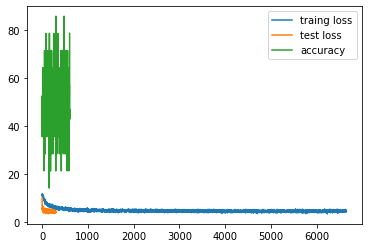

In [ ]:
trainer.plot_curves("bertLM.png")

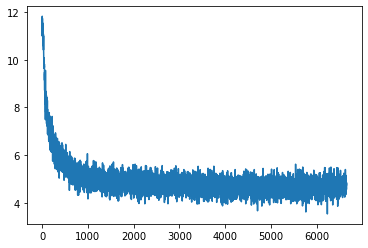

In [ ]:
plt.plot(trainer.train_loss)
#plt.plot(trainer.test_loss,label="test loss")
#plt.legend()
plt.savefig("try1.png")

# Hatespeech dataset

In [ ]:
#!pip install transformers
#!pip install datasets
from transformers import BertModel
#from datasets import load_dataset

In [ ]:
#[0 : hatespeech, 1 : Offensive, 2 : Normal]
" ".join(map(str,hatexplain[0]["post_tokens"]))
hatexplain[0]["annotators"]["label"]

[0, 2, 2]

In [ ]:
class HateExplain(Dataset):
  def __init__(self,split : str,use_pretrained_vocab : bool = True,vocab_path : str = None,name : str = "hatexplain"):
    self.dataset = load_dataset(name,split=split)
    if use_pretrained_vocab and not vocab_path:
      self.tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
    else:
      self.tokenizer = BertTokenizer.from_pretrained(vocab_path)
  
  def _tokenize(self,sentence : str):
    return self.tokenizer(sentence,padding="max_length",max_length=512,truncation=True,return_tensors="pt")

  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self,idx):
    data = self.dataset[idx]
    sentence : torch.Tensor = self._tokenize(" ".join(map(str,data["post_tokens"])))
    target_data = data["annotators"]["label"]
    target_data = max(set(target_data),key=target_data.count)
    target : torch.tensor = torch.tensor([target_data],dtype=torch.long)
    return sentence,target


# BertClassifier

In [ ]:
class BertClassifier(nn.Module):
  def __init__(self,model : BERT = None,dropout=0.5,hugging_face=True):
    super(BertClassifier,self).__init__()

    if hugging_face and model is None: self.bert = BertModel.from_pretrained("bert-base-cased")
    else : self.bert = model

    self.hugging_face : bool = hugging_face

    self.linear_stack = nn.Sequential(
      nn.Dropout(dropout),
      nn.Linear(768,3),
      nn.Softmax()
    )

  def forward(self,input_id, mask):
    if self.hugging_face:
      _, pooled_output = self.bert(input_ids=input_id,attention_mask=mask,return_dict=False)
      out = self.linear_stack(pooled_output) 
      return out
    else:
      ###my mf bert
      pass

In [ ]:
class Trainer:
  def __init__(self,
               model : BertClassifier,
               train_loader : DataLoader,
               test_loader : DataLoader,
               criterion,
               log_freq : int = 10,
               optimizer_adam : bool = True
               ):
    cuda_condition : bool = torch.cuda.is_available()
    self.device = torch.device("cuda" if cuda_condition else "cpu")

    self.model = model.to(self.device)
    self.train_loader = train_loader
    self.test_loader = test_loader
    #for optimizer try intergating learning rate scheduler
    self.optimizer = Adam(self.model.parameters(),lr=1e-6) if optimizer_adam else None
    self.criterion = criterion
    self.log_freq = log_freq
    self.loss_list = list()

    print(f"Total number of parameters : {sum([p.nelement() for p in self.model.parameters()])}")
  
  def train(self,epoch):
    self.model.train()
    self.iteration(epoch,self.train_loader)
  
  def test(self,epoch):
    self.model.eval()
    with torch.no_grad(): self.iteration(epoch,self.test_loader,train=False)

  def iteration(self,epoch,data_loader,train = True):
    str_code : str = "train" if train else "test"

    data_iter = tqdm.tqdm(enumerate(data_loader),
                          desc="EP_%s:%d" % (str_code,epoch),
                          total=len(data_loader),
                          bar_format = "{l_bar}{r_bar}")
    avg_loss : int = 0
    total_correct : int = 0
    total_elements : int = 0
    
    #self.model.train() if train else self.model.eval() 

    for i, data in data_iter:
      sentences, label_1 = data
      label = label_1.to(self.device)
      mask = sentences["attention_mask"].to(self.device)
      input_id = sentences["input_ids"].squeeze(1).to(self.device)

      yhat = self.model(input_id,mask)

      batch_loss = self.criterion(yhat,label.squeeze(1))

      avg_loss+=batch_loss.item()
      total_correct += (yhat.argmax(dim=1) == label).sum().item()
      total_elements += label.nelement()

      if train:
        self.optimizer.zero_grad()
        batch_loss.backward()
        self.optimizer.step()

        self.loss_list.append(batch_loss.item())
        if batch_loss.item() == min(self.loss_list) or batch_loss.item() < min(self.loss_list):
          self.save_model(batch_loss.item(),"/content/drive/MyDrive/int100/classifer_weights")
      
      #code for checking the accuracy
      post_fix : dict = {
          "epoch":epoch,
          "iteration":i,
          "avg loss": avg_loss/(i+1),
          "avg accuracy" : (total_correct / total_elements)*100,
          "loss":batch_loss.item()
      }

      if (i/len(data_iter))*100 in [50.0,100.0]: 
        data_iter.write(str(post_fix))
    
    print("EP%d_%s, avg_loss=" % (epoch, str_code), avg_loss / len(data_iter),
          "total acc=",(total_correct/total_elements)*100)
  
  def save_model(self,loss : int,path : str) -> None:
    model = self.model.to("cpu")
    torch.save(model.state_dict(),f"{path}_{epoch}_BERTClassifier.pt")
    print(f"model saved on {round(loss,4)}")
    self.model.to("cuda")


In [ ]:
train_dataset, test_dataset = (HateExplain(split=x) for x in ("train","test"))

Reusing dataset hatexplain (/root/.cache/huggingface/datasets/hatexplain/plain_text/1.0.0/df474d8d8667d89ef30649bf66e9c856ad8305bef4bc147e8e31cbdf1b8e0249)
Reusing dataset hatexplain (/root/.cache/huggingface/datasets/hatexplain/plain_text/1.0.0/df474d8d8667d89ef30649bf66e9c856ad8305bef4bc147e8e31cbdf1b8e0249)


In [ ]:
train_loader, test_loader = (DataLoader(dataset=x,batch_size=8,shuffle=True) for x in (train_dataset,test_dataset))

In [ ]:
classifier = BertClassifier()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
trainer = Trainer(model=classifier,
                  train_loader=train_loader,
                  test_loader=test_loader,
                  criterion=nn.CrossEntropyLoss(),
                  optimizer_adam=True
)

Total number of parameters : 108312579


In [ ]:
for epoch in range(10):
  trainer.train(epoch)
  trainer.test(epoch)

EP_train:0:   0%|| 0/1923 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


model saved on 1.1368


EP_train:0:   0%|| 5/1923 [00:06<30:07,  1.06it/s]

model saved on 1.1238


EP_train:0:   0%|| 9/1923 [00:10<30:06,  1.06it/s]

model saved on 1.0852


EP_train:0:   1%|| 11/1923 [00:14<38:42,  1.21s/it]

model saved on 1.0831


EP_train:0:   1%|| 12/1923 [00:16<52:24,  1.65s/it]

model saved on 1.0509


EP_train:0:   1%|| 16/1923 [00:21<35:42,  1.12s/it]

model saved on 1.0274


EP_train:0:   5%|| 89/1923 [01:16<22:49,  1.34it/s]

model saved on 1.006


EP_train:0:  10%|| 195/1923 [02:41<22:38,  1.27it/s]

model saved on 1.0015


EP_train:0:  10%|| 201/1923 [02:48<26:00,  1.10it/s]

model saved on 1.0009


EP_train:0:  11%|| 210/1923 [02:58<23:32,  1.21it/s]

model saved on 0.9842


EP_train:0:  12%|| 240/1923 [03:24<22:07,  1.27it/s]

model saved on 0.9828


EP_train:0:  14%|| 269/1923 [03:49<21:45,  1.27it/s]

model saved on 0.9597


EP_train:0:  21%|| 411/1923 [05:42<19:42,  1.28it/s]

model saved on 0.9451


EP_train:0:  36%|| 697/1923 [09:28<15:58,  1.28it/s]

model saved on 0.9419


EP_train:0:  36%|| 700/1923 [09:32<21:22,  1.05s/it]

model saved on 0.8914


EP_train:0:  37%|| 717/1923 [09:48<15:59,  1.26it/s]

model saved on 0.8791


EP_train:0:  40%|| 760/1923 [10:24<15:19,  1.26it/s]

model saved on 0.8779


EP_train:0:  41%|| 781/1923 [10:42<14:58,  1.27it/s]

model saved on 0.8755


EP_train:0:  45%|| 857/1923 [11:44<14:03,  1.26it/s]

model saved on 0.7898


EP_train:0:  58%|| 1123/1923 [15:14<10:28,  1.27it/s]

model saved on 0.7724


EP_train:0:  71%|| 1370/1923 [18:30<07:12,  1.28it/s]

model saved on 0.7665


EP_train:0:  82%|| 1569/1923 [21:08<04:38,  1.27it/s]

model saved on 0.6923


EP_train:0: 100%|| 1923/1923 [25:48<00:00,  1.24it/s]


EP0_train, avg_loss= 1.032671889909158 total acc= 303.4713644932718


EP_test:0: 100%|| 241/241 [01:10<00:00,  3.40it/s]


EP0_test, avg_loss= 0.9505560853174613 total acc= 317.72349272349277


EP_train:1:  19%|| 356/1923 [04:38<20:26,  1.28it/s]

model saved on 0.6282


EP_train:1:  78%|| 1494/1923 [19:33<05:37,  1.27it/s]

model saved on 0.6257


EP_train:1:  80%|| 1534/1923 [20:06<05:05,  1.27it/s]

model saved on 0.6188


EP_train:1:  80%|| 1541/1923 [20:14<05:35,  1.14it/s]

model saved on 0.6142


EP_train:1:  87%|| 1681/1923 [22:06<03:09,  1.28it/s]

model saved on 0.6015


EP_train:1: 100%|| 1923/1923 [25:18<00:00,  1.27it/s]


EP1_train, avg_loss= 0.9279325752288057 total acc= 314.1584866410973


EP_test:1: 100%|| 241/241 [01:10<00:00,  3.41it/s]


EP1_test, avg_loss= 0.9024485913549716 total acc= 312.8898128898129


EP_train:2:  13%|| 247/1923 [03:13<21:52,  1.28it/s]

model saved on 0.5854


EP_train:2:  59%|| 1128/1923 [14:45<10:23,  1.27it/s]

model saved on 0.5831


EP_train:2:  69%|| 1320/1923 [17:19<07:51,  1.28it/s]

model saved on 0.5766


EP_train:2:  78%|| 1500/1923 [19:42<05:31,  1.28it/s]

model saved on 0.5724


EP_train:2: 100%|| 1923/1923 [25:15<00:00,  1.27it/s]


EP2_train, avg_loss= 0.8818602164586385 total acc= 317.14229994149383


EP_test:2: 100%|| 241/241 [01:11<00:00,  3.39it/s]


EP2_test, avg_loss= 0.8780574239635863 total acc= 313.3056133056133


EP_train:3:   2%|| 43/1923 [00:34<25:03,  1.25it/s]


KeyboardInterrupt: ignored

# Inference

In [ ]:
#[0 : hatespeech, 1 : Offensive, 2 : Normal]

In [ ]:
weights_path : str = "/content/drive/MyDrive/int100/classifer_weights_10_BERTClassifier.pt"
model = BertClassifier()
model = torch.load(weights_path)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def inference(sentence : str) -> dict:
  with torch.no_grad():
    model.eval()
    tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
    embedded = tokenizer(sentence,padding="max_length",max_length=512,truncation=True,return_tensors="pt")

    mask = embedded["attention_mask"]
    token_ids = embedded["input_ids"].squeeze(1)

    output = model(token_ids,mask)

    return {
        "input sentence":sentence,"vals":{
          "hatespeech":f"{round(output[0][2].item(),2)} %",
          "offensive":f"{round(output[0][0].item(),2)} %",
          "normal":f"{round(output[0][1].item(),2)} %"
        }
    }


In [ ]:
sentence : str = "she belongs to the streets."
inference(sentence)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


{'input sentence': 'she belongs to the streets',
 'vals': {'hatespeech': '0.26 %', 'normal': '0.52 %', 'offensive': '0.22 %'}}